<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants') #training/
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 197.8572995 seconds


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1277]

,ID,Gene,Variation,Class,TEXT
1277,1277,ARID5B,Truncating Mutations,1,ARID5B Truncating Mutations


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [10]:
y_true = result['Class'].values
# replacing multiple spaces with underscore
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [11]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

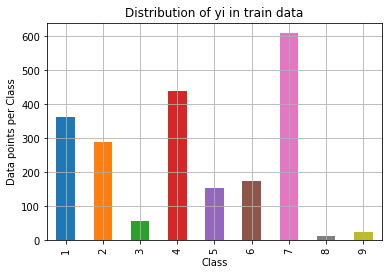

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


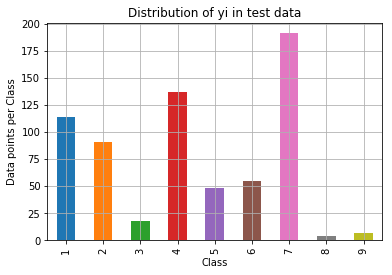

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


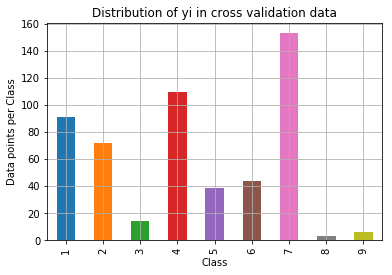

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [12]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.489276631654792
Log loss on Test Data using Random Model 2.563542221215652
-------------------- Confusion matrix --------------------


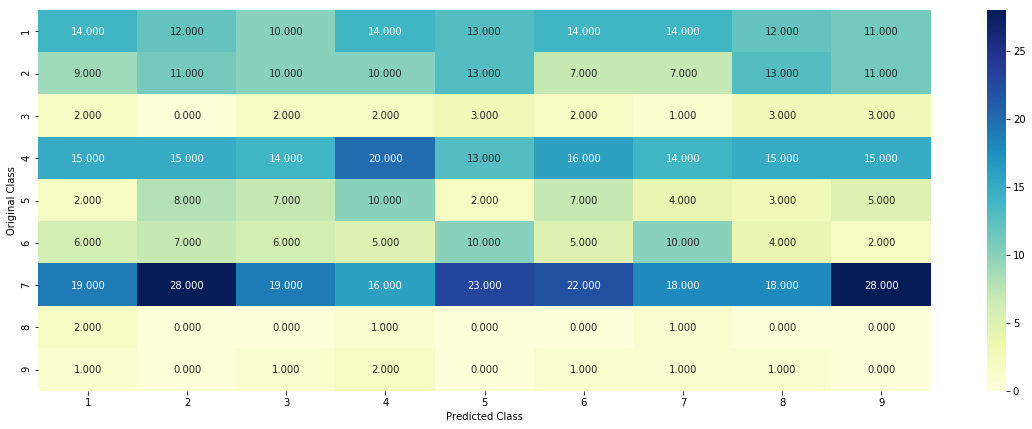

-------------------- Precision matrix (Columm Sum=1) --------------------


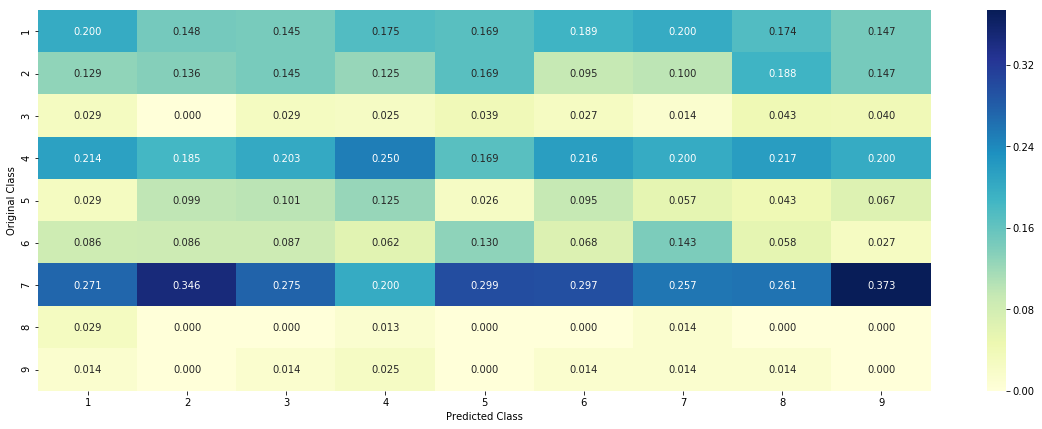

-------------------- Recall matrix (Row sum=1) --------------------


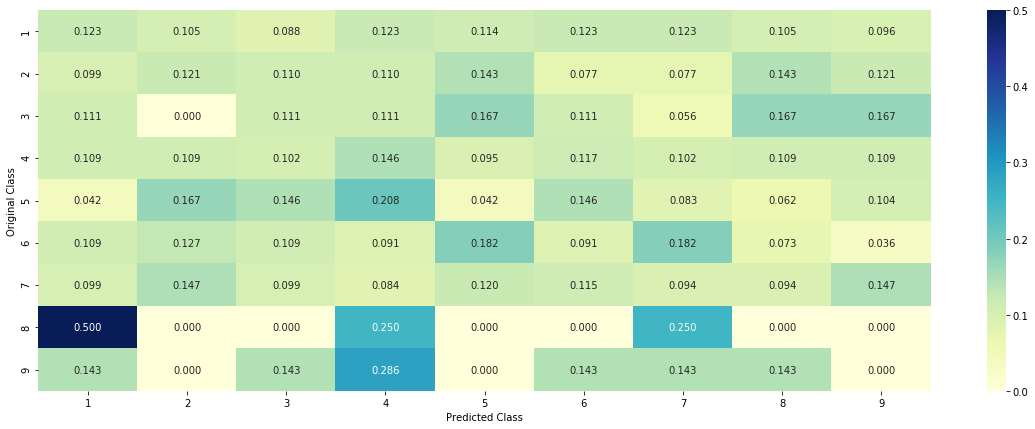

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [14]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [15]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 236
BRCA1     163
TP53      112
EGFR       98
PTEN       84
BRCA2      73
KIT        67
BRAF       61
ERBB2      46
ALK        44
PDGFRA     38
Name: Gene, dtype: int64


In [16]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 236 different categories of genes in the train data, and they are distibuted as follows


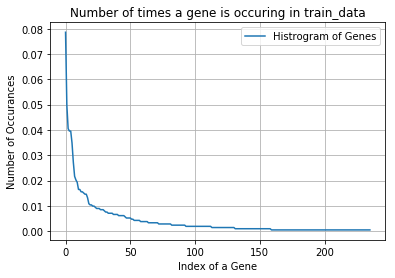

In [18]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.title("Number of times a gene is occuring in train_data")
plt.grid()
plt.show()


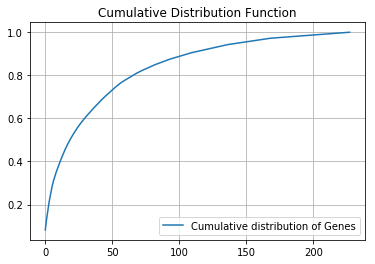

In [21]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.title("Cumulative Distribution Function")
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [17]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [18]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [19]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [20]:
train_df['Gene'].head()

2497     BRCA1
2435     BRCA1
2981       KIT
1193    PIK3CA
506       TP53
Name: Gene, dtype: object

In [21]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk6',
 'cdk8',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1

In [22]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 235)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.1870375318299504
For values of alpha =  0.0001 The log loss is: 1.1681043190131528
For values of alpha =  0.001 The log loss is: 1.2212753801033336
For values of alpha =  0.01 The log loss is: 1.3462126676160608
For values of alpha =  0.1 The log loss is: 1.4518086875587002
For values of alpha =  1 The log loss is: 1.4963928323966575


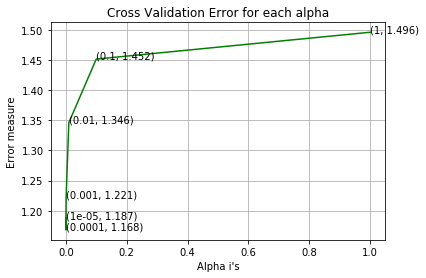

For values of best alpha =  0.0001 The train log loss is: 1.0015959704098667
For values of best alpha =  0.0001 The cross validation log loss is: 1.1681043190131528
For values of best alpha =  0.0001 The test log loss is: 1.18052993288865


In [28]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [29]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  228  genes in train dataset?
Ans
1. In test data 642 out of 665 : 96.54135338345866
2. In cross validation data 510 out of  532 : 95.86466165413535


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [23]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1931
Truncating_Mutations    62
Amplification           47
Deletion                44
Fusions                 21
Overexpression           3
T58I                     3
E17K                     2
R173C                    2
G12S                     2
G12C                     2
Name: Variation, dtype: int64


In [24]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1931 different categories of variations in the train data, and they are distibuted as follows


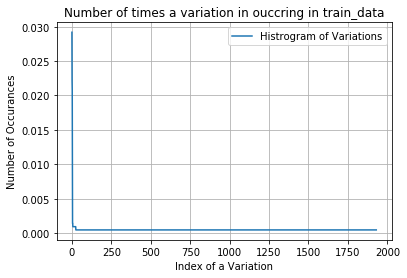

In [25]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.title("Number of times a variation in ouccring in train_data")
plt.grid()
plt.show()

[0.02919021 0.05225989 0.07156309 ... 0.99905838 0.99952919 1.        ]


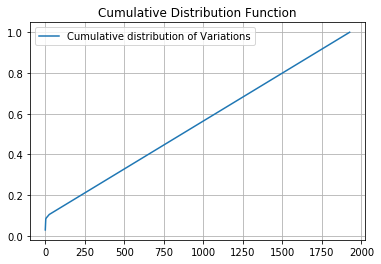

In [33]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.title("Cumulative Distribution Function")
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [26]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [27]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [28]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [29]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1963)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7017029124206693
For values of alpha =  0.0001 The log loss is: 1.7031524015099508
For values of alpha =  0.001 The log loss is: 1.6999515466795148
For values of alpha =  0.01 The log loss is: 1.6989542229474695
For values of alpha =  0.1 The log loss is: 1.7060795266576696
For values of alpha =  1 The log loss is: 1.7085281197522524


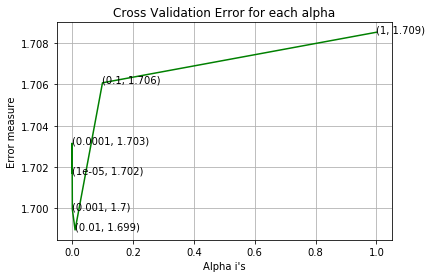

For values of best alpha =  0.01 The train log loss is: 1.4066896120419026
For values of best alpha =  0.01 The cross validation log loss is: 1.6989542229474695
For values of best alpha =  0.01 The test log loss is: 1.735498532445304


In [38]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [39]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1927  genes in test and cross validation data sets?
Ans
1. In test data 66 out of 665 : 9.924812030075188
2. In cross validation data 58 out of  532 : 10.902255639097744


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [30]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [31]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [32]:
# building a TfidfVectorizer with all the words that occured minimum 10 times in train data 
# only for Logistic Regression, as with TfidfVectorizer Logistic Regression is not performing well
text_vectorizer = TfidfVectorizer(min_df=15, ngram_range=(1,4))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 317282


# Using SelectKBest

In [37]:
train_df.shape

(2124, 5)

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

x_train_2k = SelectKBest(chi2,k=2000)
x_train_2k.fit(train_df,test_df)
x_train_2000 = x_train_2k.transform(train_df) 

x_test_2000 = x_train_2k.transform(test_df)
x_cv_2000 = x_train_2k.transform(cv_df)


ValueError: could not convert string to float: 'describe landscape somatic genomic alterations based multi dimensional comprehensive characterization 500 glioblastoma tumors gbms identify several novel mutated genes well complex rearrangements signature receptors including egfr pdgfra tert promoter mutations shown correlate elevated mrna expression supporting role telomerase reactivation correlative analyses confirm survival advantage proneural subtype conferred g cimp phenotype mgmt dna methylation may predictive biomarker treatment response classical subtype gbm integrative analysis genomic proteomic profiles challenges notion therapeutic inhibition pathway alternative inhibition target data facilitate discovery therapeutic diagnostic target candidates validation research clinical observations generation unanticipated hypotheses advance molecular understanding lethal cancer go introduction glioblastoma gbm first cancer type systematically studied cancer genome atlas research network tcga initial publication tcga 2008 presented results genomic transcriptomic analysis 206 gbms including mutation sequencing 600 genes 91 samples observations provided proof concept demonstration systematic genomic analyses statistically powered cohort define core biological pathways substantiate anecdotal observations generate unanticipated insights initial publication reported biologically relevant alterations three core pathways namely p53 rb receptor tyrosine kinase rtk ras phosphoinositide 3 kinase pi3k signaling tcga 2008 efforts link alterations found pathways distinct molecular epigenetic subtypes glioblastoma revealed coordinated combinations enriched different molecular subtypes may affect clinical outcome sensitivity individual tumors therapy noushmehr et al 2010 verhaak et al 2010 beyond observations become evident gbm growth driven signaling network functional redundancy permits adaptation response targeted molecular treatments thus comprehensive catalogue molecular alterations gbm based multidimensional high resolution data sets critical resource future investigative efforts understand pathogenesis mechanisms inform tumor biology ultimately develop effective therapies deadly cancer toward ends tcga expanded scope depth molecular data gbm including adoption next generation sequencing technology tcga 2011 2012a report efforts tcga gbm analysis working group awg understanding gbm pathobiology constructing detailed somatic landscape gbm series comprehensive genomic epigenomic transcriptomic proteomic analysis go results samples clinical data summarized table 1 dataset contains molecular clinical data total 543 patients note different subsets patients assayed technology platform significant additions gbm dataset include sequencing gbm whole genomes coding exomes transcriptomes expanded dna methylomes well profiling targeted proteome particular 291 pairs germline tumor native dnas e g without whole genome amplification characterized hybrid capture whole exome sequencing wes 42 pairs underwent deep coverage whole genome sequencing wgs transcriptomes 164 rna samples profiled rna sequencing rna seq protein expression profiles generated 214 patient samples using reverse phase protein arrays rppa data package associated report frozen 7 15 2013 available data portal https tcga data nci nih gov docs publications gbm 2013 table 1 table 1 characterization platforms data availability tcga sample collection spanned 17 contributing sites si table s1 tier 1 clinical data elements including age pathology survival available 539 543 patients 99 6 tier 2 data including treatment information 525 patients 96 7 figure s1 see data portal clinical characteristics patient cohort similar previous report 2008 tcga 2008 median age 59 6 years male female ratio 1 6 333 209 median overall survival 13 9 months 2 year survival 22 5 5 year survival 5 3 due tcga selection primary gbm idh1 mutation infrequent tcga cohort compared published series 423 patients adequate sequencing coverage either whole exome next generation sequencing previously reported sanger based sequencing 28 6 idh1 r132h mutation one individual r132g one r132c mutation idh2 mutations found associated g cimp methylation pattern present cases idh1 mutation r132h g c seven g cimp cases lacked idh1 mutations overall g cimp pattern present 42 532 cases 7 9 clinically relevant mgmt dna methylation status estimated cpg islands previously described bady et al 2012 conventional positive prognostic factors confirmed univariate analysis age 50 os 21 9 vs 12 3 months p 2 4e 11 mgmt dna methylation 16 9 vs 12 7 p 0 0018 idh1 mutation 35 4 vs 13 3 p 1 55e 5 g cimp dna methylation 38 3 vs 12 7 p 8 3e 9 age mgmt idh1 g cimp status independently significant multivariate analysis si table s1 patients tcga cohort diagnosed 1989 2011 414 patients 76 receiving diagnosis 2002 use concurrent temozolomide tmz adjuvant radiation became widely adopted combined tmz chemotherapy radiation treatment documented 40 patients 217 543 50 2 414 patients diagnosed 2002 summaries treatment classification classes provided si whole exome sequencing identifies significantly mutated genes glioblastomas solution phase hybrid capture whole exome sequencing performed paired tumor normal native genomic dna obtained 291 patients overall 138 fold mean target coverage achieved 92 bases covered least 14 fold tumor 8 fold normal threshold offers 80 power detect mutations allelic fraction 0 3 carter et al 2012 see extended experimental procedures overall 291 tumor exomes sequenced 21 540 somatic mutations identified median rate 2 2 coding mutations per megabase lower upper quartile range 1 8 2 3 among somatic mutations 20 448 single nucleotide variants snvs 39 dinucleotide mutations 1 153 small insertions deletions indels snvs mutations included 5 379 silent 3 901 missense 831 nonsense 360 splice site 760 mutations resulting frame shift mutations evaluated across samples distinguish genes appear targeted driver rather passenger mutations using mutsig tcga 2008 2011 2012a invex algorithms hodis et al 2012 mutsig assesses mutation significance function gene size trinucleotide context gene structure background mutation rates invex compares ratio non silent exonic mutations synonymous intronic utr nucleotide variants algorithm particularly effective genomes elevated mutation rates melanoma lung adenocarcinoma invex mutsig algorithms run dataset total 71 genes identified significantly mutated genes smg validate mutation calls 757 snvs indels detected exome sequencing 71 smgs subject orthogonal validation targeted sequencing 259 tumor normal pairs sites adequate coverage detect mutant alleles 98 snvs 84 insertions 82 deletions validated see extended experimental procedures summarized figure 1a invex mutsig algorithms identified previously reported genes significantly mutated gbm namely pten tp53 egfr pik3ca pik3r1 nf1 rb1 idh1 pdgfra figure 1a addition algorithms identified leucine zipper like transcriptional regulator 1 lztr1 mutated ten samples novel significantly mutated gene gbm si table s2 si figure s2 lztr1 putative transcriptional regulator associated digeorge congenital developmental syndrome kurahashi et al 1995 previously implicated cancer located chromosome 22q five six samples available copy number data simultaneously targeted hemizygous deletion figure 1 figure 1 somatic genomic alterations glioblastoma mutsig additionally identified 61 additional genes 71 overall mutation frequency background q value 0 1 si table s2 included spectrin alpha 1 spta1 mutated 9 encodes cell motility protein interacts abl oncogene related various hereditary red blood cell disorders atrx 6 member swi snf family chromatin remodelers recently implicated pediatric adult high grade gliomas kannan et al 2012 liu et al 2012 schwartzentruber et al 2012 gabra6 4 inhibitory neurotransmitter mammalian brain kel 5 codes transmembrane polymorphic antigen glycoprotein si figure s2 albeit low frequency several hotspot mutations found significant cohort gbm notably idh1 r132h mutation braf v600e sequence variant confers sensitivity vemurafenib melanoma chapman et al 2011 detected five 291 gbms 1 7 mutation h3 3 histones reported pediatric gliomas schwartzentruber et al 2012 observed cohort primary gbm facilitate exploration mutation data non computational biologists developed patient centric table pct categorizes gene sample type mutation silent missense indel etc observed describes confidence call based coverage normal tumor samples see data portal extended experimental procedures illustrate one potential use table interrogated mutation pattern 161 genes functionally linked chromatin organization hereafter referred cmg chromatin modification genes see extended experimental procedures using pct total 135 samples 46 sample cohort harbored least one non synonymous mutation cmg gene set figure 1b importantly cmg mutations found mutually exclusive overall memo analysis p 0 0008 ciriello et al 2012 suggesting potential biological relevance chromatin modification gbm genomic gains losses gbm expanded previously reported dna copy number analysis 206 gbms tcga 2008 543 samples larger data set coupled improvement analytical algorithm gistic mermel et al 2011 resulted significant refinement previously defined amplification deletion peaks thus allowing improved nomination candidate gene targets several recurrent somatic copy number aberrations scna figure 1c common amplification events chromosome 7 egfr met cdk6 chromosome 12 cdk4 mdm2 chromosome 4 pdgfra found higher frequencies previously reported si table s3 often contained single gene common overlapping region additionally frequent gains genes sox2 mycn ccnd1 ccne2 precisely established except highly recurrent homozygous deletions cdkn2a b statistically significant dna losses hemizygous losses frequent amplifications reported general pattern cancer beroukhim et al 2010 able pinpoint single genes deletion targets cases notably recurrent deletion 6q26 6q26 deletion previously associated candidates park2 analysis unequivocally defined qki sole gene within minimal common region target homozygous deletion 9 cases qki gene also mutated 5 cases without evidence deletion two frame shift two missense one splice site mutation consistent recent publication demonstrating qki functions tumor suppressor gbm acting p53 responsive regulator mature mir 20a stability regulate tgf r2 expression tgf network signaling chen et al 2012 single gene deletion targets include lrp1b npas3 lsamp smyd3 similar mutation data also algorithmically generated patient centric table summarizing dna copy number aberration dna methylation status gene mirna cases cohort see data portal recurrent structural rearrangements defined genomic transcriptomic sequencing explore genomic transcriptomal structural rearrangements performed whole genome paired end sequencing deep coverage 42 pairs tumor matched germline dna samples well rna sequencing rna seq 164 gbm transcriptomes si table s4 detected genomic rearrangements using breakdancer bambam sanborn et al 2013 see extended experimental procedures addition expressed rna fusions using prada http sourceforge net projects prada total identified 238 high confidence candidate somatic rearrangements including 49 interchromosomal 125 intrachromosomal 64 intragenic structural variants figure 2a b si table s4 number events per sample ranged 0 32 median 2 one sample containing distinctively high number rearrangements context local chromothripsis involving 7 5 mb region chromosome 1 rearrangements detected eight samples overall number rearrangements generally appeared lower previously reported prostate cancer sanborn et al 2013 lung adenocarcinoma imielinski et al 2012 melanoma berger et al 2012 recurrent intragenic events detected seven genes egfr n 12 cpm n 3 prim2 n 3 fam65b n 2 ppm1h n 2 rbm25 n 2 homer2 n 2 since unbalanced structural rearrangements dna detected breakpoints dna copy number profiles investigated whether cna breakpoints could indicate potential sites recurrent structural rearrangement using 492 samples acgh data n 492 note 41 129 high confidence rearrangement events whole genome sequencing wgs involved genes identified significant targets recurrent intragenic copy number breakpoints icna larger cohort gbm based dna copy number profiles si table s4 data portal figure 2 figure 2 structural rearrangements transcript variants gbm rna seq analysis identified 48 interchromosomal 180 intrachromosomal mrna fusion transcripts 106 164 samples figure 2c si table s4 approximately 37 frame transcripts 35 frame remaining 29 involved 3 5 untranslated region si figure s3a substantial portion 44 intrachromosomal events resulted recombination genomic loci located less 1mb apart notable example recently reported oncogenic fgfr3 tacc3 inversion singh et al 2012 detected two cases interestingly fgfr3 tacc3 locus focally amplified samples suggesting cna could serve marker fgfr3 tacc3 rearrangement overall focal amplifications involving fgfr3 tacc3 detected 14 537 gbm copy number profiles 2 6 ten 42 gbms wgs analyses demonstrated rearrangements egfr adjacent genes brip n 2 vopp1 n 2 structural variants genes surrounding egfr locus lancl2 plexha n 2 si table s4 types 7p11 rearrangements detected six samples pattern confirmed rna seq data eighteen samples 164 samples showed evidence transcribed fusion transcripts egfr sept14 n 6 sec61g egfr n 4 lancl2 sept14 n 1 cobl sept14 n 1 si table s4 fusions tended part focal gain suggesting complex rearrangement si figure s3b genomic rearrangements pertaining chromosome arm 12q identified 11 42 whole genomes 12q associated fusion transcripts found expressed 25 164 transcriptomes variety different genomic transcriptomic variants found 12q though none recurrent si table s4 majority 12q lesions occurred tandem e adjacent events gbm illustration single sample showed pattern 15 non adjacent segments 14 chromosome 12 one fragment chromosome 7 highly amplified 40 copies eight 12q rearrangement events including mdm2 cdk4 egfr oncogenes si figure s3c wgs analysis reconstructed two independent circular paths accounted amplified segments si figure s3c circle contained least one oncogene one circle 0152 dm containing one copy cdk4 two copies mdm2 circle 0152 dm b containing one copy egfr reconstructed circles consistent extrachromosomal double minute chromosomes kuttler mai 2007 recently data set used identify enrichment genomic breakpoints relating chromosome 12q14 15 locus harboring mdm2 cdk4 oncogenes pertained less favorable outcome zheng et al 2013 reconstruction double minutes confirmed using orthogonal methods sanborn et al 2013 egfr frequently targeted multiple alterations dna rna anticipated egfr among frequently mutated genes rna seq detected diversity altered transcripts figure 3a egfr mutations accompanied regional dna amplification majority cases leading wide range mutation allelic frequencies comparing allelic frequencies point mutations dna rna seq data revealed high degree concordance type prevalence mutations dna level composition expressed mrna transcripts si figure s4a figure 3 figure 3 somatic alterations egfr locus rna seq also provided complete picture aberrant exon junctions semi quantitative assessment expression levels transcript allelic fraction taf calculated ratio aberrant exon junction sum aberrant wild type junctions 3 junction end corrected read depth 80 confidence binomial confidence interval tafs recurrent point mutations junctions summarized si table s5 11 tumors aberrant exon 1 8 junction characteristic egfrviii highly expressed 10 taf 19 showed least low level expression 1 results concordant independent assessment egfrviii digital mrna assay using barcoded probes ncounter nanostring technologies real time pcr see data portal biological clinical relevance low level egfrviii expression remains demonstrated egfrviii expression minor population gbm cells shown confer aggressive tumor phenotype paracrine mechanisms inda et al 2010 variety recurrent non canonical egfr transcript forms detected rna seq data figure 3a si figure s4b three different c terminal rearrangements targeting cytoplasmic domain egfr detected 10 taf 3 7 cases 1 taf another 9 comparison wgs data confirmed presence c terminal deletions 9 cases sequence data available c terminal deletion variants previously associated gliomagenesis experimental rodent systems vivo cho et al 2012 prevalence egfr c terminal deletion reported likely underestimate since complete loss c terminus may yield aberrant terminal junctions mappable transcriptome sequencing relative expression c terminus exons 27 29 3 standard deviations readily apparent another 7 3 cases without detectable aberrant junctions figure 3b identified two relatively uncharacterized recurrent egfr variants namely deletions exons 12 13 12 13 28 7 exons 14 15 14 15 3 egfr 12 13 previously identified rt pcr analysis glioma callaghan et al 1993 12 13 14 15 appear expressed minor allelic fractions 10 raising question whether result splicing aberration genomic deletion among tumors expressing 12 13mrna analysis aberrant junctions wgs data bambam failed identify concordant dna deletion 14 15 cases data available one case showed concordant breakpoint minor component highly rearranged locus comparison egfrviii expressing tumors concordant deletion spanning exons 2 7 7 cases wgs data available si table s5 total 38 4 cases harbored egfr genomic rearrangement point mutation expressed least 10 transcripts figure 3b si table s5 overall 57 gbm showed evidence mutation rearrangement altered splicing focal amplification egfr pdgfra showed recurrent gene fusions intragenic deletion exons 8 9 pdgfra 8 9 highly expressed 10 taf 1 164 samples rna sequencing data low level expression pdgfra 8 9 far prevalent rna seq data n 29 163 could represent splice variant result concordant previously reported estimates 8 9 expression ozawa et al 2010 novel pdgfra variant deletion exons 2 7 found highly expressed single case tcga 28 5216 landscape somatic alterations glioblastoma addition whole exome transcriptomal sequencing data extended palette somatic alterations affecting major cancer pathways gbm figure 4 presents landscape view canonical signal transduction tumor suppressor pathways gbm based whole exome sequencing data 291 patients unsupervised analysis 251 gbms copy number wes mutation data identified genes sets modules somatic alterations significantly mutually exclusive memo ciriello et al 2012 analysis confirmed mutual exclusivity among alterations affecting p53 pathway mdm2 mdm4 tp53 rb pathway cdk4 cdk6 ccnd2 cdkn2a b rb1 various components influencing pi3k pathway pik3ca pik3r1 pten egfr pdgfra nf1 si table s6 figure 4 figure 4 landscape pathway alterations gbm shown least one rtk found altered 67 3 gbm overall egfr 57 4 pdgfra 13 1 met 1 6 fgfr2 3 3 2 half tumors focal amplification mutation pdgfra harbored concurrent egfr alterations 42 4 14 33 majority met altered tumors 3 4 reflecting pattern intratumoral heterogeneity previously documented situ hybridization snuderl et al 2011 szerlip et al 2012 pi3 kinase mutations found 25 1 gbm 63 251 18 3 affecting p110alpha p85alpha subunits 6 8 pi3k family genes pi3k mutations mutually exclusive pten mutations deletions p 0 0047 fisher exact 59 4 gbm showing one 149 251 considering rtk genes pi3 kinase genes pten 89 6 gbm least one alteration pi3k pathway 39 two nf1 gene deleted mutated 10 cases never co occurred braf mutations 2 concordant previous tcga gbm report p53 pathway found dysregulated 85 3 tumors 214 251 mutation deletion tp53 27 9 amplification mdm1 2 4 15 1 deletion cdkn2a 57 8 expected tp53 alterations mutually exclusive amplification mdm family genes p 0 0003 cdkn2a p 1 99e 7 concurrently 78 9 tumors one alteration affecting rb function 7 6 direct rb1 mutation deletion 15 5 amplification cdk4 6 remainder via cdkn2a deletion reported lower grade gliomas ichimura et al 2009 12 13 gbms idh1 hotspot mutations harbored concurrent tp53 mutations consistent recent reports mutations swi snf complex gene atrx often co occurred cases figure 4b mutations idh1 atrx appear prevalent gbm samples without rtk alteration p 7 2e 5 7 3e 4 respectively tumors genotypically consistent secondary gbm ohgaki kleihues 2007 telomerase reverse transcriptase tert promoter mutations recently reported glioma mapping positions 124 c228t 146bp c250t upstream tert atg start site killela et al 2013 42 cases deep coverage wgs data 25 samples adequate coverage read count 10 tert promoter mutational analysis detected c228t mutation 15 25 cases c250t variant found another 6 cases figure 4c tert promoter mutations two hot spots correlated regulated tert expression rna level figure 4c interestingly four gbms non mutated tert promoters harbored atrx mutations concurrent idh1 tp53 mutations recently described liu et al 2012 finally line role atrx alternative lengthening telomeres alt lovejoy et al 2012 atrx mutant gbm tumors exhibit elevated tert rna expression compared tumors tert promoter mutations figure 4c taken together data suggest maintenance telomere either reactivation telomerase tert promoter mutation induced increased tert expression alt result atrx mutation requisite step gbm pathogenesis reported median survival patients gbm ranges 12 18 months subset individuals survive three years dolecek et al 2012 dunn et al 2012 cross referenced data set identify factor associated long term survival n 39 7 7 cohort although specific genomic alteration significantly represented subset amplifications cdk4 egfr deletion cdkn2a observed decreased frequencies long survivors see data portal age diagnosis found major determinant 79 long term survivors diagnosed younger 50 years age despite relatively favorable prognosis one third patients g cimp gbm survived beyond three years suggesting factors yet identified contributing overall long term survival gbm patients molecular subclasses defined global mrna expression dna methylation widespread differences gene expression previously reported gbm grouping tcga tumors proneural neural classical mesenchymal transcriptomic subtypes phillips et al 2006 verhaak et al 2010 samples included previously published analysis n 342 classified one classes using single sample gene set enrichment analysis figure 5a si table s7 similarly sought assign case tcga cohort one dna methylation subclasses promoter dna methylation array platforms used tcga evolved increasing resolution illumina goldengate n 238 infinium humanmethylation27 hm27 n 283 infinium humanmethylation450 hm450 n 76 platforms si figure s5a analyzed total 396 gbm samples comprised 305 new gbm samples profiled hm27 n 192 hm450 n 113 platforms addition 91 cases profiled hm27 included previously noushmehr et al 2010 hierarchical consensus clustering dna methylation profiles stratified 396 gbm cases six classes including g cimp figure 5b si figures s5b s5c si table s7 cluster m1 35 58 60 enriched mesenchymal gbms cluster m3 18 31 58 enriched classical subtype figure 5b red blue respectively expected g cimp cluster enriched proneural subtype tumors figure 5 figure 5 molecular subclasses gbm genomic molecular correlates able perform robust exploration relationship g cimp phenotype genomic alterations incorporated previously reported g cimp status noushmehr et al 2010 175 additional gbm cases profiled goldengate platform total 534 gbm cases used following integrative analyses age gbm diagnosis statistically different 41yrs vs 56yrs p value 0 008 proneural g cimp n 28 proneural non g cimp n 22 subtypes reinforcing notion epigenomics transcriptomically similar patients mark distinct etiologies disease characteristics observed seven g cimp cases lacking idh1 mutation similar g cimp cases harboring idh1 mutations respect median age diagnosis 40yrs vs 37yrs p value 0 58 overall survival mean 913 days vs 1248 days p value 0 45 idh2 mutation detected seven g cimp idh1 wildtype gbm suggesting alternative pathway responsible hypermethylator phenotype next identify genomic alterations enriched transcriptomic epigenomic subtypes referenced patient centric tables count dna mutation copy number aberration events per subtype analysis confirmed previous reports demonstrating significant associations pdgfra amplification non g cimp proneural subgroup well nf1 inactivation mesenchymal subtype figure 5a additionally enhanced power larger data set identified enrichment atrx mutations myc amplifications g cimp subtype cdk4 sox2 amplifications proneural subtype broad amplifications chromosomes 19 20 classical subtype figure 5a contrast g cimp cluster m6 relatively hypomethylated predominance non mutated idh1 cases belonging proneural subtype 22 37 59 concurrent pdgfra amplification figure 5b explore plausible connection chromatin deregulation dna methylation counted mutations 161 cmgs figure 1b per methylation subclass addition association idh1 atrx mutations g cimp mutations cmgs enriched across m2 m4 m6 subclasses 38 cases three subclasses harbor least one cmg mutation vs 18 among classes p 0 0015 furthermore cases missense mutation deletion mll genes n 18 hdac family genes n 4 clustered m2 dna methylation subtype 10 21 patterns co occurrence suggest functional relationship chromatin modification dna methylation remains elucidated recently sturm et al reported adult pediatric gbm alterations idh1 h3f3a receptor tyrosine kinases rtk associated epigenetic subtypes sturm et al 2012 compared sturm et al methylation based classification using 74 tcga cases also classified authors found four tumors classified idh subtype sturm et al assigned g cimp subtype classification scheme si figure s5d mesenchymal tumors assigned m1 m2 21 25 rtk ii classic tumors assigned m3 m4 30 34 rtk pdgfra tumors assigned m6 tcga samples clustered sturm et al g34 k27 classes found corresponding histone mutations absent across tcga sample set lastly explored relationship molecular subclasses clinical parameters treatment response survival current larger tcga cohort survival advantage proneural subtype gbm phillips et al 2006 definitively shown conferred g cimp status non g cimp proneural gbms mesenchymal gbm tending show less favorable outcomes first twelve months following initial diagnosis compared subtypes p value 0 07 si figure s6a samples clustered m6 group classified proneural methylation subclass associated adverse survival overall si figure s6b noushmehr et al 2010 observation reinforces notion target genes affected g cimp phenotype likely contribute improved prognosis subset proneural gbm dna methylation mgmt gene promoter known marker treatment response hegi et al 2005 found mgmt locus methylated 48 5 patients cohort 174 359 assessed g cimp cases showed increased likelihood mgmt dna methylation 79 g cimp vs 46 non g cimp si figure s6c correlated outcome mgmt status distinguished responders non responders amongst samples classified classical n 96 p 0 01 among samples classified proneural n 66 p 0 57 mesenchymal n 104 p 0 62 neural n 55 p 0 12 si figures s6d e summary data provides evidence mgmt dna methylation predictive biomarker gbm classical subtype gbm subtypes regulatory networks mirna mrna gliomagenesis micrornas mirs found promote suppress oncogenesis modulation gene expression via mrna degradation inhibition translation bartel 2004 krol et al 2010 recent studies proposed additional mechanisms mir mrna regulation including modulation competing endogenous rna cerna mrna competitive mir binding sites sumazin et al 2011 tay et al 2011 leveraging existence matched mrna mir profiling data large number samples sought define salient interactions specific pairs mirs mrnas mechanisms employed relevance network based approach infer mir mrna associations gbms matched mir mrna profiles n 482 putative regulatory targets individual mirs defined genes strong negative correlation mir 0 3 prediction support three commonly used databases miranda pictar targetscan 133 mir mrna associations defined final putative mir regulatory network see data portal prevalent associations related molecular subtypes instance hsa mir 29a part mir29 family thought play role tp53 pathway park et al 2009 predicted regulate 23 genes 17 23 genes expressed distinctively high levels non g cimp proneural tumors g cimp tumors interestingly three bcl11a pcfg3 ss18l1 23 genes subnetwork predicted act pdgfra cernas see competitive endogenous mrnas cernas mrnas co regulated trans common mir sumazin et al 2011 tay et al 2011 used correlation nls based approach integrating mirna mrna expression copy number profiles predict cernas four gbm signature genes pdgfra egfr nf1 pten interestingly predicted pdgfra cernas significantly overlapped proneural gbm signature genes p value 1e 15 egfr cernas significantly overlapped classical gbm signature genes p value 1 2e 14 see data portal predicted cernas nf1 overlapped proneural signatures p 1e 15 pten associated cernas correlated mesenchymal signature provocative finding raises possibility cerna regulation mir may contribute transcriptomic signature defines molecular subtypes gbm although hypothesis remains tested signaling pathway activation different molecular subtypes gbm assess whether enrichment genomic alterations molecular subtypes translates downstream pathway activation performed targeted proteomic profiling reverse phase protein arrays rppa 214 sample lysates probed 171 antibodies targeting phospho total protein levels among signaling pathways previously described tcga 2012c normalization co clusters correlated signaling molecules within specific signaling pathways observed see extended experimental procedures data portal utilized readout pathway activity status correlative analyses unsupervised clustering rppa data failed produce consistent partitioning sample cohort clearly defined subtypes however 127 171 antibodies found correlate significantly transcriptomal subtype kruskal wallis p 0 05 extended experimental procedures anticipated egfr amplification mutation associated significant elevations total egfr expression p 3 74e 15 phosphorylation p 1 44e 12 si figure s7a prominent classical subtype tumors si figure s7b classical gbms also showed relative downregulation pro apoptotic proteins including cleaved caspase 7 cleaved caspase 9 bid bak well map kinase signaling including downstream target p90rsk notch1 notch3 expression moderately increased classical tumors consistent previous reports linking egfr notch activation gbm brennan et al 2009 mesenchymal subtype tumors exhibited elevated levels endothelial markers cd31 vegfr 2 consistent previous findings phillips et al 2006 well markers inflammation e g fibronectin downstream target cox 2 mesenchymal tumors showed moderately increased activation mapk pathway evidenced higher levels phospho raf phospho mek phospho erk figure 6 tumors also exhibited decreased levels mtor regulatory protein tuberin tsc2 gene product inhibited erk phosphorylation figure 6 figure 6 canonical pi3k mapk pathway activation determined reverse phase protein arrays compared gbm subclasses proneural p purple n 55 mesenchymal red n 45 activation expression levels plotted principal signaling nodes contrast mesenchymal subtype proneural gbms showed relatively elevated expression activation pi3k pathway including akt regulated mtorc1 activation site figure 6 proneural tumors showed greater inhibition 4ebp1 translation repressor whereas mesenchymal tumors display elevated s6 kinase activation indicative mtor effector pathway activation therefore subtypes achieve mtor pathway activation although specific patterns steady state protein activation differ g cimp tumors shared characteristics proneural superfamily also showed decreased expression several proteins including cox 2 igfbp2 annexin 1 among 171 antibodies tested tcga dataset three proteins negatively prognostic cox proportional hazard test p 0 0004 0 0013 igfbp2 cox 2 independently reported poor prognostic markers diffuse gliomas holmes et al 2012 shono et al 2001 low igfbp2 expression associated global dna hypermethylation glioma zheng et al 2011 members annexin family associated glioma growth migration annexin 1 known expressed secondary primary gbm schittenhelm et al 2009 together correlations proteins g cimp status suggest prognostic significance independent analysis dna methylation igfbp2 cox2 anxa1 found evidence hyper methylation g cimp tumors interestingly samples rtk amplification lower levels canonical rtk target pathway activities measured phospho akt phospho s6 kinase phospho mapk co cluster levels si figure s7c pten loss deletion associated incremental increases akt pathway activity pi3k mutant samples lower akt activity samples lacking pi3k mutations concordant findings breast cancer tcga 2012c samples harboring nf1 mutation deletion showed elevated map kinase activity p erk p mek p value 0 001 trended towards decreased pkc pathway activity examples non linear relationship protein signaling underlying genetic mutations speak complex likely dynamic signaling cancers go discussion study provided comprehensive catalogue somatic alterations associated glioblastoma constructed whole genome exome rna sequencing well copy number transcriptomic epigenomic targeted proteomic profiling availability detailed clinical information including treatment survival outcome nearly entire cohort rich data set offers new opportunity discover genomics based biomarkers validate disease related mechanisms generate novel hypotheses addition alterations signature oncogenes gbm egfr pi3k found 40 tumors harbor least one non synonymous mutation among chromatin modifier genes role chromatin organization gbm pathology described cancer types ovarian carcinoma wiegand et al 2010 renal carcinoma varela et al 2011 suggested also detected mutations genes targeted therapies developed braf chapman et al 2011 fgfr1 fgfr2 fgfr3 singh et al 2012 demonstrating potential clinical impact tcga dataset structural rearrangements contributed overall complexity genome transcriptome detected majority gbm high frequency structural variants q arm chromosome 12 involving mdm2 cdk4 genes observed associated presence double minute extrachromosomal dna fragments may functionally relevant zheng et al 2013 identification complex egfr fusion deletion variants nearly half gbm confirm relevance category somatic alterations disease development therapeutic strategy targeting mutated egfr could major impact survival continues topic great interest vivanco et al 2012 strategies need address possibility different egfr alterations might exist concurrently tumor yield differential biological activities responses given targeted inhibitor another level biological complexity revealed targeted proteomic profile showed impact specific genomic alterations downstream pathway signaling linear discordance genomic features proteomic activation status speak complex likely dynamic relationship signaling molecular alterations observation provocative clinical implication directly challenges notion therapeutic inhibition downstream signaling components along pathway would yield similar efficacy targeting mutated gene additionally observation highlights limitation tcga data namely inherent static nature given single time point analysis inability map specific genetic protein changes individual cells cell population given approach whole tumor tissue analysis summary report reaffirms power value tcga comprehensive multidimensional clinically annotated gbm reference dataset enabling hypothesis generation based unanticipated observations relationships emerged unbiased data driven analyses believe public resource serve facilitate discovery new insights advance molecular understanding disease protein tyrosine kinases important regulators cellular homeostasis tightly controlled catalytic activity mutations kinase encoding genes relieve autoinhibitory constraints kinase activity promote malignant transformation appear major determinant response kinase inhibitor therapy missense mutations egfr kinase domain example recently identified patients showed clinical responses egfr kinase inhibitor therapy methods findings encouraged promising clinical activity epidermal growth factor receptor egfr kinase inhibitors treating glioblastoma humans sequenced complete egfr coding sequence glioma tumor samples cell lines identified novel missense mutations extracellular domain egfr 13 6 18 132 glioblastomas 12 5 1 8 glioblastoma cell lines egfr mutations associated increased egfr gene dosage conferred anchorage independent growth tumorigenicity nih 3t3 cells cells transformed expression egfr mutants sensitive small molecule egfr kinase inhibitors conclusions results suggest extracellular missense mutations novel mechanism oncogenic egfr activation may help identify patients benefit egfr kinase inhibitors treatment glioblastoma go editors summary background normally cell division produces new cells cell death finely balanced keep tissues organs human body working order sometimes cells acquire changes mutations genetic material allow divide uncontrollably form cancers life threatening disorganized masses cells cancer treatments often involve drugs kill rapidly dividing cells although hit cancer cells hardest also damage normal tissues though specific changes allow cancer cells divide uncontrollably identified drugs attack abnormal cells developed one erlotinib inhibits activity epidermal growth factor receptor egfr receptor tyrosine kinase sits cell membrane interaction epidermal growth factor egf messenger protein extracellular portion domain egfr activates intracellular part kinase enzyme adds phosphate groups tyrosine amino acid proteins form part signaling cascade tells cells divide cancer cells often alterations egfr signaling extra copies egfr gene egfr amplification others make short version egfr always active lacks extracellular domain binds egf yet others contain egfr permanently active mutations kinase domain study done erlotinib help patients whose tumor growth dependent egfr signaling identify patients necessary detailed catalog mutations occur egfr tumors know mutations drive uncontrolled cell growth study researchers catalogued characterized mutations egfr occur glioblastoma deadly type brain tumor researchers chose tumor type study egfr amplification loss extracellular domain egfr common glioblastomas one five patients glioblastoma responds well egfr kinase inhibitors researchers find researchers sequenced whole coding sequence egfr gene 100 glioblastomas nearly 15 tumors contained missense mutations changes alter amino acid sequence egfr one tumor mutation egfr kinase domain rest mutations extracellular domain test whether newly identified mutations might contribute cancer development oncogenesis researchers introduced mutated normal egfr genes nontumorigenic mouse cells cells contained mutated egfr genes formed tumors injected mice indicating nontumorigenic cells transformed cancer cells mutated egfr genes finally researchers showed egfr containing extracellular missense mutations kinase activity absence egf expressed human mouse cells growth cells transformed expression mutated genes sensitive erlotinib findings mean findings identify missense mutations extracellular domain egfr new way oncogenically activate protein researchers concentrated kinase domain receptor tyrosine kinases search oncogenic mutations results study suggest future searches much broader distribution egfr missense mutations glioblastoma contrasts lung cancer alterations egfr signaling also implicated cancer development oncogenic mutations kinase domain fortunately egfr kinase inhibitors like erlotinib broad activity inhibit growth cells transformed expression egfr containing extracellular domain mutations kinase mutations expression short egfr variant bodes well use drugs patients glioblastoma however inhibitors become standard part cancer treatments sensitive techniques need developed analyze tumors mutations patients benefit targeted therapies identified additional information please access web sites via online version summary http dx doi org 10 1371 journal pmed 0030485 medlineplus encyclopedia entries cancer brain tumors us national cancer institute information patients professionals brain tumors wikipedia pages protein kinases epidermal growth factor receptor erlotinib note wikipedia free online encyclopedia anyone edit go introduction epidermal growth factor receptor egfr receptor tyrosine kinase regulates fundamental processes cell growth differentiation deletion egfr gene embryonically lethal mice increased egfr signaling linked variety human malignancies mechanisms oncogenic conversion egfr cancer include egfr gene amplification structural rearrangements receptor overexpression epidermal growth factor egf family ligands tumor cells surrounding stroma recently shown lung cancer activating mutations egfr kinase domain 1 evidence role egfr oncogenesis particularly compelling glioblastoma aggressive human brain tumor two year survival less 5 despite surgery radiation chemotherapy 2 3 40 glioblastomas show amplification egfr gene locus 4 half tumors express mutant receptor egfrviii constitutively active due frame truncation within extracellular ligand binding domain 5 7 perhaps strongest evidence role egfr biology glioblastoma stems clinical trials 15 20 glioblastoma patients experienced significant tumor regression response small molecule egfr kinase inhibitors 8 9 recent data indicate expression egfrviii context intact pten phosphatase tensin homolog pathway associated clinical responses 9 explore possibility egfr might target oncogenic mutations outside kinase domain sequenced entire egfr coding region panel 151 glioma tumors cell lines go methods dna samples genomic dna extracted eight glioblastoma cell lines a172 sf268 sf295 sf539 t98g u87 u118 u251 143 fresh frozen glioma samples clinical glioma samples comprised glioblastomas n 132 world health organization grade iii anaplastic astrocytomas n 3 grade iii mixed gliomas n 4 grade iii oligodendrogliomas n 4 germline genomic dna extracted peripheral blood samples confirm match germline tumor dna patient performed mass spectrometric genotyping 24 single nucleotide polymorphism snp loci loci included 23 snp loci represented 50k xba hind arrays affymetrix http www affymetrix com one amelxy locus sex determination table s1 collection analysis clinical samples approved university california los angeles institutional review board reagents erlotinib purchased wuxi pharmatech http www pharmatechs com following antibodies used study anti egfr anti phospho y1068 egfr anti phospho y845 egfr anti phosphoinositide 3 kinase pi3k p85 cell signaling technology http www cellsignal com anti phosphotyrosine 4g10 upstate biotechnologies millipore http www upstate com anti actin anti erk1 2 anti p erk1 2 santa cruz biotechnology http www scbt com sequencing mass spectrometric genotyping pcr reactions exon flanking intronic sequences contained 5 ng genomic dna 1 hotstar buffer 0 8 mm dntps 1 mm mgcl2 0 2 u hotstar enzyme qiagen http www qiagen com 0 2 forward reverse primers 6 10 l reaction volume pcr cycling parameters one cycle 95 c 15 min 35 cycles 95 c 20 60 c 30 72 c 1 min followed one cycle 72 c 3 min resulting pcr products sequenced using bidirectional dye terminator fluorescent sequencing universal m13 primers sequencing fragments detected via capillary electrophoresis using abi prism 3730 dna analyzer applied biosystems http www appliedbiosystems com pcr sequencing performed agencourt bioscience corporation http www agencourt com broad institute harvard mit http www broad mit edu forward f reverse r chromatograms analyzed batch mutation surveyor 2 51 softgenetics http www softgenetics com followed manual review minimum 21 28 75 egfr exon sequence coverage accomplished 151 samples exon individual sample considered covered 90 sequence trace within exon phred quality score 30 greater signal background noise ration 15 less signal intensity greater 25 signal intensity sequencing plate high quality sequence variations found one directions scored candidate mutations exons harboring candidate mutations reamplified original dna sample resequenced mass spectrometric genotyping pcr extension primers table s2 designed using spectrodesigner software sequenom http www sequenom com unincorporated nucleotides pcr reactions dephosphorylated shrimp alkaline phosphatase amersham http www amersham com followed primer extension thermosequence polymerase amersham primer extension reactions loaded onto spectrochips sequenom analyzed using maldi tof matrix assisted laser desorption ionization time flight mass spectrometer spectroreader sequenom 10 mass spectra processed spectrotyper sequenom determine genotypes based peaks intensities corresponding expected extension products affymetrix 100k snp arrays genomic dna processed hybridized following guidelines manufacturer affymetrix arrays scanned genechip scanner 3000 genotyping calls signal quantification obtained using genechip operating system 1 1 1 affymetrix genotyping tools 2 0 software data normalized probe level baseline array median signal intensity using invariant set normalization normalization signal values snp array obtained model based perfect match mismatch method 11 signal intensities probe locus compared set normal reference samples representing 36 ethnically matched individuals generate log2 ratios log2 ratios smoothed using breakpoint analysis method r package glad gain loss analysis dna 12 regions considered amplified smoothed log2 ratio exceeded 0 3 half variation seen single copy gain fluorescence situ hybridization dual probe fluorescence situ hybridization fish performed paraffin embedded sections locus specific probes egfr centromere chromosome 7 previously described 9 determination egfrviii expression rna extracted fresh frozen tumor samples egfrviii expression determined two independent rt pcr assays sample primer pairs included 1f 5 cttcggggagcagcgatgcgac 3 1r 5 accaatacctattccgttacac 3 2f 5 gagctcttcggggagcag 3 2r 5 gtgatctgtcaccacataattacctttctt 3 egfrviii expression also examined immunohistochemistry immunoblotting depending availability tissue samples quantification mutant egfr alleles abundance missense wild type egfr alleles tumor dna samples determined pcr cloning sequencing respective egfr exons pcr products ligated pcr2 1 topo vectors invitrogen transformed e coli transformation bacteria plated onto selection plates grown overnight dna sample 65 94 colonies isolated using colony picking robot qpix2 genetix limited http www genetix com grown overnight bidirectionally sequenced broad institute sequence traces analyzed using mutation surveyor software softgenetics egfr expression constructs retroviral egfr expression constructs containing puromycin pbabe puro egfr 13 neomycin resistance genes plxsn neo egfr 14 used site directed mutagenesis using quick change mutagenesis xl kit stratagene http www stratagene com plxsn neo egfr retroviral constructs egfr egfrviii generously provided david riese 2nd purdue university west lafayette illinois united states webster cavenee ludwig institute cancer research la jolla california united states pbabe puro based viral stocks generated transfecting phoenix 293t packaging cell line orbigen http www orbigen com pbabe puro retroviral constructs using lipofectamine 2000 invitrogen http www invitrogen com plxsn neo based viral stocks generated transfecting human amphotrophic 293 cell line plxsn neo retroviral constructs using lipofectamine 2000 invitrogen supernatants collected 24 48 h post transfection filtered 0 45 used infect nih 3t3 cells ba f3 cells human astrocytes expression egfr alleles nih 3t3 cells cells cultured dmem supplemented 10 calf serum infected pbabe puro based viral stock presence polybrene beginning 2 infection cells selected puromycin 2 g ml 3 pooled nih 3t3 cells stably expressing respective egfr alleles comparable egfr protein levels examined ability induce colony formation soft agar tumor growth nude mice soft agar assays 1 105 nih 3t3 cells suspended top layer dmem supplemented 10 calf serum 0 4 select agar gibco invitrogen plated bottom layer dmem supplemented 10 calf serum 0 5 select agar egf 10 ng ml added top agar indicated pictures colonies taken 2 3 wk plating colonies counted ten random images 40 magnification taken well colonies counted three replicate wells average number represented vivo tumorigenicity assays performed three mice two injections mouse cell line injection 2 106 cells injected subcutaneously nude mouse taconic http www taconic com three dimensional tumor volumes calculated 3 4 wk following injection expression egfr alleles ba f3 cells murine ba f3 pro b lymphocytes 15 cultured rpmi 1640 cellgro mediatech http www cellgro com supplemented 10 fcs 100 units ml penicillin 100 g ml streptomycin 1 l glutamine 10 wehi 3b conditioned media derive ba f3 subclones stably expressing various egfr alleles ba f3 cells spinfected pbabe puro egfr based viral supernatants spinfection repeated 48 h cells selected neomycin puromycin resistance maintained presence interleukin 3 il 3 il 3 independent subclones derived prolonged passage il 3 depleted media determine sensitivity erlotinib 1 103 cells seeded 96 well flat bottomed plates indicated concentrations erlotinib cell proliferation assessed 48 h postplating using wst 1 assay roche http www roche com data point represents median six replicate wells ba f3 subclone erlotinib concentration expression egfr alleles human astrocytes viral supernatants plxsn neo egfr used infect immortalized human astrocytes expressing catalytic subunit telomerase holoenzyme human papillomavirus 16 e6 e7 16 astrocytes selected g418 invitrogen approximately 10 go results missense mutations glioblastoma cluster extracellular domain egfr encouraged recent success identifying oncogenic kinase mutations resequencing kinase encoding genes 17 19 sequenced entire coding sequence egfr 143 human glioma samples eight glioblastoma cell lines analysis initial sanger sequencing results 151 samples revealed several novel sequence variations coding region egfr validate candidate mutations via complementary method dna samples reexamined using allele specific genotyping maldi tof mass spectrometry identified egfr missense mutations 14 4 19 132 glioblastomas 12 5 1 8 glioblastoma cell lines none 0 11 lower grade gliomas one tumor sample harbored missense mutation egfr kinase domain l861q location egfr mutations lung cancer supporting recent conclusion groups egfr kinase domain mutations appear rare event disease 20 22 remainder egfr mutations 18 132 glioblastomas located extracellular ligand binding iii cysteine rich ii iv domains receptor figure 1a two evolutionarily highly conserved amino acid residues figure s1 affected mutations five samples r108 a289 examination peripheral blood dna matched tumor dna genotyping 24 snp loci showed eight 12 distinct missense mutations unambiguously somatic one mutation e330k germline three additional missense mutations a289d a289t r324l found tumors normal tissue available table 1 none missense mutations detected germline dna 270 normal control individuals figure 1 figure 1 egfr missense mutations glioblastoma cluster extracellular domain associated increased egfr gene dose table 1 table 1 egfr missense mutations identified panel 151 glioma samples define fraction egfr pool represented mutant allele gliomas egfr missense mutations employed pcr cloning strategy previously used laboratories mutation detection clinical samples 23 mutant egfr allele represented 30 98 receptor pool two thirds 10 16 examined cases 50 least one tumor representing common amino acid changes r108k t263p a289v g598v table 1 lower abundance mutant egfr allele samples might due contaminating stromal tissue genomic dna extracted frozen tumor aliquots without prior microdissection also genotyped genomic dna 119 primary lung tumors detect egfr ectodomain mutations 13 4 16 119 lung tumor samples harbored mutations egfr kinase domain detect glioma related egfr ectodomain mutations sample set egfr ectodomain mutations associated increased egfr gene dose since egfr amplified 40 human glioblastomas 4 determined relationship egfr missense mutation egfr gene dose tumor samples 17 tumors egfr missense mutations 58 8 10 showed evidence egfr amplification fish affymetrix 100k snp genotyping arrays figure 1b table 1 distribution suggests egfr missense mutations associated egfr amplification raises question whether egfr missense mutations glioblastoma co occur mutually exclusive egfrviii mutation found almost exclusively glioblastomas increased gene dosage 24 using least two independent assays determination egfrviii status identified egfrviii allele 28 3 13 46 gliomas without egfr missense mutation 6 3 1 16 tumors egfr missense mutation figure 1c table 1 note tumor showed vastly lower levels egfrviii figure 1c lane 12 findings suggest egfr ectodomain mutations occur independently egfrviii glioblastoma provide alternative mechanism egfr activation disease egfr ectodomain mutants oncogenic test oncogenicity glioma related egfr missense mutations transduced nih 3t3 fibroblasts retroviruses encoding either wild type egfr selected egfr missense mutants encoding r108k t263p a289v g598v l861q ectopic expression egfr mutants examined nih 3t3 cells conferred anchorage independent colony formation soft agar figure 2a contrast expression wild type egfr induced transformed phenotype presence exogenous egf previously reported 25 26 figure 2 figure 2 egfr missense mutations transforming tumorigenic analyze oncogenic potential egfr mutants nih 3t3 subclones stably expressing missense mutant receptors encoding r108k t263p a289v g598v l861q inoculated subcutaneously nude mice nih 3t3 cells infected empty vector wild type egfr expressing virus yield measurable tumors within four week observation period contrast nih 3t3 cells expressing tested egfr missense mutants produced large tumors inoculation site mice within three four weeks figure 2b egfr ectodomain mutants basally phosphorylated responsive ligand signal transduction egfr determined basal catalytic activity receptor activation ligand signal termination intracellular compartmentalization receptor ligand complex receptor dephosphorylation degradation 27 explore biochemical basis gain function observed egfr ectodomain mutants first examined basal catalytic activity a289v egfr transiently transfected 293t cells using egfr autophosphorylation readout receptor activation egfr autophosphorylation determined measuring total phosphotyrosine content immunoprecipitated receptor figure 3a left blot immunoblotting whole cell lysates several phosphosite specific anti egfr antibodies figure 3a right blot compared wild type egfr ectodomain mutant a289v egfr showed marked increase receptor autophosphorylation absence ligand serum subsequently examined extensive panel egfr missense mutants t263p a289v g598v l861q immortalized human astrocytes stably transduced receptors compared astrocytes overexpressing wild type egfr sublines expressing egfr missense mutants showed increased phosphotyrosine content egfr several unidentified proteins serum free conditions figure 3b figure 3 figure 3 basal activation ligand response egfr ectodomain mutants also expressed selected egfr mutants r108k t263p a289v g598v l861q murine hematopoietic cells ba f3 cells express egfr family members 14 otherwise retain functional properties egf signaling pathway 28 30 consistent findings 293t cells astrocytes examined egfr ectodomain mutants showed increased tyrosine phosphorylation serum starved conditions responsive exogenous egf figure 3c also noted egf stimulation led pronounced drop egfr levels ba f3 cells expressing wild type egfr subclones expressing egfr ectodomain mutants figure 3c reminiscent impaired ligand induced receptor downregulation reported selected egfr kinase domain mutants 31 sensitivity egfr ectodomain mutants egfr kinase inhibitors presence identical missense mutations multiple patient samples oncogenicity standard transformation assays suggest mutants play role gliomagenesis also raises question whether mutations might sensitize transformed cells egfr kinase inhibitors ba f3 cells provide unique model system examine kinase inhibitor sensitivity 32 35 stable expression oncogenic kinases cells relieve intrinsic dependence il 3 survival 15 36 expected results nih 3t3 cells expression tested egfr missense mutants wild type egfr able relieve ba f3 cells il 3 dependence addition egfr kinase inhibitor erlotinib media little effect viability parental ba f3 cells growing presence il 3 ba f3 cells expressing drug resistant egfr double mutant l858r t790m egfr however erlotinib induce dose dependent cell death ba f3 subclones expressing egfr ectodomain mutants missense viii truncation egfr kinase domain mutants l858r l861q figure 4a note erlotinib induced cell death ba f3 cells expressing egfr ectodomain mutants occurred ic 50 values 50 150 nm drug concentrations well concentrations achieved human plasma 37 data suggest egfr missense mutants sensitize transformed cells egfr kinase inhibitors similar egfrviii lung cancer related kinase domain mutants associated clinical responses egfr kinase inhibitor therapy 9 19 38 39 figure 4 figure 4 egfr missense mutations sensitize cells egfr kinase inhibitors recently reported results glioblastoma clinical trial egfr kinase inhibitors associated clinical responses coexpression egfrviii pten 9 investigate whether clinical responses might also linked presence egfr ectodomain mutations reexamined available tumor dna samples clinical trial identified ectodomain mutant r108k egfr 14 1 7 gliomas responded erlotinib tumor however also expressed egfrviii raising possibility independent clones arising common progenitor egfr amplification also identified r108k egfr mutation 7 1 5 gliomas failed egfr kinase inhibitor therapy loss pten tumor provides potential explanation treatment failure table s3 larger clinical trials required ascertain contribution egfr missense mutants egfr kinase inhibitor response glioblastoma go discussion identified novel oncogenic missense mutations ectodomain egfr glioma association mutations increased egfr gene dosage raises question whether similar ectodomain missense mutations might exist malignancies egfr amplification polysomy chromosome 7 broadly results suggest ectodomain missense mutations tyrosine kinase genes may transforming events multiple cancers arguing extension current kinase gene resequencing efforts beyond kinase domains 40 41 ligand independent basal phosphorylation egfr missense mutants study consistent ability confer nih 3t3 cells ability grow soft agar absence exogenous egf whether egfr ectodomain mutants share common mechanism oncogenic receptor conversion warrants study common mechanism suggested structural observation fact many resulting amino acid substitutions map interdomain interfaces r108k a289v occur domain ii interface p569l g598v occur domain ii iv contact t263p occurs domain ii extended loop contacts domain iv figure 4b differences constitutive receptor activity g598v a289v t263p hand point toward alternative mechanisms oncogenic receptor conversion three egfr missense mutations encoding p596l g598v a289v previously observed smaller cohorts glioblastoma tumors 24 42 identification additional ectodomain mutations study might facilitated large number tumors near complete coverage egfr coding sequence use maldi tof mass spectrometry genotyping addition sanger sequencing since patients study northern european descent unable establish whether prevalence egfr ectodomain mutations glioblastoma might affected ethnicity shown egfr kinase domain mutations distribution egfr missense mutations glioblastoma largely extracellular lung cancer exclusively kinase domain suggests fundamental differences oncogenic egfr signaling two tumor types importantly however classes mutants well egfrviii appear sensitize transformed cells egfr kinase inhibitors preclinical model system predictive clinical responses 33 43 based experience kinase inhibitors chronic myeloid leukemia 44 development sensitive methodologies monitor egfr pool therapy constitute important step advancing current use egfr kinase inhibitors cancer '

In [94]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [95]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [96]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [97]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [98]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [99]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({1.1116252027170375: 57, 3.223430028791414: 24, 1.1132018548453586: 19, 2.223250405434075: 18, 2.6480972035223274: 13, 2.7865037573572486: 11, 2.4455754459774814: 10, 1.9226252039818073: 10, 1.276406206333853: 10, 1.489140574056162: 9, 4.807464879758904: 8, 2.7065891855126782: 8, 1.3532945927563391: 8, 6.428674829991653: 6, 1.3339502432604449: 6, 1.068776462698307: 6, 9.64301224498748: 5, 2.5855454547714243: 5, 2.3682655373235946: 5, 2.223707706060821: 5, 2.0009253648906653: 5, 1.8402899256889904: 5, 3.5824233120903606: 4, 2.9339757477028257: 4, 2.525416329023765: 4, 2.0110024895065055: 4, 1.8903898092304996: 4, 1.7500722144097378: 4, 1.5562752838038532: 4, 1.4996864732978794: 4, 1.4807325822816577: 4, 1.3407711015954091: 4, 0.9573272942150358: 4, 0.877335075142296: 4, 4.5838334104212874: 3, 3.104286266828962: 3, 2.8902255270642963: 3, 2.741017790125791: 3, 2.734041224506496: 3, 2.6093954761569313: 3, 2.5631544446735184: 3, 2.3623006288312687: 3, 2.2728992438987463: 3, 2.219276

For values of alpha =  1e-05 The log loss is: 1.2312792217459452
For values of alpha =  0.0001 The log loss is: 1.2047819269066928
For values of alpha =  0.001 The log loss is: 1.3983046477557395
For values of alpha =  0.01 The log loss is: 1.8698607937531009
For values of alpha =  0.1 The log loss is: 2.0628491981539043
For values of alpha =  1 The log loss is: 2.047061655870267


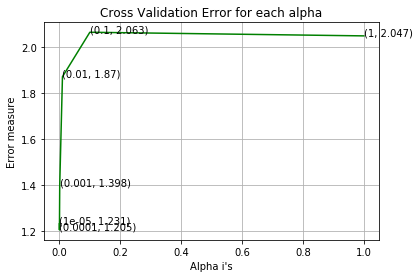

For values of best alpha =  0.0001 The train log loss is: 0.705165884804035
For values of best alpha =  0.0001 The cross validation log loss is: 1.2047819269066928
For values of best alpha =  0.0001 The test log loss is: 1.1604514624533362


In [64]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [52]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=10, max_features=5000)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [53]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

34.02 % of word of test data appeared in train data
33.92 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [39]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [40]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [41]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [100]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [101]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 12181)
(number of data points * number of features) in test data =  (665, 12181)
(number of data points * number of features) in cross validation data = (532, 12181)


In [102]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.248914701891545
for alpha = 0.0001
Log Loss : 1.240582399570973
for alpha = 0.001
Log Loss : 1.2367232633948446
for alpha = 0.1
Log Loss : 1.2463209817606011
for alpha = 1
Log Loss : 1.314472085390315
for alpha = 10
Log Loss : 1.4156677042183454
for alpha = 100
Log Loss : 1.4299012601700911
for alpha = 1000
Log Loss : 1.403889929135179


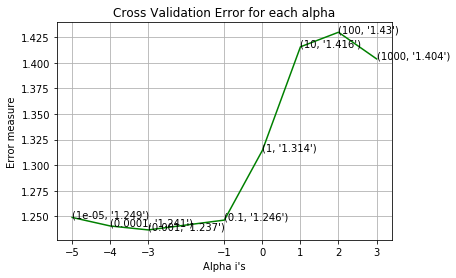

For values of best alpha =  0.001 The train log loss is: 0.7509116757627415
For values of best alpha =  0.001 The cross validation log loss is: 1.2367232633948446
For values of best alpha =  0.001 The test log loss is: 1.2680603221795845


In [211]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.2367232633948446
Number of missclassified point : 0.38721804511278196
-------------------- Confusion matrix --------------------


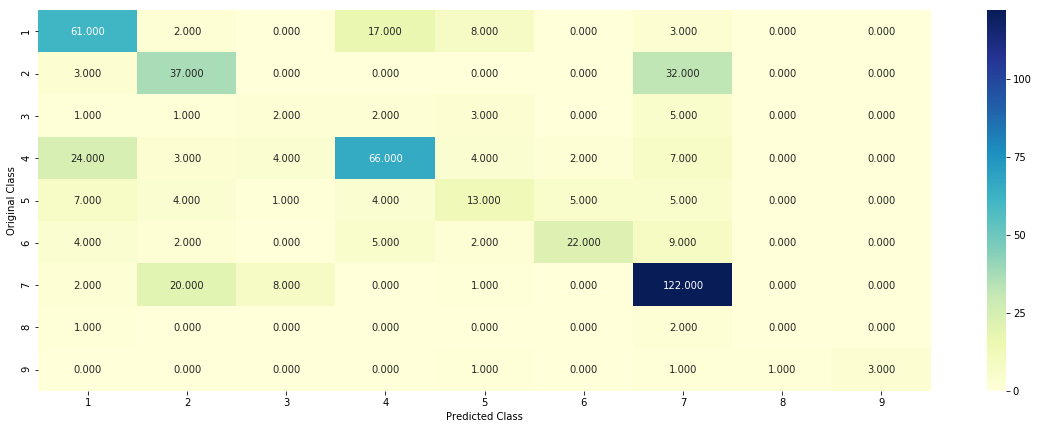

-------------------- Precision matrix (Columm Sum=1) --------------------


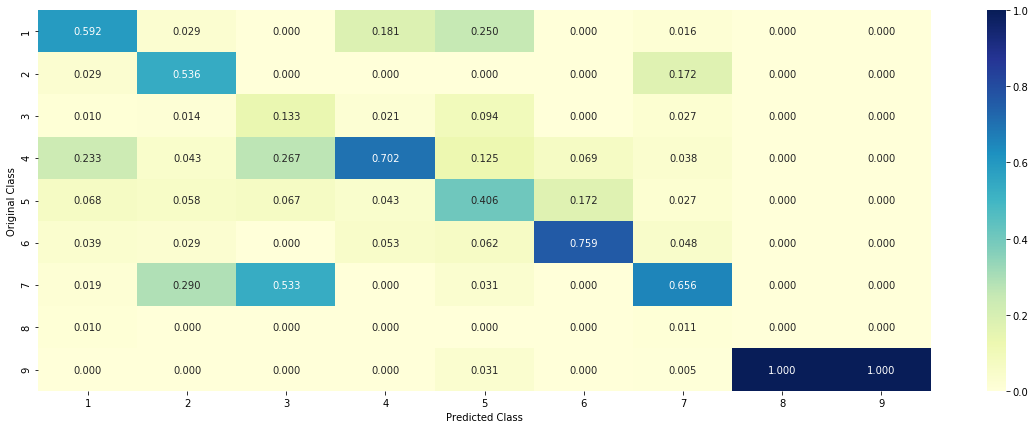

-------------------- Recall matrix (Row sum=1) --------------------


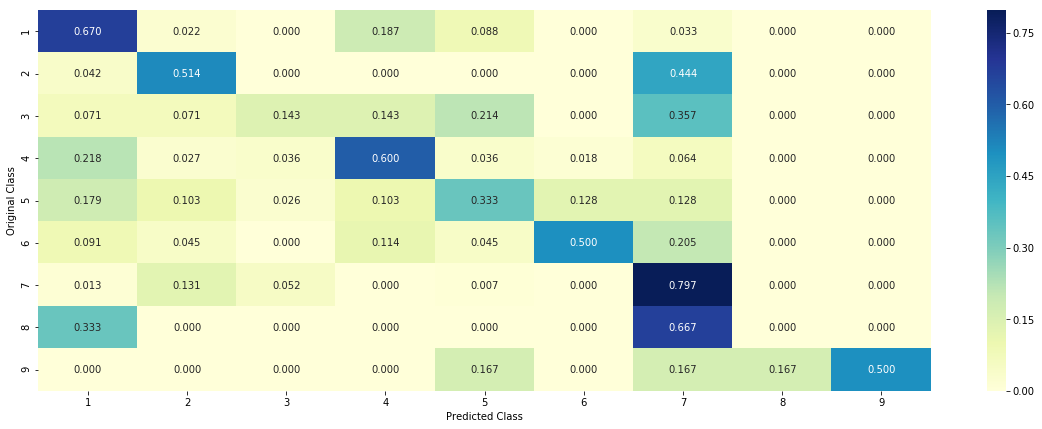

In [212]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [213]:
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1955 0.0653 0.0139 0.5442 0.042  0.0419 0.0912 0.004  0.0021]]
Actual Class : 4
--------------------------------------------------
58 Text feature [22] present in test data point [True]
88 Text feature [601399] present in test data point [True]
89 Text feature [analysis] present in test data point [True]
109 Text feature [71] present in test data point [True]
115 Text feature [19] present in test data point [True]
116 Text feature [38] present in test data point [True]
142 Text feature [abnormal] present in test data point [True]
217 Text feature [19k] present in test data point [True]
299 Text feature [abolish] present in test data point [True]
301 Text feature [13] present in test data point [True]
338 Text feature [act] present in test data point [True]
516 Text feature [alleles] present in test data point [True]
609 Text feature [30] present in test data point [True]
642 Text feature [12] present in test data point [True]
704 T

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [214]:
test_point_index = 12
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1092 0.1011 0.0229 0.1414 0.2479 0.0648 0.1465 0.1476 0.0187]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0515319987984146
for alpha = 11
Log Loss : 1.0510055185329903
for alpha = 15
Log Loss : 1.0515250809230197
for alpha = 21
Log Loss : 1.064603570915532
for alpha = 31
Log Loss : 1.0744525807952168
for alpha = 41
Log Loss : 1.078641711475431
for alpha = 51
Log Loss : 1.0803414749199358
for alpha = 99
Log Loss : 1.1216169444807995


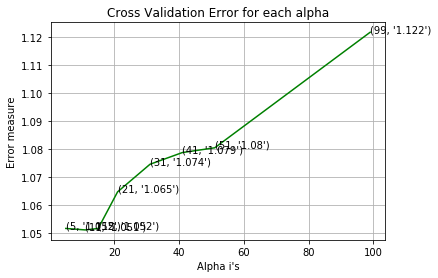

For values of best alpha =  11 The train log loss is: 0.6388451784939913
For values of best alpha =  11 The cross validation log loss is: 1.0510055185329903
For values of best alpha =  11 The test log loss is: 1.0873698890528134


In [135]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0510055185329903
Number of mis-classified points : 0.37030075187969924
-------------------- Confusion matrix --------------------


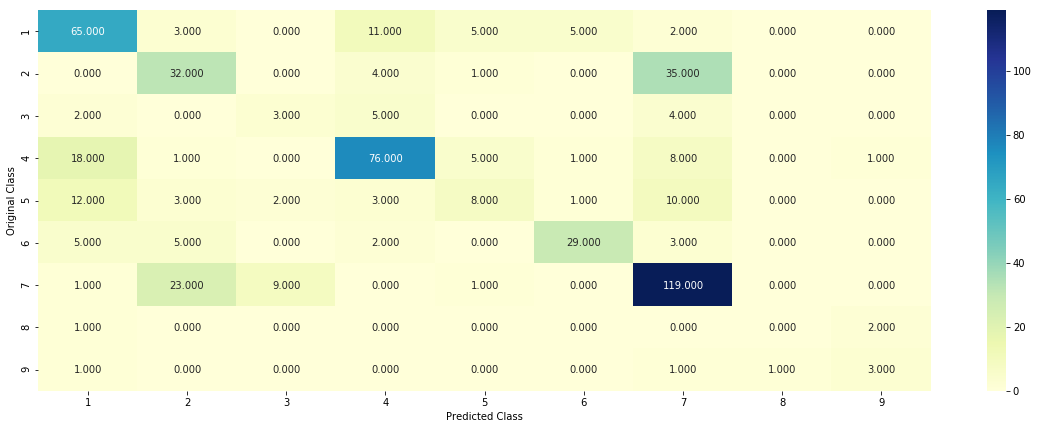

-------------------- Precision matrix (Columm Sum=1) --------------------


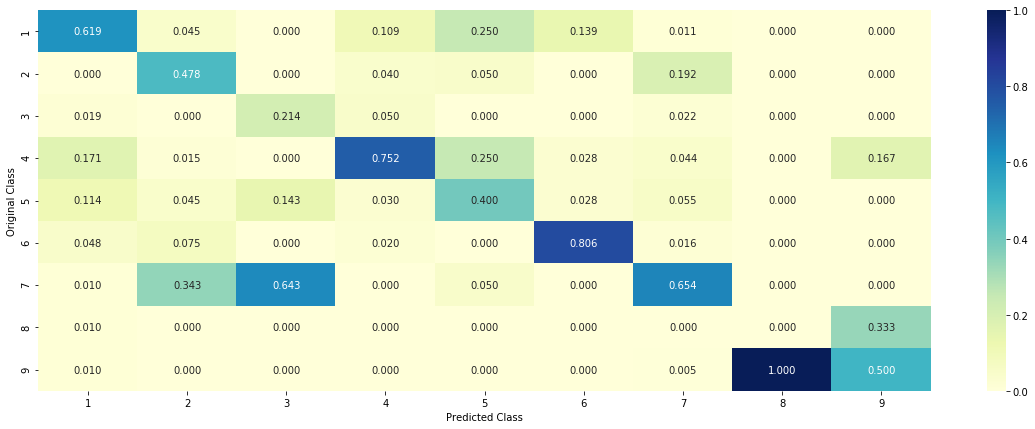

-------------------- Recall matrix (Row sum=1) --------------------


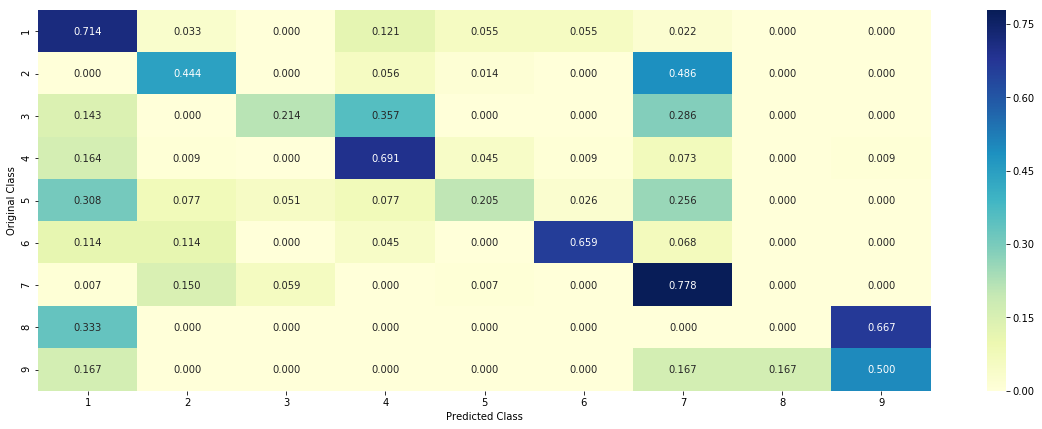

In [136]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [72]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 4
The  31  nearest neighbours of the test points belongs to classes [4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4]
Fequency of nearest points : Counter({4: 29, 1: 2})


<h3>4.2.4. Sample Query Point-2 </h3>

In [73]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 31 and the nearest neighbours of the test points belongs to classes [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Fequency of nearest points : Counter({7: 30, 2: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.5401880899720983
for alpha = 1e-05
Log Loss : 1.5594105074598468
for alpha = 0.0001
Log Loss : 1.4901246512602186
for alpha = 0.001
Log Loss : 1.1979639909415651
for alpha = 0.01
Log Loss : 1.2432682249291072
for alpha = 0.1
Log Loss : 1.3472010828158667
for alpha = 1
Log Loss : 1.4543614579199502
for alpha = 10
Log Loss : 1.4835037155722661
for alpha = 100
Log Loss : 1.4889752652859862


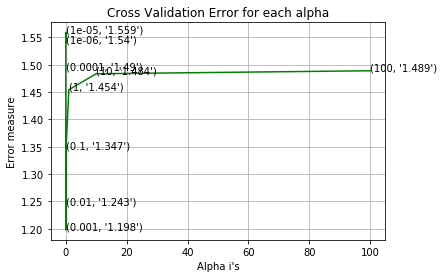

For values of best alpha =  0.001 The train log loss is: 0.7916100007675856
For values of best alpha =  0.001 The cross validation log loss is: 1.1979639909415651
For values of best alpha =  0.001 The test log loss is: 1.153974342982127


In [153]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.0223579903158366
Number of mis-classified points : 0.3026315789473684
-------------------- Confusion matrix --------------------


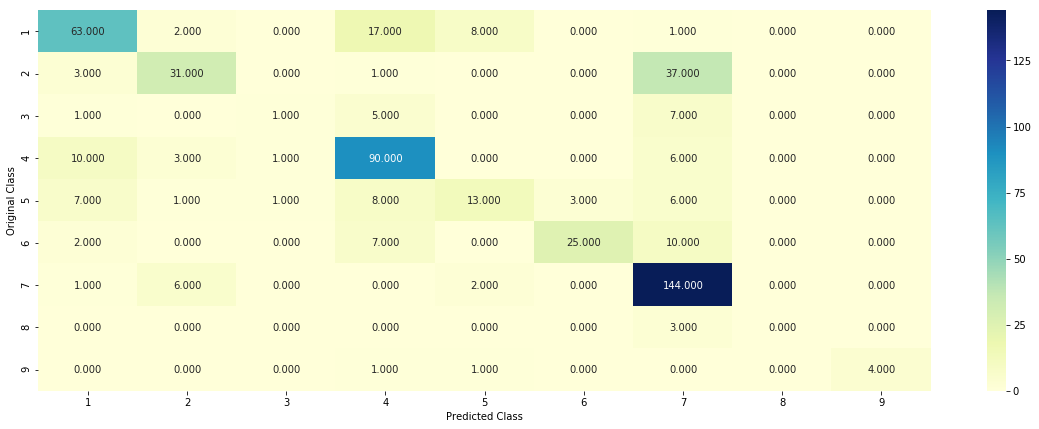

-------------------- Precision matrix (Columm Sum=1) --------------------


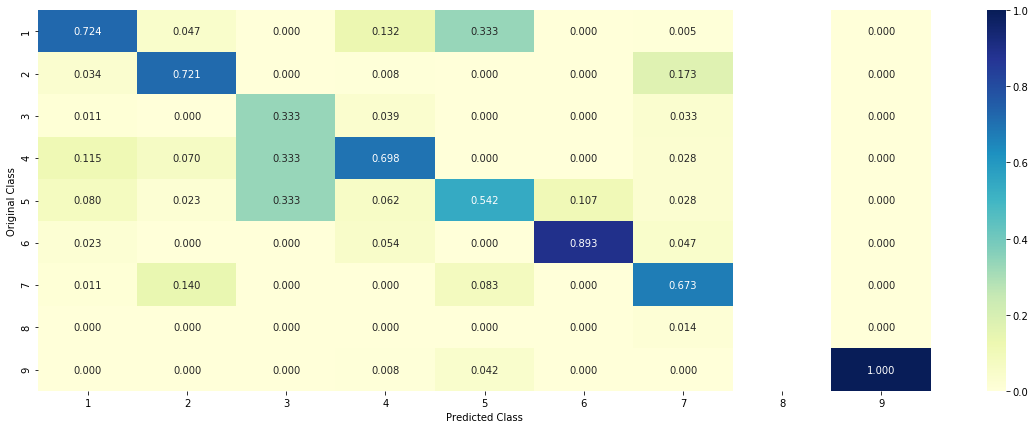

-------------------- Recall matrix (Row sum=1) --------------------


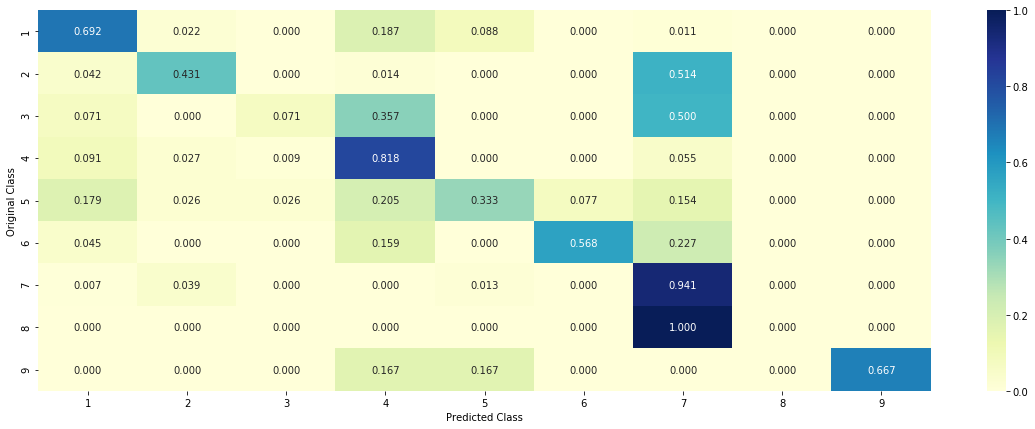

In [270]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [271]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [272]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1767 0.017  0.0055 0.7425 0.0094 0.0074 0.038  0.0026 0.0008]]
Actual Class : 4
--------------------------------------------------
359 Text feature [76] present in test data point [True]
363 Text feature [29] present in test data point [True]
449 Text feature [57] present in test data point [True]
480 Text feature [2b] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [274]:
test_point_index = 12
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0196 0.0203 0.0142 0.2299 0.4456 0.0136 0.008  0.0895 0.1595]]
Actual Class : 7
--------------------------------------------------
238 Text feature [100] present in test data point [True]
262 Text feature [2217] present in test data point [True]
380 Text feature [1t0l] present in test data point [True]
454 Text feature [2a] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.1178316147139558
for alpha = 1e-05
Log Loss : 1.1286700941375547
for alpha = 0.0001
Log Loss : 1.0354905771417635
for alpha = 0.001
Log Loss : 1.116192796578188
for alpha = 0.01
Log Loss : 1.337809693021511
for alpha = 0.1
Log Loss : 1.6906945613078885
for alpha = 1
Log Loss : 1.8021462124853862


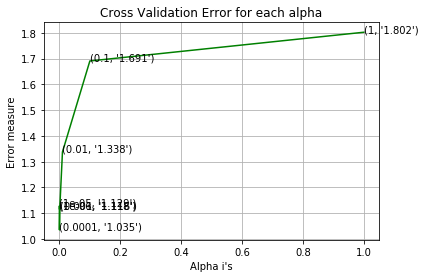

For values of best alpha =  0.0001 The train log loss is: 0.4171340627067658
For values of best alpha =  0.0001 The cross validation log loss is: 1.0354905771417635
For values of best alpha =  0.0001 The test log loss is: 1.0890151910016732


In [275]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.0354905771417635
Number of mis-classified points : 0.3007518796992481
-------------------- Confusion matrix --------------------


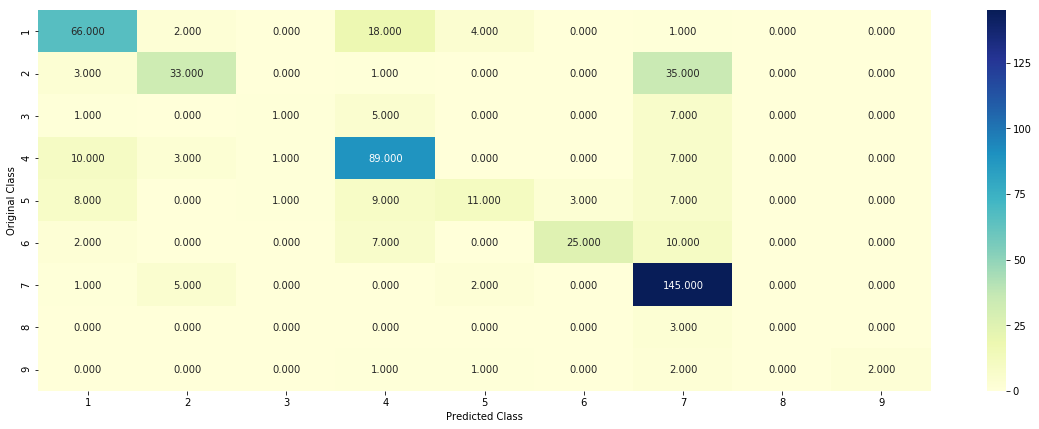

-------------------- Precision matrix (Columm Sum=1) --------------------


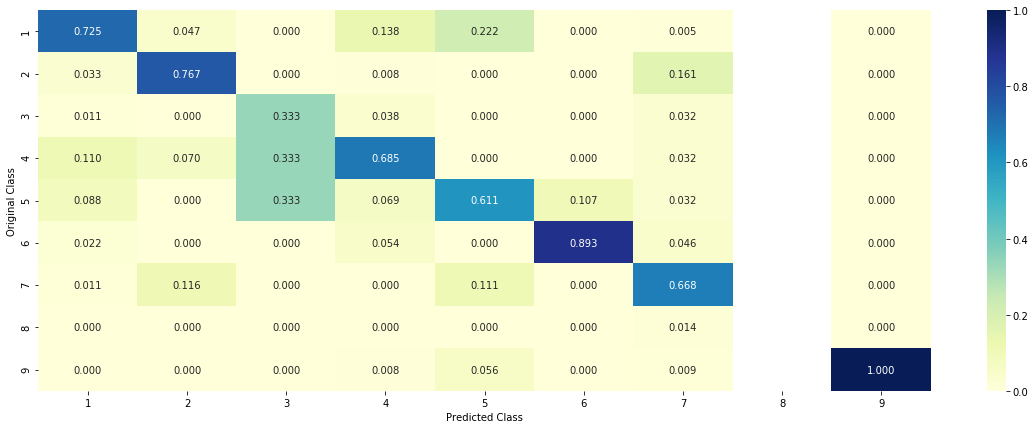

-------------------- Recall matrix (Row sum=1) --------------------


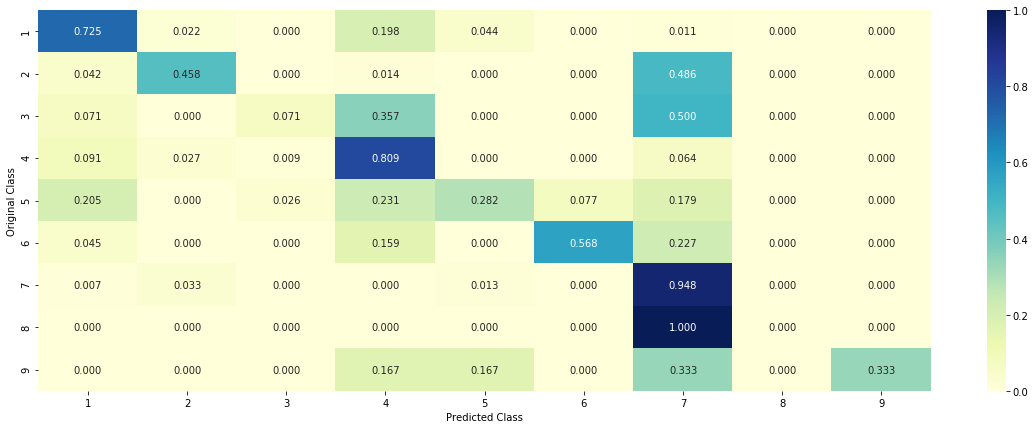

In [276]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [277]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.751e-01 1.710e-02 5.200e-03 7.410e-01 8.900e-03 7.000e-03 4.290e-02
  2.300e-03 4.000e-04]]
Actual Class : 4
--------------------------------------------------
370 Text feature [76] present in test data point [True]
397 Text feature [29] present in test data point [True]
464 Text feature [57] present in test data point [True]
484 Text feature [145] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [278]:
test_point_index = 11
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.4698 0.0084 0.0005 0.498  0.0076 0.0027 0.0124 0.0005 0.    ]]
Actual Class : 1
--------------------------------------------------
299 Text feature [75] present in test data point [True]
370 Text feature [76] present in test data point [True]
397 Text feature [29] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.102137759816982
for C = 0.0001
Log Loss : 1.0281363076815744
for C = 0.001
Log Loss : 1.0194443230177024
for C = 0.01
Log Loss : 1.120774433971054
for C = 0.1
Log Loss : 1.736006667328727
for C = 1
Log Loss : 1.741688158603737
for C = 10
Log Loss : 1.741686539288531
for C = 100
Log Loss : 1.7416865873401068


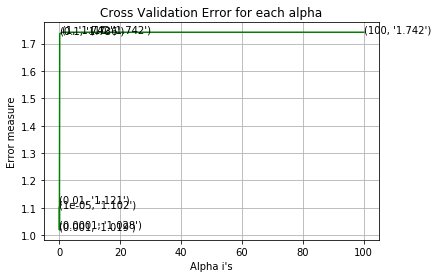

For values of best alpha =  0.001 The train log loss is: 0.4756151048578769
For values of best alpha =  0.001 The cross validation log loss is: 1.0194443230177024
For values of best alpha =  0.001 The test log loss is: 1.0810094120789544


In [224]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0194443230177024
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


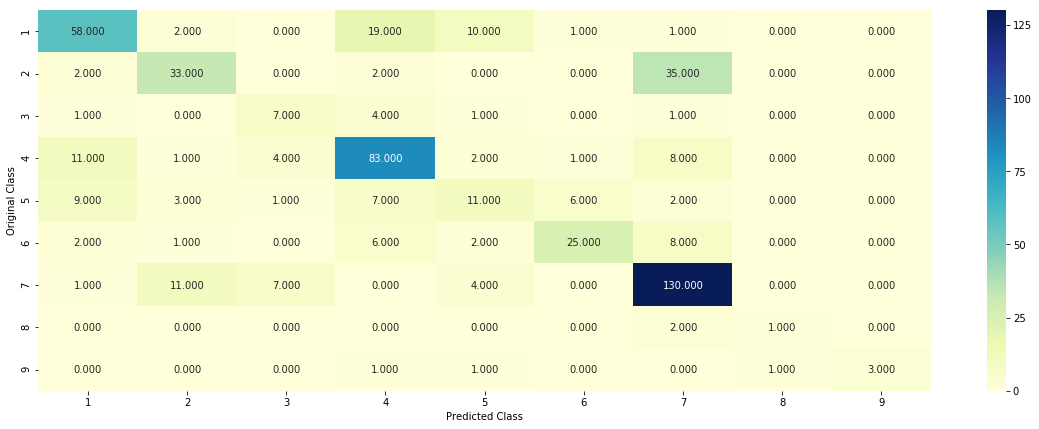

-------------------- Precision matrix (Columm Sum=1) --------------------


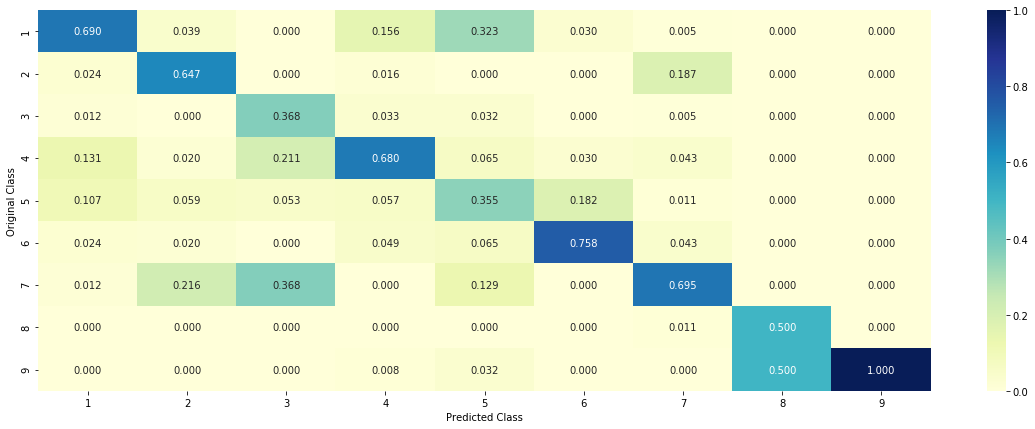

-------------------- Recall matrix (Row sum=1) --------------------


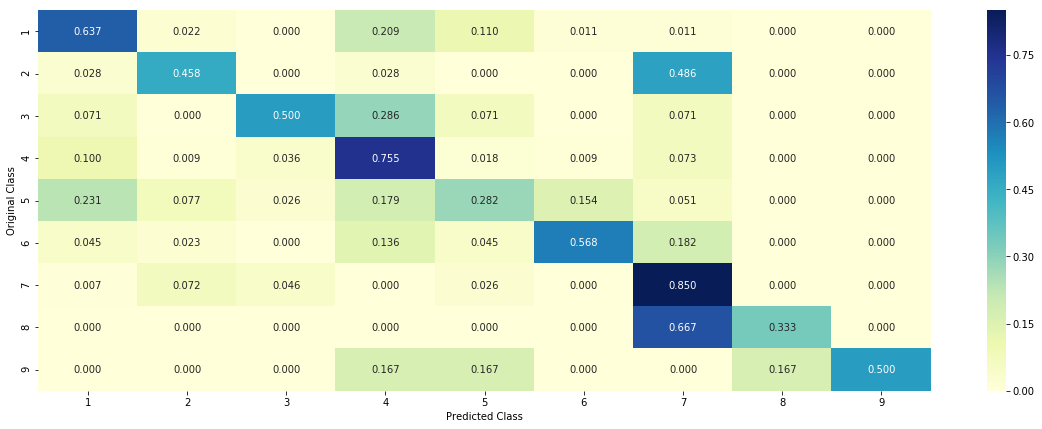

In [225]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [226]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[4.610e-02 1.870e-02 3.600e-03 8.511e-01 1.370e-02 6.500e-03 5.870e-02
  1.000e-03 6.000e-04]]
Actual Class : 4
--------------------------------------------------
256 Text feature [6b] present in test data point [True]
329 Text feature [42] present in test data point [True]
377 Text feature [analogous] present in test data point [True]
434 Text feature [address] present in test data point [True]
456 Text feature [analyses] present in test data point [True]
467 Text feature [80] present in test data point [True]
Out of the top  500  features  6 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [227]:
test_point_index = 11
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2319 0.0116 0.0033 0.5717 0.0243 0.009  0.1468 0.0006 0.0008]]
Actual Class : 1
--------------------------------------------------
168 Text feature [99] present in test data point [True]
191 Text feature [addressed] present in test data point [True]
265 Text feature [accessible] present in test data point [True]
329 Text feature [42] present in test data point [True]
343 Text feature [affinity42] present in test data point [True]
377 Text feature [analogous] present in test data point [True]
434 Text feature [address] present in test data point [True]
456 Text feature [analyses] present in test data point [True]
554 Text feature [1989] present in test data point [True]
561 Text feature [agents] present in test data point [True]
614 Text feature [abundant] present in test data point [True]
623 Text feature [55] present in test data point [True]
653 Text feature [affinities] present in test data point [True]
678 Text feature [afterwa

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [91]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2463453963006337
for n_estimators = 100 and max depth =  10
Log Loss : 1.2559771619712576
for n_estimators = 200 and max depth =  5
Log Loss : 1.2361175912958131
for n_estimators = 200 and max depth =  10
Log Loss : 1.2452368980466992
for n_estimators = 500 and max depth =  5
Log Loss : 1.2305268439400538
for n_estimators = 500 and max depth =  10
Log Loss : 1.2406945614312292
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2308964085439669
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2386235785189585
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2290083778730985
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2372246234447666
For values of best estimator =  2000 The train log loss is: 0.8624403124225934
For values of best estimator =  2000 The cross validation log loss is: 1.2290083778730985
For values of best estimator =  2000 The test log loss is: 1.222301769822958


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.2290083778730985
Number of mis-classified points : 0.41541353383458646
-------------------- Confusion matrix --------------------


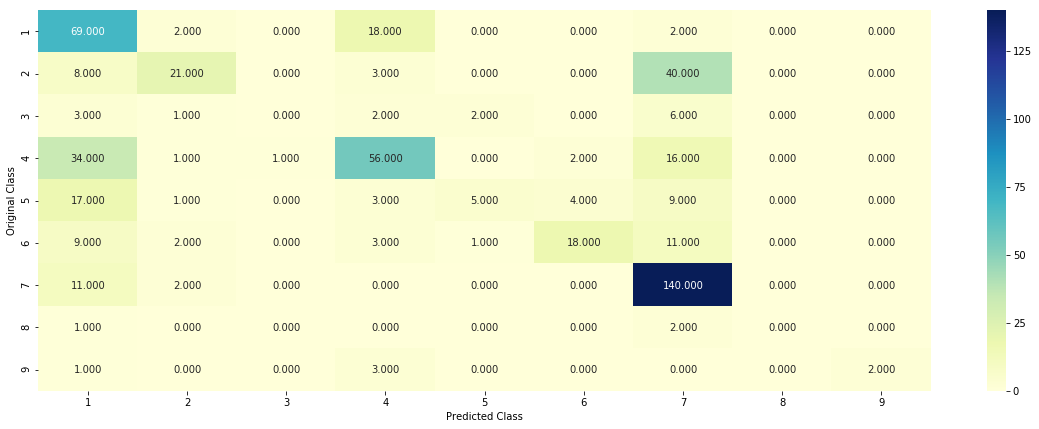

-------------------- Precision matrix (Columm Sum=1) --------------------


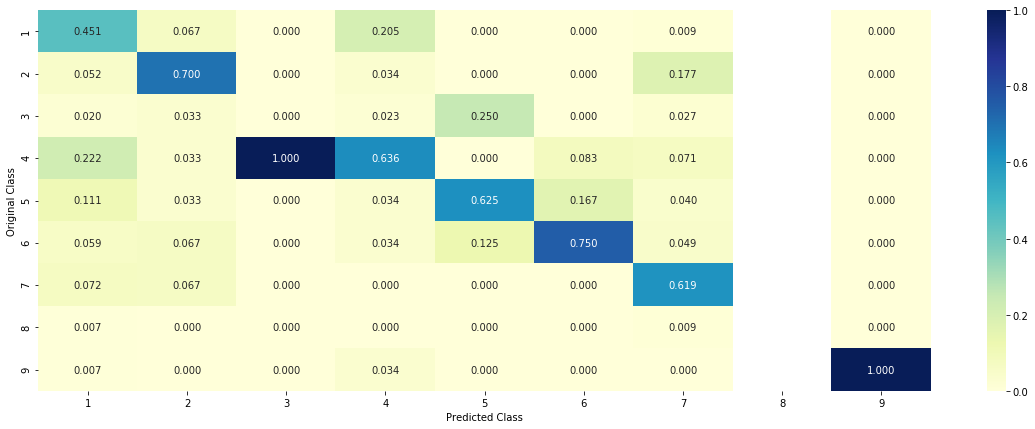

-------------------- Recall matrix (Row sum=1) --------------------


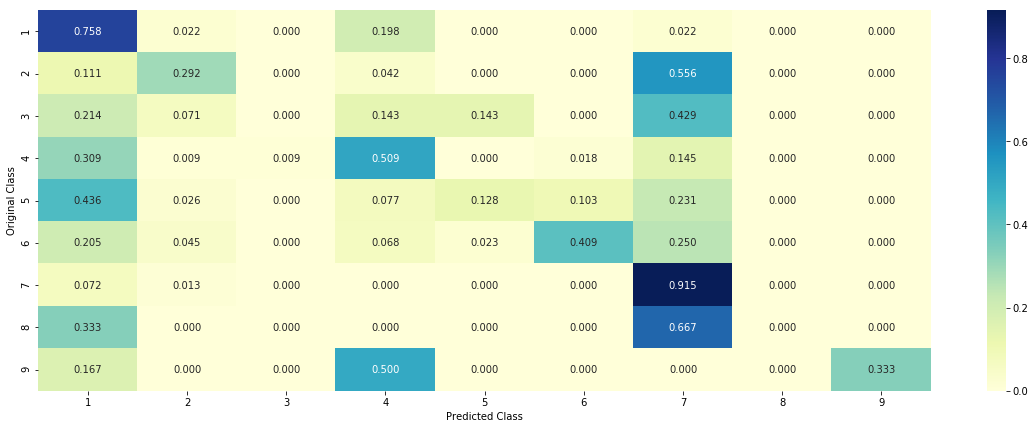

In [92]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [98]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 6
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.600e-02 2.585e-01 2.240e-02 1.850e-02 3.530e-02 3.230e-02 6.031e-01
  3.300e-03 5.000e-04]]
Actual Class : 7
--------------------------------------------------
46 Text feature [10] present in test data point [True]
82 Text feature [11] present in test data point [True]
118 Text feature [1166] present in test data point [True]
399 Text feature [12] present in test data point [True]
513 Text feature [0013] present in test data point [True]
587 Text feature [100k] present in test data point [True]
639 Text feature [1038] present in test data point [True]
666 Text feature [1253] present in test data point [True]
709 Text feature [1235] present in test data point [True]
758 Text feature [100] present in test data point [True]
805 Text feature [123] present in test data point [True]
866 Text feature [1271] present in test data point [True]
873 Text feature [13] present in test data point [True]
Out of the top  1000  features  13 are pres

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [96]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3595 0.1361 0.0202 0.1153 0.0558 0.052  0.2084 0.0224 0.0304]]
Actuall Class : 7
--------------------------------------------------
46 Text feature [10] present in test data point [True]
82 Text feature [11] present in test data point [True]
160 Text feature [1011] present in test data point [True]
174 Text feature [000] present in test data point [True]
337 Text feature [11b] present in test data point [True]
399 Text feature [12] present in test data point [True]
404 Text feature [105] present in test data point [True]
559 Text feature [11a] present in test data point [True]
578 Text feature [112] present in test data point [True]
597 Text feature [106] present in test data point [True]
668 Text feature [10ng] present in test data point [True]
873 Text feature [13] present in test data point [True]
915 Text feature [120] present in test data point [True]
963 Text feature [104] present in test data point [True]
Out of the top  100

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [228]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
"""
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
"""

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.192496933743523
for n_estimators = 10 and max depth =  3
Log Loss : 1.6243040950960994
for n_estimators = 10 and max depth =  5
Log Loss : 1.5308266607435403
for n_estimators = 10 and max depth =  10
Log Loss : 1.8192520740442522
for n_estimators = 50 and max depth =  2
Log Loss : 1.7701639900960602
for n_estimators = 50 and max depth =  3
Log Loss : 1.4504106723838643
for n_estimators = 50 and max depth =  5
Log Loss : 1.3837874669499097
for n_estimators = 50 and max depth =  10
Log Loss : 1.762333496374847
for n_estimators = 100 and max depth =  2
Log Loss : 1.5915780383091052
for n_estimators = 100 and max depth =  3
Log Loss : 1.4602516790636246
for n_estimators = 100 and max depth =  5
Log Loss : 1.3295532814629036
for n_estimators = 100 and max depth =  10
Log Loss : 1.7423825982098107
for n_estimators = 200 and max depth =  2
Log Loss : 1.652003390988076
for n_estimators = 200 and max depth =  3
Log Loss : 1.5106825460726994


<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.3295532814629036
Number of mis-classified points : 0.45300751879699247
-------------------- Confusion matrix --------------------


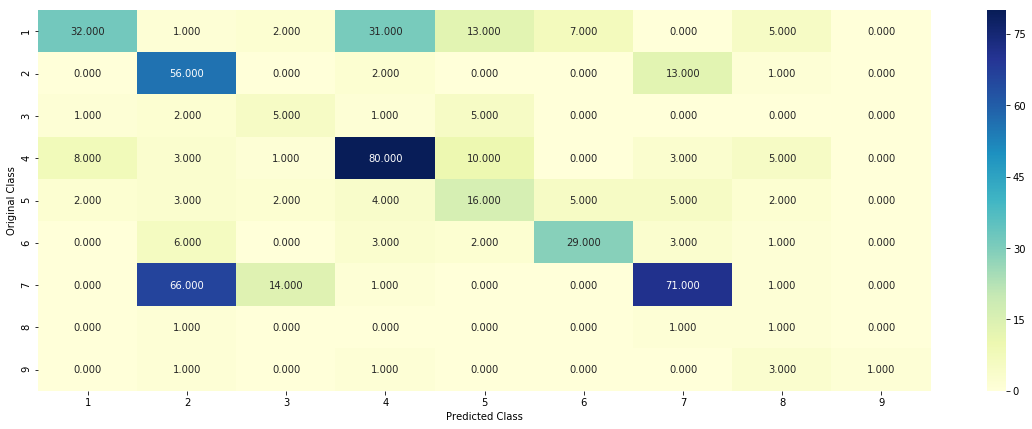

-------------------- Precision matrix (Columm Sum=1) --------------------


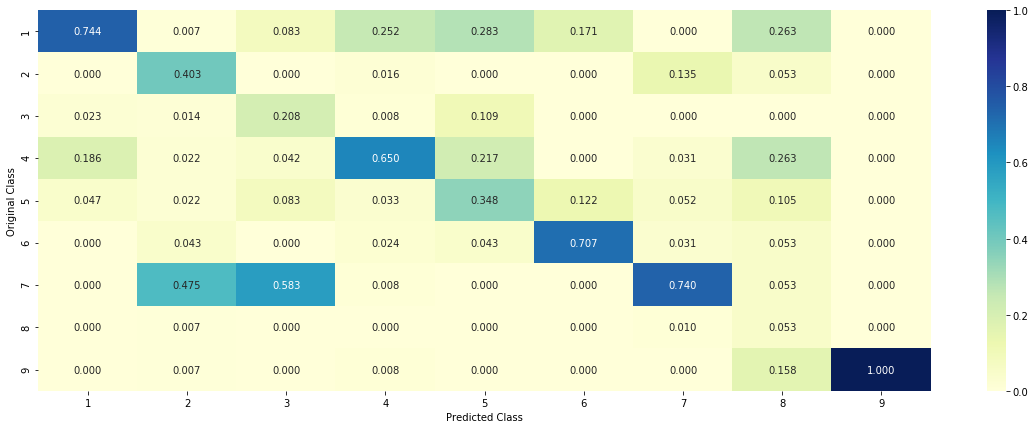

-------------------- Recall matrix (Row sum=1) --------------------


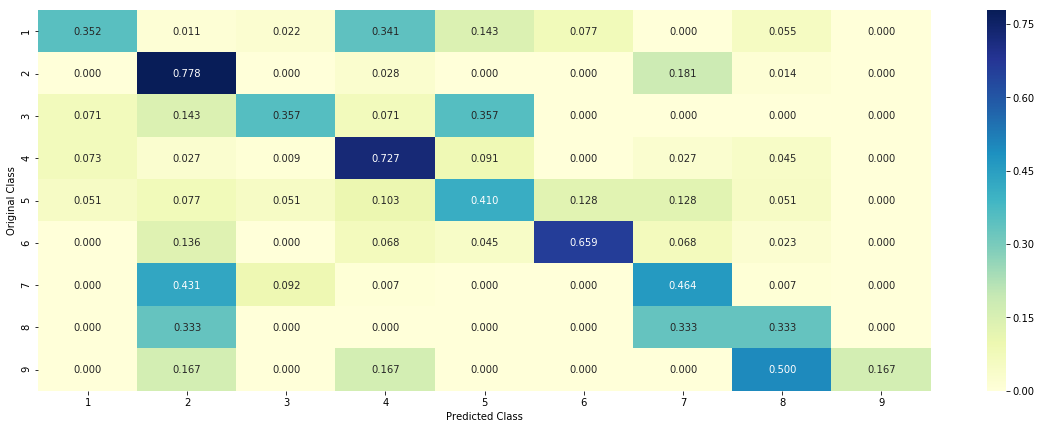

In [182]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [183]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.1603 0.0328 0.1939 0.4421 0.0422 0.0448 0.0123 0.0514 0.0203]]
Actual Class : 4
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [184]:
test_point_index = 6
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0092 0.4578 0.0987 0.0184 0.0318 0.0357 0.3229 0.0167 0.0088]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [229]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.02
Support vector machines : Log Loss: 1.74
Naive Bayes : Log Loss: 1.24
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.025
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.468
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.104
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.207
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.435


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.6480965976927581
Log loss (CV) on the stacking classifier : 1.1039478366110875
Log loss (test) on the stacking classifier : 1.1349307092092904
Number of missclassified point : 0.3669172932330827
-------------------- Confusion matrix --------------------


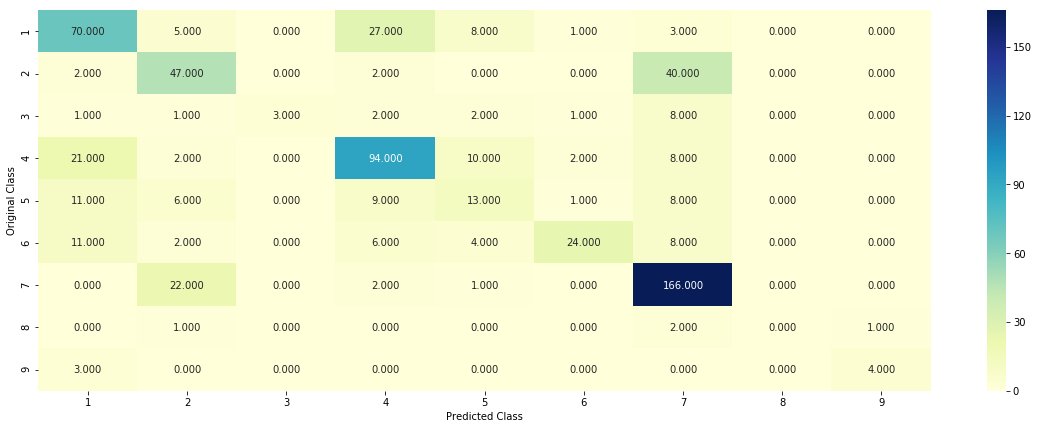

-------------------- Precision matrix (Columm Sum=1) --------------------


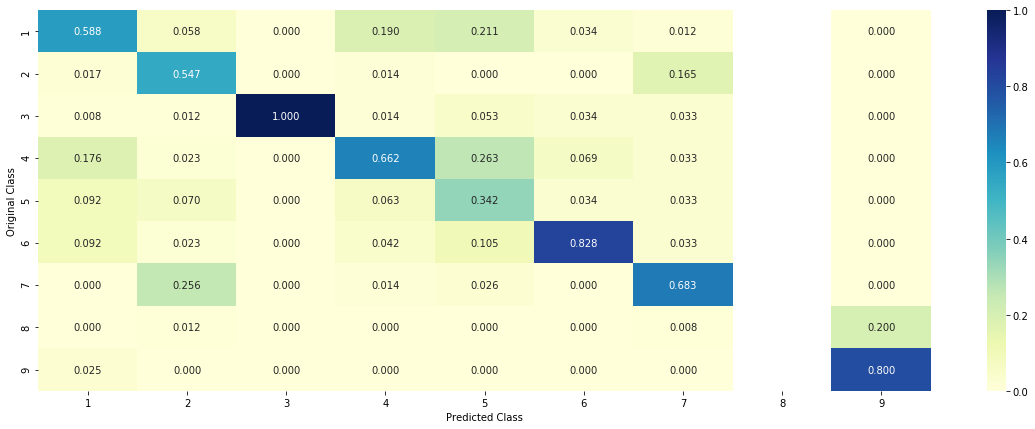

-------------------- Recall matrix (Row sum=1) --------------------


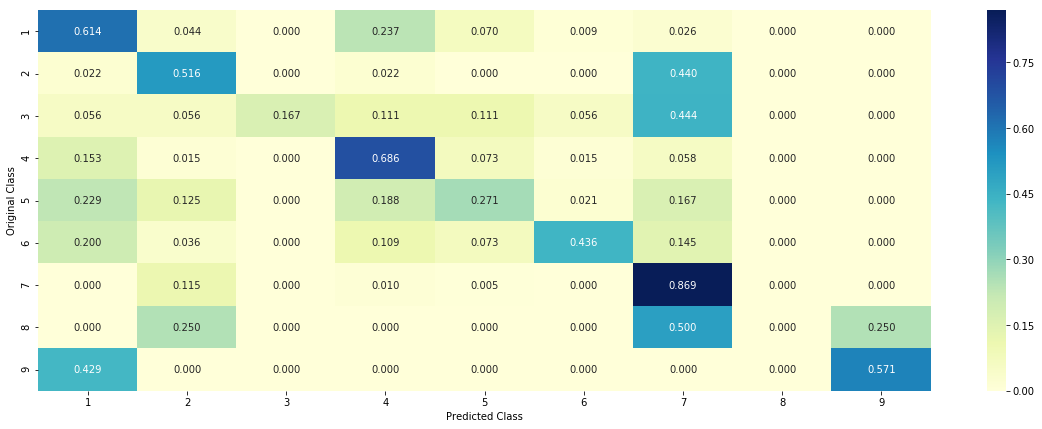

In [230]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8228478056328926
Log loss (CV) on the VotingClassifier : 1.2484195699960718
Log loss (test) on the VotingClassifier : 1.2298293116433938
Number of missclassified point : 0.4105263157894737
-------------------- Confusion matrix --------------------


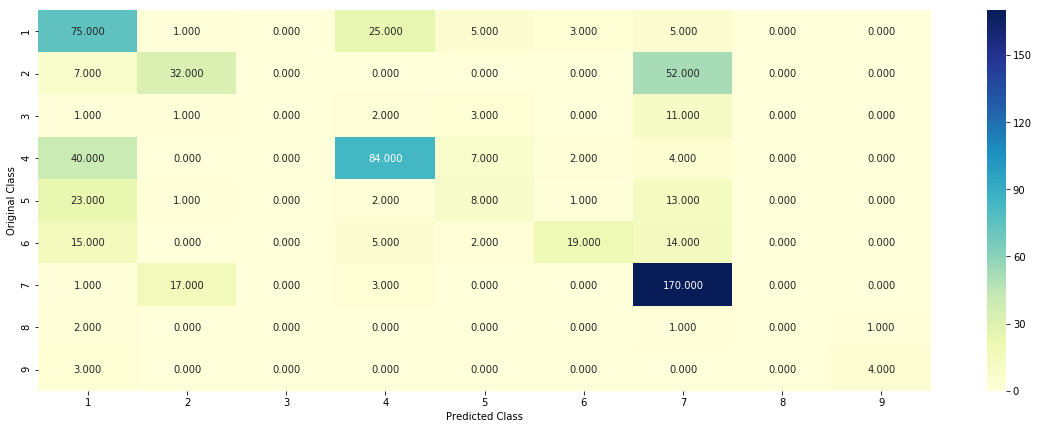

-------------------- Precision matrix (Columm Sum=1) --------------------


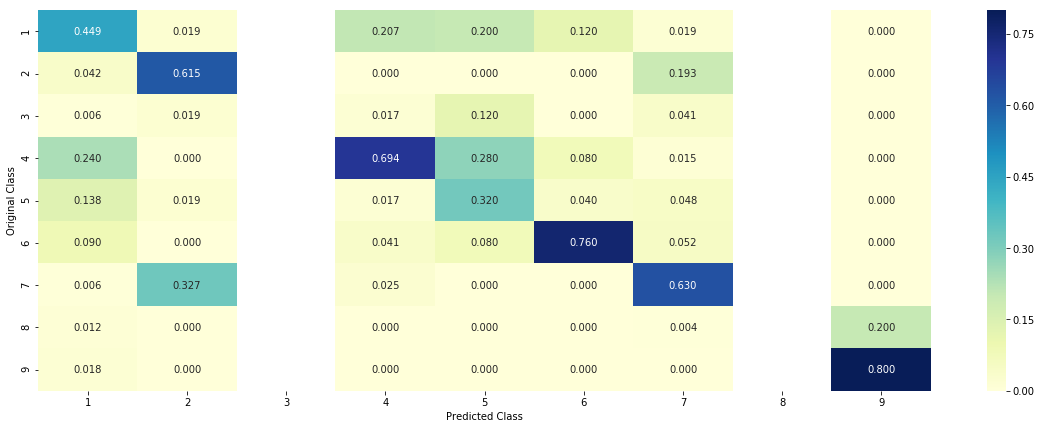

-------------------- Recall matrix (Row sum=1) --------------------


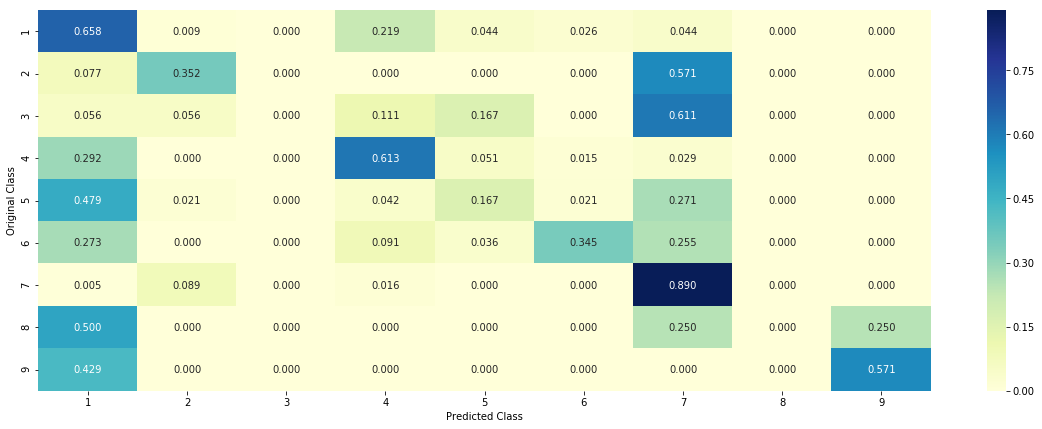

In [106]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

### 1, 2
This is the performance of various models with respect to the tfidf features. I observed that few models were overfitting initially(when only 1000 top features were taken) so to resolve that issue I tried to run  those models again with increased number of features.

* Performance table for tf-idf vectorizer with top 1000 features

In [17]:
######################### performance using top 1000 tfidf features ################################

pt = PrettyTable()
pt.field_names = ["S.No.","Model","Best alpha", "Train", "Cross Validation","Test", "Misclassfied Points"]
pt.add_row(["1","Naive Bayes", 0.001, 0.513, 1.254, 1.226, 41])
pt.add_row(["2","KNN", "k=31", 0.807, 1.092, 1.087, 37])
pt.add_row(["3","LR with class balancing", 0.0001, 0.440, 1.049, 1.051, 34])
pt.add_row(["4","LR without class balancing", 0.0001, 0.432, 1.090, 1.091, 33])
pt.add_row(["5","Linear SVM", 0.0001, 0.397, 1.060, 1.089, 34])
pt.add_row(["6","RF OneHot encoding", 2000, 0.862, 1.222, 1.222, 41])
pt.add_row(["7","RF Response coding", 100, 0.061, 1.329, 1.339, 45])
pt.add_row(["8","Stacking Models LR + SVM + NB", 0.1, 0.532, 1.229, 1.190, 40])
pt.add_row(["9","Maximum Voting Classifier", 0.1, 0.822, 1.248, 1.229, 41])
print(pt)


+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
| S.No. |             Model             | Best alpha | Train | Cross Validation |  Test | Misclassfied Points |
+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
|   1   |          Naive Bayes          |   0.001    | 0.513 |      1.254       | 1.226 |          41         |
|   2   |              KNN              |    k=31    | 0.807 |      1.092       | 1.087 |          37         |
|   3   |    LR with class balancing    |   0.0001   |  0.44 |      1.049       | 1.051 |          34         |
|   4   |   LR without class balancing  |   0.0001   | 0.432 |       1.09       | 1.091 |          33         |
|   5   |           Linear SVM          |   0.0001   | 0.397 |       1.06       | 1.089 |          34         |
|   6   |       RF OneHot encoding      |    2000    | 0.862 |      1.222       | 1.222 |          41   

* Performance table for tf-idf vectorizer with 2000 features

In [19]:
################################ performace using 2000 top tfidf features #######################

pt = PrettyTable()
pt.field_names = ["S.No.","Model","Best alpha", "Train", "Cross Validation","Test", "Misclassfied Points"]
pt.add_row(["1","Naive Bayes", 0.0001, 0.554, 1.273, 1.263, 42])
pt.add_row(["2","LR with class balancing", 0.0001, 0.427, 1.035, 1.038, 31])
pt.add_row(["3","LR without class balancing", 0.0001, 0.429, 1.073, 1.074, 32])
pt.add_row(["4","Linear SVM", 0.001, 0.505, 1.055, 1.073, 34])
pt.add_row(["5","RF Response coding", 100, 0.061, 1.329, 1.339, 45])
pt.add_row(["6","Stacking Models LR + SVM + NB", 0.1, 0.587, 1.212, 1.189, 40])
print(pt)


+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
| S.No. |             Model             | Best alpha | Train | Cross Validation |  Test | Misclassfied Points |
+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
|   1   |          Naive Bayes          |   0.0001   | 0.554 |      1.273       | 1.263 |          42         |
|   2   |    LR with class balancing    |   0.0001   | 0.427 |      1.035       | 1.038 |          31         |
|   3   |   LR without class balancing  |   0.0001   | 0.429 |      1.073       | 1.074 |          32         |
|   4   |           Linear SVM          |   0.001    | 0.505 |      1.055       | 1.073 |          34         |
|   5   |       RF Response coding      |    100     | 0.061 |      1.329       | 1.339 |          45         |
|   6   | Stacking Models LR + SVM + NB |    0.1     | 0.587 |      1.212       | 1.189 |          40   

* Performance table for tf-idf vectorizer with 4000 features

In [20]:
############################ performance using 4000 top tfidf features ##################################

pt = PrettyTable()
pt.field_names = ["S.No.","Model","Best alpha", "Train", "Cross Validation","Test", "Misclassfied Points"]
pt.add_row(["1","Naive Bayes", 0.00001, 0.603, 1.245, 1.273, 39])
pt.add_row(["2","LR with class balancing", 0.0001, 0.422, 1.025, 1.036, 31])
pt.add_row(["3","LR without class balancing", 0.0001, 0.420, 1.066, 1.065, 31])
pt.add_row(["4","Linear SVM", 0.0001, 0.415, 1.023, 1.082, 31])
pt.add_row(["6","Stacking Models LR + SVM + NB", 0.1, 0.635, 1.157, 1.160, 38])
print(pt)


+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
| S.No. |             Model             | Best alpha | Train | Cross Validation |  Test | Misclassfied Points |
+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
|   1   |          Naive Bayes          |   1e-05    | 0.603 |      1.245       | 1.273 |          39         |
|   2   |    LR with class balancing    |   0.0001   | 0.422 |      1.025       | 1.036 |          31         |
|   3   |   LR without class balancing  |   0.0001   |  0.42 |      1.066       | 1.065 |          31         |
|   4   |           Linear SVM          |   0.0001   | 0.415 |      1.023       | 1.082 |          31         |
|   6   | Stacking Models LR + SVM + NB |    0.1     | 0.635 |      1.157       |  1.16 |          38         |
+-------+-------------------------------+------------+-------+------------------+-------+---------------

* Performance table for tf-idf vectorizer with 8000 features

In [21]:
########################### performace table using top 8000 tfidf features ###############################

pt = PrettyTable()
pt.field_names = ["S.No.","Model","Best alpha", "Train", "Cross Validation","Test", "Misclassfied Points"]
pt.add_row(["1","Naive Bayes", 0.001, 0.750, 1.236, 1.268, 38])
pt.add_row(["2","LR with class balancing", 0.0001, 0.428, 1.028, 1.046, 31])
pt.add_row(["3","LR without class balancing", 0.0001, 0.419, 1.056, 1.075, 31])
pt.add_row(["4","Linear SVM", 0.001, 0.475, 1.019, 1.081, 34])
pt.add_row(["6","Stacking Models LR + SVM + NB", 0.1, 0.648, 1.103, 1.134, 37])
print(pt)

+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
| S.No. |             Model             | Best alpha | Train | Cross Validation |  Test | Misclassfied Points |
+-------+-------------------------------+------------+-------+------------------+-------+---------------------+
|   1   |          Naive Bayes          |   0.001    |  0.75 |      1.236       | 1.268 |          38         |
|   2   |    LR with class balancing    |   0.0001   | 0.428 |      1.028       | 1.046 |          31         |
|   3   |   LR without class balancing  |   0.0001   | 0.419 |      1.056       | 1.075 |          31         |
|   4   |           Linear SVM          |   0.001    | 0.475 |      1.019       | 1.081 |          34         |
|   6   | Stacking Models LR + SVM + NB |    0.1     | 0.648 |      1.103       | 1.134 |          37         |
+-------+-------------------------------+------------+-------+------------------+-------+---------------

#### 3. Logistic Regression with CountVectorizer features Bigram

In [58]:
# building a CountVectorizer with all the words that occured minimum 10 times in train data 
# only for Logistic Regression, as with TfidfVectorizer Logistic Regression is not performing well
text_vectorizer = CountVectorizer(min_df=10, ngram_range=(1, 2))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 219597


In [59]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [60]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [61]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 221784)
(number of data points * number of features) in test data =  (665, 221784)
(number of data points * number of features) in cross validation data = (532, 221784)


Logistic Regression

for alpha = 1e-06
Log Loss : 1.422987132578381
for alpha = 1e-05
Log Loss : 1.4143285387178606
for alpha = 0.0001
Log Loss : 1.251932992218001
for alpha = 0.001
Log Loss : 1.165735457465465
for alpha = 0.01
Log Loss : 1.2443011413725826
for alpha = 0.1
Log Loss : 1.3267430155937652
for alpha = 1
Log Loss : 1.4346156274978699
for alpha = 10
Log Loss : 1.4772648918502151
for alpha = 100
Log Loss : 1.4837941217305397


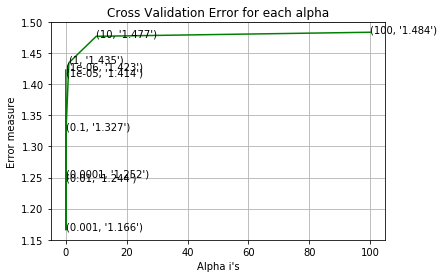

For values of best alpha =  0.001 The train log loss is: 0.5962160022873862
For values of best alpha =  0.001 The cross validation log loss is: 1.165735457465465
For values of best alpha =  0.001 The test log loss is: 1.126932847173988


In [62]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Testing

Log loss : 1.2108878723679422
Number of mis-classified points : 0.36278195488721804
-------------------- Confusion matrix --------------------


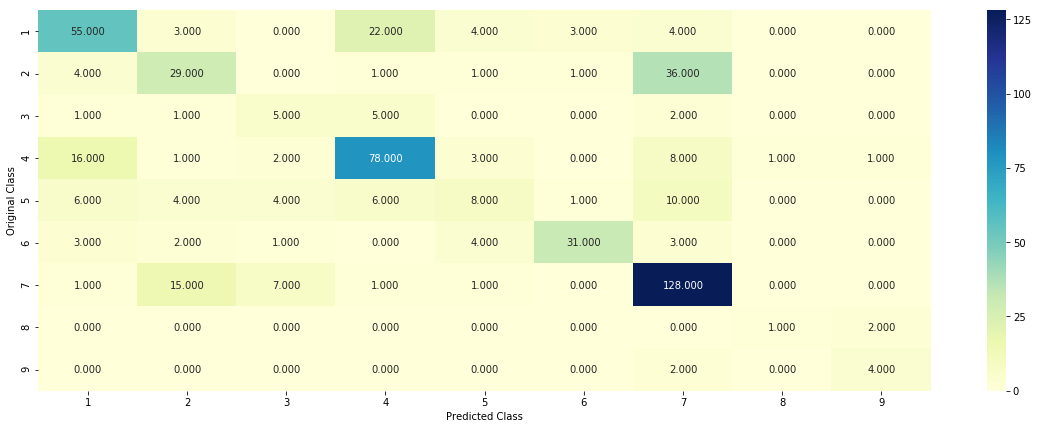

-------------------- Precision matrix (Columm Sum=1) --------------------


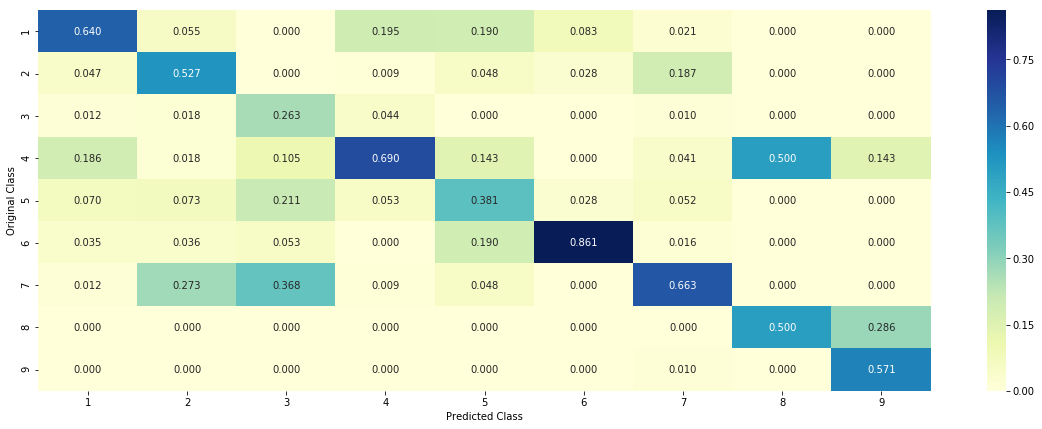

-------------------- Recall matrix (Row sum=1) --------------------


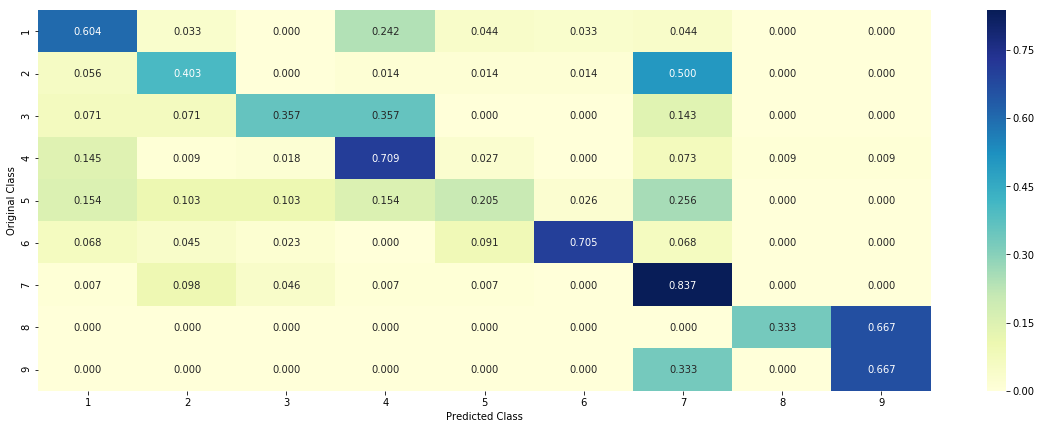

In [63]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

### 4. Feature Engineerting

##### 4.1. Using 4gram with KNN classifier 

In [35]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data 
# only for Logistic Regression, as with TfidfVectorizer Logistic Regression is not performing well
text_vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1, 4))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 624053


In [36]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [46]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [47]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 626258)
(number of data points * number of features) in test data =  (665, 626258)
(number of data points * number of features) in cross validation data = (532, 626258)


KNN Classifier

for alpha = 5
Log Loss : 1.0390009156532347
for alpha = 11
Log Loss : 1.012617055336673
for alpha = 15
Log Loss : 1.005755249592562
for alpha = 21
Log Loss : 1.0125019249245404
for alpha = 31
Log Loss : 1.0113895533748627
for alpha = 41
Log Loss : 1.0216166278237597
for alpha = 51
Log Loss : 1.0375597608462803
for alpha = 99
Log Loss : 1.0841212293675873


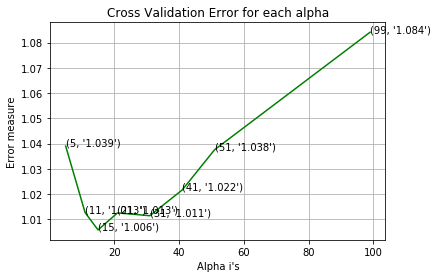

For values of best alpha =  15 The train log loss is: 0.6854622250743824
For values of best alpha =  15 The cross validation log loss is: 1.005755249592562
For values of best alpha =  15 The test log loss is: 1.0514381315733239


In [72]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss : 1.005755249592562
Number of mis-classified points : 0.35526315789473684
-------------------- Confusion matrix --------------------


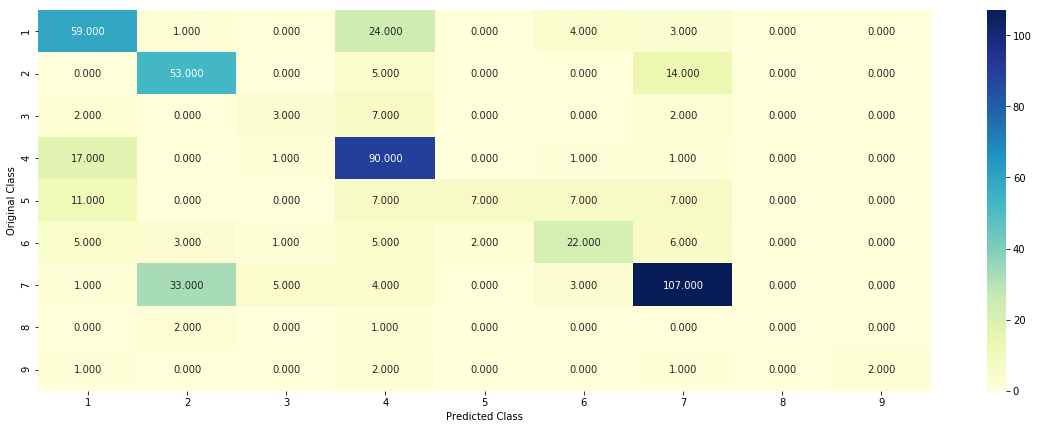

-------------------- Precision matrix (Columm Sum=1) --------------------


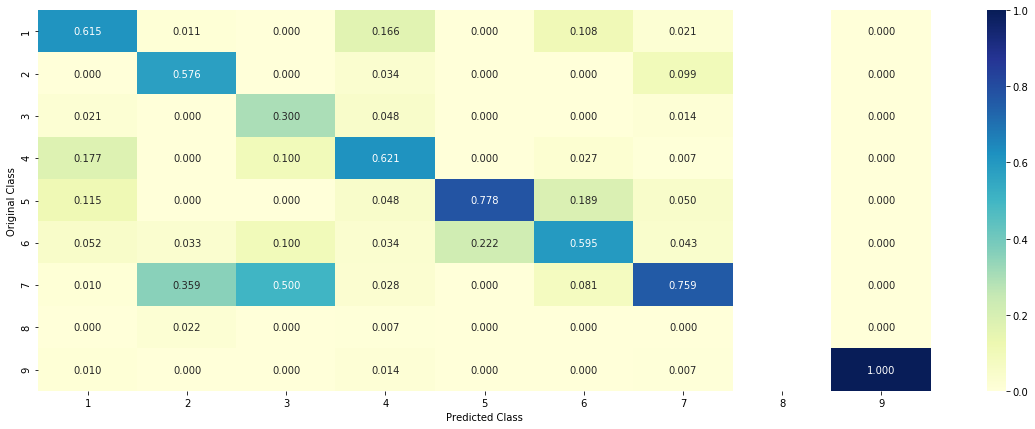

-------------------- Recall matrix (Row sum=1) --------------------


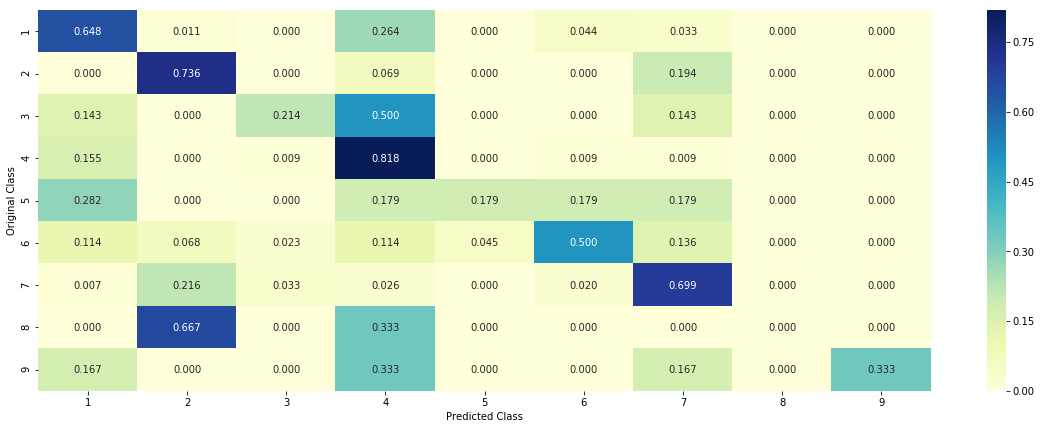

In [77]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

##### 4.2. Combining gene and variation feature together to form a new feature.

In [64]:
# another try at feature engineering combining gene and variation feature:
gene_and_variation = []

for gene in result['Gene'].values:
    gene_and_variation.append(gene)

for variation in result['Variation'].values:
    gene_and_variation.append(variation)

In [65]:
len(gene_and_variation)

6642

In [ ]:
TfidfVectorizer

In [86]:
tfidf_vect = TfidfVectorizer(max_features=1000)
text2 = tfidf_vect.fit_transform(gene_and_variation)
gene_variation_features = tfidf_vect.get_feature_names()

train_text = tfidf_vect.transform(train_df['TEXT'])
test_text = tfidf_vect.transform(test_df['TEXT'])
cv_text = tfidf_vect.transform(cv_df['TEXT'])

for alpha = 1e-06
Log Loss : 1.132886709548761
for alpha = 1e-05
Log Loss : 1.0905706814231304
for alpha = 0.0001
Log Loss : 1.0234010219643115
for alpha = 0.001
Log Loss : 1.0877625325504625
for alpha = 0.01
Log Loss : 1.284292748102132
for alpha = 0.1
Log Loss : 1.8795657226550508
for alpha = 1
Log Loss : 1.9804525583367718
for alpha = 10
Log Loss : 1.9883881726035137
for alpha = 100
Log Loss : 1.9892224180678835


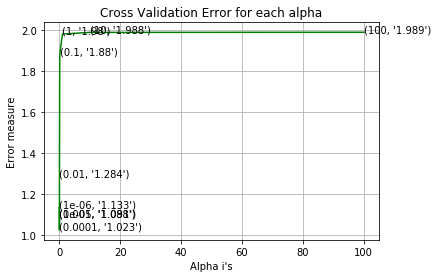

For values of best alpha =  0.0001 The train log loss is: 0.42287779969795714
For values of best alpha =  0.0001 The cross validation log loss is: 1.0234010219643115
For values of best alpha =  0.0001 The test log loss is: 1.0195927254954487


In [66]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0234010219643115
Number of mis-classified points : 0.32894736842105265
-------------------- Confusion matrix --------------------


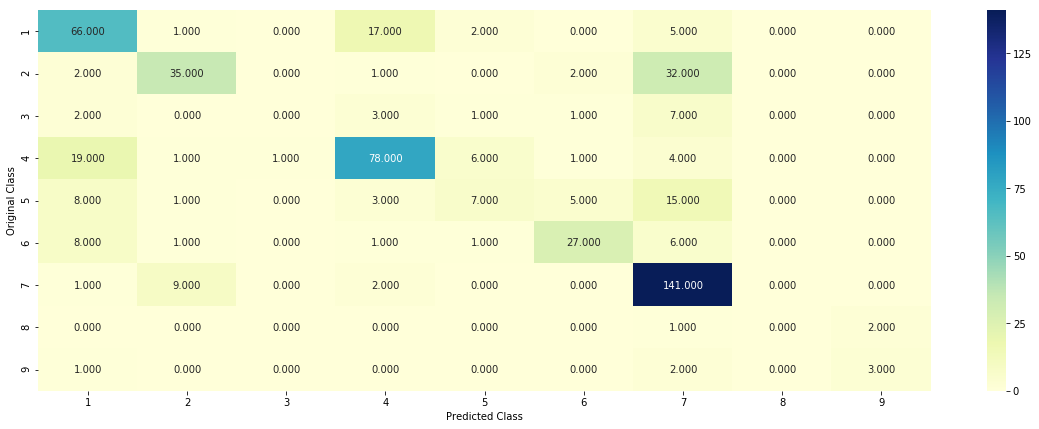

-------------------- Precision matrix (Columm Sum=1) --------------------


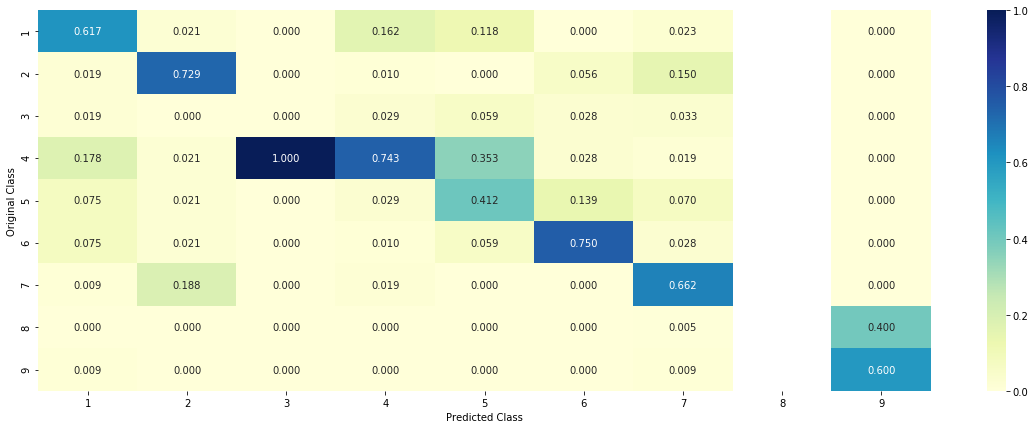

-------------------- Recall matrix (Row sum=1) --------------------


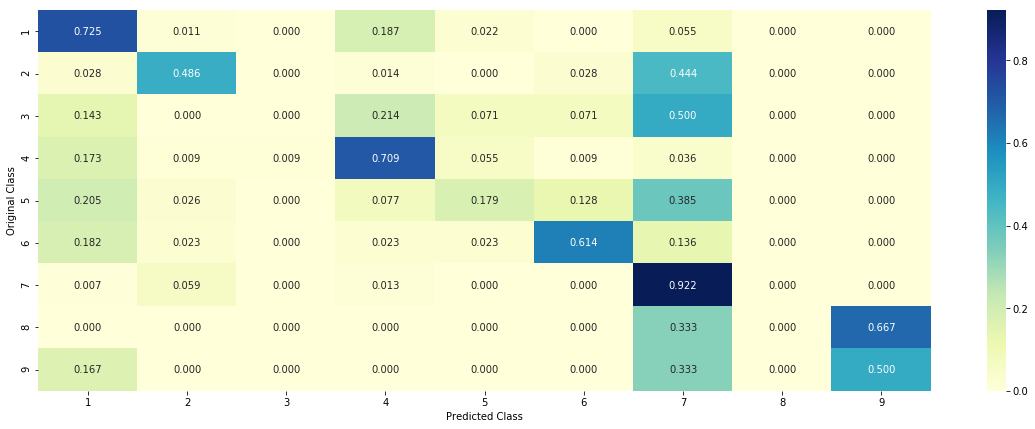

In [67]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

This shows the results we got after completeing 4th task of feature engineering. I have two types of feature engineering.

In [71]:
text_vectorizer = TfidfVectorizer(min_df=10, max_features=5000, ngram_range=(1,4))
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

train_text_features= text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 5000


In [70]:
from sklearn.feature_selection import SelectKBest
text_vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=10000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])

train_text_features= text_vectorizer.get_feature_names()
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1
 
train_text_feature_onehotCoding = SelectKBest(k=2000).fit_transform(train_df, test_df)

ValueError: could not convert string to float: 'rna maturation important complex biological process requires several small nuclear ribonucleoproteins snrnps comprise two forms spliceosomes major form spliceosome u2 type composed u1 u2 u4 6 u5 snrnps catalyzes splicing events metazoans 1 mutations genes sf3b1 srsf2 u2af1 zrsr2 lesser extent sf1 sf3a1 u2af2 prpf40b encoding spliceosome compounds found occur high frequencies myelodysplastic syndromes mds chronic lymphocytic leukemia cll 2 3 4 subsequently sf3b1 mutations also found solid tumors endometrial lung bladder pancreatic breast carcinomas cutaneous melanomas 5 others also reported 15 20 uveal melanoma um carry sf3b1 mutations 6 7 8 sf3b1 splicing factor 3 b subunit 1 also named sf3b155 central compound u2 snrnp complex direct contact branch site pre mrna sf3b1 contains 22 heat repeats huntingtin elongation factor 3 protein phosphatase 2a targets rapamycin 1 major hotspots missense mutations sf3b1 target one heat repeats positions r625 k666 k700 variability according diseases r625 k700 mutations prevalent um hematologic disorders respectively prognosis value mutations vary according diseases sf3b1 mutations associated poor outcomes cll favorable outcomes um 9 sf3b1 mutations especially associated refractory anemia excess ring sideroblasts rars mild form mds little impact patient survival consequences mutations splicing less clear aberrant splicing associated sf3b1 reported two landmark publications 2 3 however little overlap found mds cll furthermore harbour et al 6 found splicing effect sf3b1 mutations series um patients analyzed rna seq combining exon array rna seq analyzes recently reported alternative transcripts eight genes statistically associated sf3b1 r625 mutations linked various rna processing mechanisms alternative terminal exons uqcc adam12 gas8 alternative 3 acceptor splice sites crnde ankhd1 alternative cassette exons gusbp1 alternative first exon f8 intron retention abcc5 7 five differential splicing events crnde gusbp11 uqcc abcc5 ankhd1 consistently associated sf3b1 mutated status explored whether splicing signature also associated sf3b1 mutations malignancies um namely mds cll series cll 26 cases mds various subtypes 48 cases um 87 cases assembled samples genotyped recurrent mutated genes spliceosome biological clinical data obtained see supplementary table sample characteristics rna extraction reverse transcription samples analyzed two splice forms uqcc crnde ankhd1 gusbp1 abcc5 reverse transcription quantitative pcr rt qpcr described previously 7 crnde poorly expressed cll detection sensitivity rt qpcr cases unsupervised hierarchical clustering applied splicing ratio five expressed genes obtained series mds cll data well series um previously reported 7 whereas disease aggregation observed clustering sf3b1 mutated samples clustered single branch figure 1 supplementary table complete sample status specifically group samples included 8 cll sf3b1 mutated samples k700e 6 k666t 1 g742d 1 24 mds sf3b1 mutated sample cases k700e 14 h622q 4 d781g 2 r625l h c 4 19 sf3b1 mutated um samples r625h c l p 16 k666m 2 k700e 1 expected sf3b1 mutated mds classified rars refractory cytopenia multilineage dysplasia ring sideroblasts rcmd rs 16 4 respectively 23 cases sf3b1 mutated samples misclassified except one mds sample mds44 one um case um48 low detectable frequencies mutated sf3b1 allele segregated wild type cases five cases without detected splicesome mutations one mds two um two cll clustered branch corresponding mutated samples three srsf2 mutated mds cases bearing p95h hotspot mutation segregated second branch wild type samples suggesting mutant splicing factor differently affects splicing process sf3b1 mutants two mds samples bearing zrsr2 missense mutations unknown functional consequences k413e v304m segregated different branch figure 1 figure 1 unfortunately unable provide accessible alternative text require assistance access image please contact help nature com author hierarchical clustering tumor samples different pathologies according splicing signature unsupervised hierarchical clustering heatmap performed using difference ct threshold cycle two splicing forms expression five genes measured rt qpcr series 161 tumor samples representing 3 pathologies uveal melanoma um myelodysplastic syndrome mds chronic lymphocytic leukemia cll data normalized mean standard deviation within pathology research center clustering performed based euclidian distance ward method splicing status indicated color code representing wt wild type status tested spliceosome compounds sf3b1 srsf2 zrsr2 mutated status genes respectively na available full figure legend 124k several conclusions could drawn results first first time consistent splicing abnormalities associated sf3b1 mutations fact splicing pattern observed tumor cells different lineages embryonic origins strongly argues direct consequence sf3b1 mutation second pattern observed irrespective mutated heat repeats sf3b1 reason different hotspot mutations different malignancies largely unexplained different consequence detected limited splicing events explored third mutated spliceosome compounds present series including srsf2 zrsr2 share splicing abnormalities sf3b1 mutants finally false negative present clustering splicing pattern 5 161 samples three series undistinguishable sf3b1 samples suggesting either experimental limitation splicing analysis undetected abnormalities splicing machinery data clearly associate specific splicing abnormalities sf3b1 mutations abnormalities probably limited analyzed statistically demonstrate splicing variants among 200 000 different splicing events remains challenging requires reliable molecular tools latest generation exon array rna seq efficient bioinformatics large series cases thus likely consistent events picked analysis limited number mutated cases splicing forms yet discovered may better explain oncogenic pathways activated mutant sf3b1 finally results rule functions sf3b1 besides splicing deregulations could intervene oncogenesis graphical abstract image unlabelled figure figure options introduction rna splicing highly regulated molecular event orchestrated spliceosome involves removal intronic sequences pre mrna ligation exons generate mature mrna matera wang 2014 wahl et al 2009 process result multiple mrnas produced single gene providing increased protein diversity cells dysregulation rna splicing identified causative defect several diseases dehm 2013 singh cooper 2012 furthermore dysregulated alternative splicing proposed play important role tumorigenesis resistance therapy however many cases molecular consequences dysregulated splicing cancer remained largely elusive zhang manley 2013 recently recurrent heterozygous mutations identified components spliceosome various tumor types suggesting somatic mutations spliceosome genes play important role cancer yoshida ogawa 2014 sf3b1 frequently mutated spliceosome gene particular enrichment diseases myelodysplastic syndromes mds chronic lymphocytic leukemia cll chronic myelomonocytic leukemia uveal melanoma uvm skin melanoma skcm breast brca pancreatic cancers biankin et al 2012 ellis et al 2012 harbour et al 2013 kong et al 2014 landau et al 2013 malcovati et al 2015 yoshida et al 2011 based high frequency sf3b1 mutations key role splicing protein sought study molecular functional consequences sf3b1 hotspot mutations rna splicing cell lines patient samples splicing takes place recognition consensus sequences near 5 3 ends introns known 5 3 splice sites ss splicing machinery u1 small nuclear ribonucleoprotein particle snrnp recognizes 5 ss whereas u2 snrnp directed appropriate 3 ss short conserved pre mrna sequences including branch point sequence bps polypyrimidine py tract ag dinucleotide intron exon junction prior u2 snrnp recruitment sf1 recognizes bps u2 auxiliary factor u2af large subunit u2af2 recognizes py tract u2af small subunit u2af1 recognizes ag dinucleotide subsequently u2 snrnp replaces sf1 atp dependent process facilitates protein rna rearrangements particular n terminus sf3b1 u2 snrnp component shown bind u2af2 whereas sf3b1 c terminus along another u2 snrnp component p14 interacts bps nearby pre mrna sequences gozani et al 1998 addition u2 snrnp pre mrna complex stabilized base paired duplex u2 snrna bps subsequent binding u4 u5 u6 tri snrnp induces structural rearrangements lead activation two catalytic steps generate lariat intermediate subsequent final exon exon product horowitz 2012 matera wang 2014 wahl et al 2009 recurrent hotspot mutations sf3b1 found exclusively c terminal heat domains residues 622 781 figure s1a though lack structural information sf3b1 interacts pre mrna previous cryo electron microscopy studies suggest sf3b1 may undergo conformational change open form enables mrna binding bps recognition u2 snrnp golas et al 2003 although previously reported several groups sf3b1 mutant positive cancers associated aberrant splicing deboever et al 2015 furney et al 2013 gentien et al 2014 landau et al 2013 show sf3b1 hotspot mutations sf3b1mut result neomorphic activity causing aberrant splicing moreover provide experimental evidence sf3b1mut induces aberrant 3 ss selection use branch point bp different bp utilized sf3b1 wild type sf3b1wt sf3b1mut still requires canonical py tract formation active spliceosome induce aberrant splicing predict approximately half aberrantly spliced mrnas subjected nonsense mediated mrna decay nmd kervestin jacobson 2012 furthermore provide direct evidence multiple aberrant transcripts degraded resulting downregulation associated canonical protein cell line models patient samples insights splicing aberrations induced sf3b1mut enable discovery downstream consequences contribute neoplasms discovery targeted therapeutic approaches sf3b1mut cancers results sf3b1mut tumor specific splicing defects provide complete understanding splicing aberrations observed sf3b1mut cancers rna sequencing rna seq data different tumor types analyzed using bioinformatic pipeline developed order quantify exon exon junctions without need predetermined alternative splicing models annotated splice junctions analysis pipeline applied cll patient samples 7 sf3b1mut 6 sf3b1wt number samples cancer genome atlas luminal primary brca 7 sf3b1k700e 14 sf3b1wt skcm 3 sf3b1mut 12 sf3b1wt uvm 18 sf3b1mut 18 sf3b1wt table s1 analysis revealed 895 aberrant splice junctions significantly upregulated sf3b1mut compared sf3b1wt 534 events 60 unique previously annotated major transcriptome databases majority aberrant splicing events observed aberrant 3 ss selection figures 1a s1b table s2 consistent previous observations deboever et al 2015 furney et al 2013 gentien et al 2014 landau et al 2013 sf3b1mut associated abnormal splicing distribution unique figure 1 sf3b1mut associated abnormal splicing distribution unique orange known violet differential splicing events category across four tumor types examined b heatmap sf3b1mut induced splicing alterations patients rows splice junctions columns patients heatmap matrix values indicate percent usage differential splice junction versus junctions sharing splice site normalized z scores across patients limited maximum z 2 sf3b1 status information found table s1 c gene expression significantly abnormally common spliced gene across four different diseases quantified unit tpm transcripts per million indicates statistically significant diseases box plots whiskers represented per tukey method see also figure s1 tables s2 s3 figure options unsupervised clustering applied identified aberrant junctions led clustering sf3b1mut samples distinct cluster sf3b1wt samples figure 1b exception two sf3b1mut samples tcga d8 a1jh tcga er a19s clustered sf3b1wt samples likely driven low mutant allele fractions 7 14 respectively compared range 25 52 samples figure 1b table s2 moreover samples sf3b1mut clustered within tumor type brca skcm uvm cll showing set unique aberrantly spliced junctions figures 1b s1c set common events e events found tumor types observed consistent small overlap splicing abnormalities found cll uvm described two previous reports furney et al 2013 pattern tumor specific splicing brca cll could least part explained increased expression genes aberrantly spliced tumor types compared diseases p 7 5022 10 05 p 1 0078 10 36 respectively however observed skcm uvm figure 1c table s3 suggests additional mechanisms tissue specific splicing regulation might contribute patterns using aberrant junctions identified previous analysis extended clustering analysis include 14 mds rars samples 12 sf3b1mut additional 19 samples tcga miscellaneous sf3b1 mutations table s1 mds samples relatively low sequencing depth inclusion two sf3b1wt samples precluded use discovery mds specific aberrant junctions sf3b1mut mds patients three brca patients p n626d p d781e p k666e clustered original sf3b1mut sample set 16 sf3b1 mutant patients clustered sf3b1wt samples figure s1d patient samples carried mutations sf3b1 non hotspot figure s1d table s1 co localized hotspot mutations heat domain analyses strongly suggest convergence mechanism downstream splicing effects induced sf3b1mut sf3b1 mutations induce aberrant mrna splicing human mouse cells study sf3b1mut vitro pancreatic cancer cell line carrying endogenous sf3b1 mutations panc05 04 p q699h p k700e utilized addition p k700e p k666n p h662q mutation nalm 6 sf3b1k700e nalm 6 sf3b1k666n nalm 6 sf3b1h662q synonymous mutation nalm 6 sf3b1k700k referred sf3b1wt introduced aav mediated homology nalm 6 pre b cell line produce isogenic matched cell lines unsupervised clustering cell lines panel several sf3b1wt pancreatic cancer cell lines using aberrant splice junctions identified patient samples resulted clear segregation sf3b1mut cell lines sf3b1wt cells figure 2a similar increase aberrant splice junctions observed rna seq data analysis confirmed panc05 04 nalm 6 sf3b1k700e cells using nanostring assay developed quantify aberrant splice junctions figure s2a panc05 04 cells carry hotspot mutation p k700e mutation position 699 p q699h observed patient samples p q699h p k700e expressed alone combination 293ft cells cells expressing p k700e p q699h p k700e induced aberrant splicing indicating p q699h appear affect aberrant 3 ss selection figures s2b s2c data confirm panc05 04 nalm 6 sf3b1mut cell lines representative models study splicing functional activity sf3b1mut vitro aberrant splice variants associated sf3b1mut cell lines heatmap figure 2 aberrant splice variants associated sf3b1mut cell lines heatmap sf3b1mut induced aberrant splicing nalm 6 isogenic cell lines p h662q p k666n p k700e well panel wild type mutant pancreatic cell lines row identities orders annotations patients figure 1b b overall gene pan gene abnormal aberrant isoform splice isoform expression quantified nanostring assay b 293ft cells expressing sf3b1wt sf3b1k700r several sf3b1mut shrna knockdown sf3b1 wild type mutant allele c panc05 04 sf3b1mut panc10 05 sf3b1wt data represented mean three biological replicates data presented box plots boxes first third quartiles midline median whiskers extending range excluding outliers see also figure s2 figure options confirm additional cancer associated sf3b1 hotspot mutations induced aberrant splicing expressed various mxsf3b1mut mxsf3b1wt mxsf3b1k700r 293ft cells see supplemental experimental procedures description mxsf3b1 figure s2d analyzed splicing aberrations nanostring p k700r mutation served negative control introduce major change charge size amino acid disease associated sf3b1mut tested demonstrated usage aberrant splice sites observed endogenous engineered cell lines however sf3b1k700r sf3b1wt show splicing changes figure 2b moreover expression sf3b1 constructs change overall expression sum aberrant canonical affected genes figure 2b confirm correlation expression sf3b1 p k700e mutation aberrant splicing tetracycline inducible short hairpin rna shrna used selectively knockdown kd sf3b1mut sf3b1wt allele panc05 04 panc10 05 sf3b1mut sf3b1wt cells confirmation kd efficiency figures s2e s2h rna isolated treated cells analyzed nanostring depletion sf3b1mut allele panc05 04 resulted downregulation aberrant splice isoforms whereas accumulation aberrant splice isoforms observed selective sf3b1wt allele depletion figures 2c 2d indicating sf3b1mut responsible appearance aberrant splicing results also supported expression pan shrna depletion sf3b1wt panc10 05 effect aberrant splicing observed figures 2c 2d collectively results strongly suggest sf3b1mut acquires neomorphic function may also lose wild type splicing activity observation also supported recent paper zhou et al proposing different sf3b1 mutant cell line ess1 wild type sf3b1 required survival zhou et al 2015 sf3b1mut recognizes cryptic 3 ag short weak py tract common splicing abnormality observed sf3b1mut cells usage aberrant 3 ss understand sequence features mechanism mutant sf3b1 would induce aberrant splicing computational analysis sf3b1mut patient data minigene assay validation methods utilized first enrichment cryptic ags determined located 15 24 nt upstream canonical 3 ss sf3b1mut patient samples figure 3a contrast first ag gag upstream canonical ag refseq showed much lower density region wider distribution interestingly motif sequences associated cryptic canonical ags showed several different features upstream canonical ags clear enrichment pyrimidines observed agreement presence py tract whereas cryptic ags associated short weak py tract enrichment adenines possibly important bps selection contrast clear features associated first upstream ags refseq figures 3b s3 interestingly similar features position cryptic ag 15 24 presence short weak py tract enrichment observed aberrant 3 spliced junctions detected nih 3t3 mouse cells overexpressing mxsf3b1k700e figures s4a s4c similar features associated aberrant splice junction usage observed mxsf3b1k700e mouse cells overlap affected junctions observed human cells low due low sequence similarity introns species figure s4d table s4 exception observed uxs1 gene junction exon 2 exon 3 conserved among different species figure s4e data strongly suggest sf3b1mut induces aberrant splicing presence competing 3 ss via sequence dependent feature located within intron preferentially recognizes cryptic splice sites weaker py tract close proximity enrichment aberrant ag associated short weak py tract density plot figure 3 aberrant ag associated short weak py tract density plot relative positions cryptic ags compared canonical splice sites sf3b1mut tissue cohorts distance first ag non gag trimer refseq canonical 3 ss included comparison b motif frequency plots canonical aberrant first non gag ags 3 ss motifs given 35 nt upstream 3 ag 3 nt downstream see also figure s3 c sequences different minigenes specific mutations highlighted bold cryptic canonical ags underlined co transfection various zdhhc16 minigenes mxsf3b1wt mxsf3b1k700e top gel mxsf3b1k700r bottom gel cdna 293ft cells shown representative ethidium bromide stained 2 5 agarose gel indicated rt pcr reactions mrna isolated transfected cells see also figures s4 s5 table s4 figure options confirm importance specific sequence features selected exon 9 exon 10 junction zdhhc16 develop minigene observed aberrantly spliced among sf3b1 hotspot mutant samples analyzed addition several alterations cryptic 3 ss length strength py tracts potential bps tested figure s5a splicing assessed rt pcr using cdna prepared 293ft cells co transfected zdhhc16 minigene mxsf3b1 plasmid expected zdhhc16 exon 9 intron 9 exon 10 e9 i9 e10 minigene co transfected mxsf3b1wt mxsf3b1k700r canonical splicing observed whereas cells expressing mxsf3b1k700e hotspot mutations canonical aberrant splicing detected figures 3c 3d lanes 4 5 figure s5b interestingly cryptic ag removed e9 i9noag e10 aberrant splicing observed even cells expressing mxsf3b1k700e figures 3c 3d lanes 6 7 indicating cryptic ag necessary aberrant splicing understand whether exonic sequences play role aberrant splicing looked preceding junction zdhhc16 e8 i8 e9 expected aberrant splicing observed minigene co transfected mxsf3b1 constructs figure 3d lanes 10 11 canonical aberrant splicing detected intron 8 exon 8 9 replaced intron 9 e8 i9 e9 zdhhc16 minigene co transfected mxsf3b1k700e co transfected mxsf3b1wt mxsf3b1k700r figure 3d lanes 12 13 results agree computational analysis suggesting cryptic ag necessary intronic features sufficient induce aberrant splicing sf3b1mut identification 3 ss occurs early assembly spliceosome particular u2af2 u2af1 complex recognizes py tract ag ag recognized second step splicing horowitz 2012 understand short weak py tract upstream cryptic ag sufficient recruit u2af2 u2af1 complex length strength canonical py tract reduced 19 nt 10 6 2 nt pyt 10n pyt 6n pyt 2n respectively weak short cryptic py tract replaced strong py tract selex figure s5a lim et al 2011 minigene pyt 2n pyt 10n pyt 6n figure s5c co transfected mxsf3b1wt mxsf3b1k700r splicing event occurred selection new cryptic 3 ss within exon 10 positioned 54 nt downstream canonical 3 ss sequencing data shown suggesting pyt 2n recognized u2af complex figures 3c 3d lanes 14 15 figure s5c agreement previous reports suggesting py tract length strength necessary recruitment u2af2 u2af1 guide splicing occur position coolidge et al 1997 surprisingly minigenes co transfected mxsf3b1k700e similar results observed splicing occurred within exon 10 new cryptic 3 ss figures 3c 3d lanes 14 15 suggesting short weak py tract upstream cryptic ag sufficient recruit u2af complex cryptic ag requires downstream canonical py tract induce aberrant splicing nucleotide base upstream ag dinucleotide reported critical u2af1 interaction early recognition 3 ss usually c consensus sequences ilagan et al 2015 hence introduction g upstream canonical cryptic ag 3 g 24 c g would potentially abolish use 3 ss respectively 3 g minigene co transfected either mxsf3b1wt mxsf3b1k700e constructs splicing observed within exon 10 similar pyt 2n suggesting u2af2 u2af1 complex needs recruited canonical ag first step splicing allow usage cryptic ag sf3b1mut figures 3c 3d lanes 16 17 interestingly 24 c g minigene used canonical splicing observed even mxsf3b1k700e expression figures 3c 3d lanes 8 9 data suggest 3 position relative cryptic ag also important cryptic 3 ss recognized second transesterification reaction splicing moreover short weak cryptic py tract replaced selex py tract cryptic ag used preferred 3 ss cells expressing mxsf3b1wt mxsf3b1k700e figures 3c 3d lanes 18 19 taken together data support notion sequence features required sf3b1mut containing u2 snrnp complex located within intron cryptic ag downstream canonical py tract required induce aberrant splicing sf3b1mut sf3b1mut utilizes different bps computational analysis motifs near 3 ss showed enrichment upstream cryptic ag human mouse mutant sf3b1 cells suggesting importance sequence sf3b1mut incorporated u2 complex deboever colleagues suggested bpss mutant wild type sf3b1 complexes using bps prediction algorithm deboever et al 2015 instead used recently mapped bps data using k562 sf3b1wt cells overlaid data introns aberrant splice junctions observed sf3b1mut cells mercer et al 2015 total 151 bps mapped among 93 introns 60 introns one identified bp another 33 introns contain multiple reported bps distribution bps respect cryptic ag indicated majority bps overlapped cryptic ag close proximity 1 cryptic 5 coincide enrichment observed motif analysis figure 4a enrichment observed 8 18 nt upstream cryptic ag human mouse cells expressing mutant sf3b1 figures 4b s4c suggests could play important role sf3b1mut function test hypothesis 3 located 33 35 mutated gs zdhhc16 minigene 33 35 aaa ggg figure 4c s5a minigene co transfected mxsf3b1wt mxsf3b1k700r canonical splicing observed suggesting part bps wild type u2 complex figure 4d lanes 11 12 instead cells co transfected mxsf3b1k700e canonical splicing observed without aberrant splicing indicating three probably part bps used u2 mutant complex figure 4d lane 12 identify bps used u2 wild type complex position 26 30 alone together mutated g 26 g 30 g 26 30 aa gg figure 4c position 26 alone 26 30 mutated g co transfected mxsf3b1wt mxsf3b1k700r splicing observed within exon 10 new cryptic 3 ss figure 4d lanes 5 6 9 10 suggesting likely bps sf3b1wt sf3b1k700e canonical aberrant splicing observed conditions figure 4d lanes 5 6 9 10 interestingly minigene position 30 alone mutated g figure 4c s5a co transfected mxsf3b1wt mxsf3b1k700r splicing observed mostly within exon 10 co transfected mxsf3b1k700e aberrant splicing observed figure 4d lanes 7 8 expected mutated gs g figures 4c s5a mxsf3b1 construct spliced within exon 10 figure 4d lanes 13 14 additionally outcome confirmed mapping two different bps using nested pcr analysis sequencing endogenous zdhhc16 intron 9 lariat k562 isogenic cells figure 4e unlike sf3b1wt cells observed least two major templates different sequences sf3b1k700e cells due mixed population sf3b1wt sf3b1mut proteins analysis matching expected transcript sequences using mutation surveyor found 34 30 bps used sf3b1k700e sf3b1wt respectively extend observation also mapped bps four additional genes aberrantly spliced presence sf3b1k700e tmem14c intron 1 sept6 intron 9 dlst intron 5 dip2a intron 23 table s5 results prove sf3b1 wild type mutant containing u2 complexes able use two different bps sf3b1mut uses different bps sf3b1wt relative positions mapped bp figure 4 sf3b1mut uses different bps sf3b1wt relative positions mapped bp n 151 mercer et al compared location cryptic ags identified nalm 6 sf3b1k700e cells mercer et al 2015 x axis given distance nucleotides nt bp cryptic ag upstream positions negative distances whereas axis frequency bp found position b number adenines found 8 18 nt upstream cryptic ag compared canonical 3 ss significantly different p 5 8912 10 29 box plots whiskers represented per tukey method c sequences different minigenes specific mutations highlighted bold cryptic canonical ags underlined co transfection various zdhhc16 minigenes mxsf3b1wt mxsf3b1k700e top gel mxsf3b1k700r bottom gel cdna 293ft cells shown representative ethidium bromide stained 2 5 agarose gel indicated rt pcr reactions mrna isolated transfected cells e endogenous zdhhc16 intron 9 lariat sequencing analysis using nested pcr products isolated rna k562 sf3b1k700e sf3b1wt isogenic cells see also figure s5 table s5 figure options aberrant transcripts generated sf3b1mut subjected nmd erroneous aberrant mrnas contain premature termination codon subjected nmd prevent potential deleterious effects translation proteins kervestin jacobson 2012 computational analysis revealed majority cryptic ags located upstream canonical 3 ss nucleotide distances multiples 3 figure 5a result suggested aberrant transcripts would higher probability frame therefore degraded nmd confirm predicted nmd sensitive transcripts degraded nmd pathway rna seq performed nalm 6 sf3b1k700e cells treated cycloheximide translation inhibitor known inhibit nmd singh et al 2012 bioinformatic prediction analysis revealed 44 aberrant mrnas identified nalm 6 sf3b1k700e cell lines would result nmd sensitive transcript rivas et al 2015 figure 5b tables s6 s7 rna seq analysis nalm 6 isogenic cells demonstrated nmd sensitive genes expressed significantly lower levels nalm 6 sf3b1k700e nalm 6 sf3b1wt p 1 06 10 12 whereas predicted nmd insensitive genes expressed similar levels figure 5c rna seq analysis identified 41 predicted nmd sensitive genes downregulated nalm 6 sf3b1k700e increased abundance following cycloheximide treatment figure 5d table s6 suggesting aberrant transcripts degraded nmd addition evaluate would result downregulation associated canonical protein stable isotope labeling amino acids culture silac subsequent mass spectrometry used quantify protein levels nalm 6 isogenic lines oda et al 1999 eleven predicted nmd sensitive transcripts peptides could detected nalm 6 sf3b1wt selected evaluation ten found decreased peptide counts least 2 8 fold e g abcb7 akap8l figure 6a decreased expression canonical proteins confirmed western blot analysis using available antibodies mzb1 phgdh sept6 figure 6b among downregulated proteins silac experiment two proteins particular interest mzb1 abcb7 mzb1 b cell specific er localized protein implicated antibody secretion integrin mediated cell adhesion van anken et al 2009 shown figure 6c mzb1 aberrantly spliced sf3b1k700e cells canonical isoform clearly downregulated transcript protein level figures 6a 6b 6d shown figure 6e clear downregulation canonical mzb1 protein level also observed four five cll patients sf3b1mut sf3b1wt samples result patient 8 could explained low allele fraction y623c 10 associated undetectable aberrant splicing zdhhc16 change canonical mzb1 compared one sf3b1wt patients figure s6 abcb7 mediator iron accumulation erythroid growth reported downregulated specifically mds subtype characterized refractory anemia ringed sideroblasts rars boultwood et al 2008 interestingly sf3b1 mutations found frequency 80 90 rars mds subtypes papaemmanuil et al 2011 addition partial loss function mutation abcb7 identified x linked sideroblastic anemia ataxia demonstrating iron overload phenotype cells defective abcb7 allikmets et al 1999 identified abcb7 aberrantly spliced sf3b1 mutant cells figure 6f demonstrated aberrant transcript subject nmd causing downregulation canonical transcript protein figures 6a 6d therefore aberrant splicing subsequent nmd abcb7 likely explains association abcb7 downregulation observed rars presence sf3b1 mutants taken together data suggest sf3b1mut might contribute phenotypes observed diseases inducing generation nmd sensitive transcripts aberrant splicing subsequent reduction levels corresponding proteins 44 aberrantly spliced genes putative targets nmd frequency figure 5 44 aberrantly spliced genes putative targets nmd frequency cryptic ags identified nalm 6 sf3b1k700e cells indicated position positions corresponding multiple 3 shown red x axis given distance nt cryptic canonical ag whereas axis frequency ag found position b diagram nmd rule premature termination codons ptcs found 55 nt last exon exon junction induce mrna degradation nmd rivas et al 2015 c comparison whole gene expression predicted nmd sensitive n 224 nmd insensitive n 286 transcripts given log2 fold change nalm 6 sf3b1k700e sf3b1wt cells nmd predictions derived aberrant junctions identified nalm 6 sf3b1k700e isogenic cells log2 fold changes genes selected b exhibit downregulation nalm 6 sf3b1k700e cells dmso rescue effect upon treatment 1 hr cycloheximide chx n 41 box plots whiskers represented per tukey method see also figure s7 tables s6 s7 figure options mzb1 abcb7 canonical isoform mrna protein downregulated sf3b1 figure 6 mzb1 abcb7 canonical isoform mrna protein downregulated sf3b1 mutant nalm 6 cells patients log2 peptide counts matching selected nmd target proteins nalm 6 isogenic cells relative counts nalm 6 sf3b1wt cells b western blots selected nmd target proteins parental sf3b1wt sf3b1k700e nalm 6 cells c sequence fragment density four rna seq experiments two nalm 6 sf3b1wt sf3b1k700e aberrant 3 ss leads introduction ptc exon 3 shown mzb1 abcb7 canonical isoform mrna reduced relative sf3b1wt nalm 6 sf3b1k700e cells measured qpcr error bars represent sd biological replicates e mzb1 western blots 10 cll patient samples patients 1 5 sf3b1wt patients 6 7 9 sf3b1k700e patient 8 sf3b1y623c patient 10 sf3b1e622d f sequence fragment density four rna seq experiments two nalm 6 sf3b1wt sf3b1k700e aberrant 3 ss exon 8 9 abcb7 causes addition ptc 7 aa addition protein sequence gray prior start next canonical exon blue see also figure s6 figure options discussion current study describe mechanism sf3b1 hotspot mutations induce aberrant splicing fate resulting nmd sensitive aberrant mrnas several cancer types mutations associated expression hundreds aberrantly spliced junctions mostly utilizing cryptic ag aberrant junctions common across different cancer types others tumor specific cases consequence tissue specific gene expression however additional factors likely contribute differences interestingly aberrant splicing observed patients carrying hotspot mutations located c terminal heat domains samples non hotspot patients clustered sf3b1wt patients aberrant junction usage comparisons majority non hotspot mutations located away heat repeat domains suggests may different effects cancer cells simply passenger mutations focus present study calculated electrostatic potential map based homology model sf3b1wt importin observed hotspot mutations co localized limited positively charged region even though distributed across five different heat domains figure 7a furthermore various amino acid substitutions hotspots result change size polarity side chains data suggest functional consequences splicing changes similar show hotspot sf3b1mut induces aberrant 3 splicing junctions associated specific sequence features enrichment followed short weak py tract upstream cryptic ag located 15 24 nt canonical 3 ss model sf3b1mut function cryptic 3 ss selection surface figure 7 model sf3b1mut function cryptic 3 ss selection surface electrostatic potential map sf3b1wt generated based homology model crystal structure importin pdb 1ukl color scheme electric potential surface 10 v blue 10 v red position hotspot mutations located five heat repeat domains highlighted yellow represented inset b c schematic representation splicing sf3b1wt b sf3b1mut c cells molecular consequences transcripts also shown figure options based computational analysis recently suggested sf3b1 mutations cause change size sterically protected region downstream bp without altered bp recognition allowing utilization cryptic ag deboever et al 2015 also suggested sf3b1 mutations could alter interactions u2af2 affecting ability recognize canonical 3 ss leading cryptic 3 ss selection contrast provide experimental evidence short weak py tract upstream cryptic ag insufficient recruitment u2af complex integrity canonical 3 ss thereby interaction u2af2 required observe aberrant splicing well addition demonstrated sf3b1mut u2 complex utilizes bp different one used wild type u2 complex proposed model figures 7b 7c based data restricted localization hotspot mutations hypothesize sf3b1mut interacts differently pre mrna splicing factors important recognition ag second step splicing close proximity two mapped bps zdhhc16 30a sf3b1wt 34a sf3b1mut reported figure 4e published data crosslinking sf3b1 bases flanking bps gozani et al 1998 would suggest competition sf3b1wt sf3b1mut incorporated u2 snrnp complexes select canonical cryptic ag splicing respectively mechanism sf3b1mut favors selection different bp speculated point based data previous study investigating spliceostatin mechanism action corrionero et al 2011 least two hypotheses selection new bp guided sf3b1mut enhanced direct interactions specific nucleotides flanking new bps compensating reduced base pairing u2 snrna base pairing u2 snrna new suboptimal bps compensating impaired interactions sf3b1mut across canonical bps although sf3b1mut seem affect pre assembly u2 snrnp preliminary data shown possible interactions splicing factors involved selection alternative ag second step splicing impaired previously reported second step splicing factor slu7 required correct 3 ss selection chua reed 1999a chua reed 1999b similar u2af1 slu7 harbors zn knuckle domain conceivable directly interacts ag second step splicing observed case sf3b1mut depletion slu7 results selection cryptic ag closer bps suggests sf3b1 hotspot mutations may impair recruitment slu7 catalytic core additionally reported splicing factor spf45 hspf45 rbm17 involved recognition activation alternative ag upstream canonical 3 ss suggested spf45 directly indirectly binds upstream alternative ag help sf3b1 promotes utilization second catalytic step corsini et al 2007 lallena et al 2002 interestingly observed present study sf3b1mut spf45 also depends integrity canonical 3 ss splice alternative ag since sf3b1mut binds different bps speculated recruited spf45 access cryptic ag otherwise prevented due steric hindrance sf3b1wt taken together sf3b1 hotspot mutations could facilitating spf45 activity abrogating slu7 activity selection aberrant ag thereby providing unanticipated mechanism regulation splice site utilization alternative splicing pre mrnas known cellular mechanism adds complexity flexibility gene expression induce stage specific patterns inducing expression particular isoform also engaging nmd downregulate gene expression ge porse 2014 kalyna et al 2012 predicted approximately half aberrantly spliced transcripts sf3b1mut cells nmd sensitive demonstrated associated canonical isoforms downregulated mrna protein levels downregulation large number genes induced spliceosome sickness could cause impaired cell functions contribute cancer phenotypes potentially create dependency essential genes pathways survival interestingly haploinsufficiency proposed mechanism disease pathogenesis mds chromosome 5q deleted decreased expression genes located remaining chromosome observed e g rps14 cskn1a1 ebert et al 2008 schneider et al 2014 plausible sf3b1 mutations contribute mds similar fashion downregulating expression certain genes resulting non classical path haploinsufficiency addition downregulation canonical proteins also possible nmd insensitive aberrant transcripts translated aberrant proteins altered function proteomic analysis isogenic sf3b1mut cells reveal presence aberrant proteins data shown may due limitations assay sensitivity additional targeted silac deep rna sequencing active ribosome fractions may required sensitivity detect proteins recently several groups reported molecular consequences phenotypic effects spliceosome mutations u2af1 exonic splicing enhancer binding serine arginine rich protein srsf2 ilagan et al 2015 kim et al 2015 shirai et al 2015 though overlaps genes differentially spliced tissues affected spliceosome mutation see minimal overlaps predicted nmd targets figure s7 however mutations three splicing factors observed mds mutually exclusive suggesting downstream effects might common thus explored study likely sf3b1 mutations result defects hematopoiesis observed animal models srsf2 u2af1 mutations additional work ongoing define downstream splicing abnormalities drive phenotypic effects spliceosome mutations finally also plausible mutations sf3b1 impact proposed splicing regulators e g chromatin histone modifications subject future study de almeida et al 2011 kfir et al 2015 khan et al 2013 summary computational experimental approaches used demonstrate sf3b1mut utilizes different bp induce aberrant splicing across multiple cancer types insights describe neomorphic activity sf3b1 mutations causes downregulation canonical protein expression furthermore studies provide foundation potential discovery targeted approaches treatment patients carrying sf3b1 hotspot mutations uveal melanoma common eye malignancy causes severe visual morbidity fatal 50 patients primary uveal melanoma cured surgery radiotherapy metastatic disease treatment refractory understand comprehensively uveal melanoma genetics performed snp arrays whole genome sequencing 12 primary uveal melanomas observed 2000 predicted somatic single nucleotide variants per tumor low levels aneuploidy observe ultraviolet radiation dna damage signature identified sf3b1 mutations three samples 15 mutations extension cohort 105 samples sf3b1 mutations associated good prognosis rarely coincident bap1 mutations sf3b1 encodes component spliceosome rna sequencing revealed sf3b1 mutations associated differential alternative splicing protein coding genes including abcc5 uqcc long non coding rna lncrna crnde keywords uveal melanoma whole genome sequencing gnaq gna11 sf3b1 go introduction uveal melanoma arises iris cilliary body choroid light skin complexion fair hair blue eyes presence cutaneous nevi risk factors uveal melanoma 1 uvr associated increase cutaneous melanoma occurred countries australia past 4 decades accompanied parallel increases uveal melanoma 2 4 thus role uvr uveal melanoma etiology unclear class 1 uveal melanomas present low risk metastasis whereas class 2 tumors highly metastatic characterized monosomy chromosome 3 gain 8q mutually exclusive mutations gnaq gna11 principal driver oncogenes uveal melanoma occur 85 cases 5 6 inactivating mutations tumor suppressor bap1 occur 85 metastatic tumors associated disease dissemination 7 recently exome sequencing uveal melanomas identified recurrent mutations eif1ax sf3b1 8 9 predominantly low grade tumors somatic mutations sf3b1 encodes component spliceosome also occur hematological breast pancreatic cancers 10 13 mutant sf3b1 associated differential gene splicing chronic lymphocytic leukemia 14 aberrant splicing sf3b1 mutant uveal melanoma reported 9 gain insight uveal melanoma genetics performed snp array analysis whole genome sequencing rna sequencing rna seq 12 frozen primary uveal melanoma samples despite dismal prognosis find uveal melanoma remarkably low mutation burden observe uvr dna damage signature however found recurrent mutations sf3b1 associated differential alternative splicing coding non coding genes may play role etiology disease go results discovery cohort comprised 12 primary uveal melanoma t3 t4 tumors represented different histological types 1 epithelioid cell 3 spindle cell 8 mixed cases treated primary enucleation supplementary table 1 one case metastatic diagnosis 6 patients subsequently developed metastases snp array analysis performed using illumina humanomni2 5 snp arrays whole genome sequencing performed illumina hiseq 2000 platform whole genome sequence coverage 30 supplementary table 2 data aligned reference genome duplicate reads excluded whole genomes compared matched normal dna identify chromosomal translocations short insertions deletions indels somatic single nucleotide variants snvs snp arrays revealed low levels aneuploidy 11 tumors tetraploidy tumor 7 supplementary fig s1 supplementary table 3 diploid tumors presented recurrent chromosome 3 monosomy 9 tumors losses 1p 5 tumors 6q 3 tumors 8p 5 tumors gains 6p 4 tumors 8q 7 tumors supplementary figs s1 s2 aberrations characteristic uveal melanoma also observed loss 16q three tumors gain chromosome 11 two supplementary figs s1 s2 presence two identical copies chromosome 3 tumor 7 suggested chromosome 3 monosomy preceded acquisition tetraploid state tumor 7 also displayed trisomy 1q monosomy 8p commensurate snp array data whole genome sequencing also revealed low level chromosomal aberrations predicted 2 59 inter chromosomal translocations 0 7 intra chromosomal translocations inversions 2 25 large deletions 0 5 large insertions supplementary fig s2 supplementary table 4 thus frequency structural variations uveal melanoma 40 reported cutaneous melanoma 20 reported acral melanoma fig 1a 15 16 also 10 recently found mucosal melanoma fig 1a 17 figure 1 figure 1 somatic mutations uveal melanoma whole genome sequencing also revealed low number snvs predicted 1629 2604 median 2112 somatic snvs 47 178 median 67 somatic short indels table 1 snv mutation rate 1 per mb table 1 markedly lower seen types cancer fig 1b significantly lower seen cutaneous 30 000 mutations genome mucosal 8000 mutations genome acral 5 000 mutations genome melanoma 15 17 table 1 table 1 summary whole genome sequencing mutations uveal melanoma uvr induced dna damage characterized c transitions 3 end pyrimidine dinucleotides 18 signature accounts 80 90 mutations cutaneous melanoma 60 mutations acral melanoma 15 16 although c g transitions commonest mutation uveal melanoma accounted 35 lesions fig 1c enriched 3 position pyrimidine dimers fig 1d thus uvr induced dna damage appear play role uveal melanomagenesis line generally low level mutations observed coding region mutations predicting 4 19 non synonymous snvs per tumor 92 tested validated sanger sequencing supplementary table 5 also predicted 0 2 coding region indels per tumor table 1 recurrent mutations p 209l mutations gna11 7 tumors g p 209l mutations gnaq 3 tumors supplementary table 6 however observe small number non recurrent mutations individual genes possible functional significance including c p p107l gna15 coincident p 209l gna11 tumor 10 c p g8r eif1ax tumor 8 bap1 mutations 7 tumors supplementary table 6 critically also observed non recurrent mutations sf3b1 three tumors g p k666t tumor 6 c p k700e tumor 11 c p r625h tumor 12 although chromosome losses gains region encoding sf3b1 2q33 1 data suggested role sf3b1 uveal melanoma screened sf3b1 105 additional consecutive archival primary uveal melanomas detected 15 additional mutations 8 p r625h 4 p r625c 1 p r625p 1 p r625l 1 p k666t supplementary table 7 overall mutation rate 15 18 119 similar rate 18 6 recently reported sf3b1 mutations uveal melanoma whole exome sequencing 9 note addition r625 codon mutations reported therein also observed k666 k700 codon mutations supplementary fig s3 sf3b1 mutations inversely associated chromosome 3 monosomy notably associated improved progression free cancer survival supplementary table 7 supplementary fig s4 sf3b1 encodes subunit 1 splicing factor 3b component spliceosome evaluate effects sf3b1 mutations uveal melanoma transcripts hybridized three sf3b1 mutated tumors three sf3b1 wild type tumors affymetrix human transcriptome arrays hta2 contain exon exon exon junction probes 325 genes predicted differentially expressed 46 genes regulated 279 genes regulated sf3b1 mutant compared sf3b1 wild type tumors supplementary table 8 gene ontology go pathway analysis differentially expressed genes predict significant go term predict kegg reactome pathway enrichment however splicing level analysis predicted 130 genes contained least one differentially regulated exon splicing pattern supplementary table 9 manual inspection predicted events genosplice easana visualization interface revealed eight high confidence high confidence events including alternative terminal exons four events alternative 3 acceptor splice sites two events alternative cassette exons one event intron retention one event table 2 critically six events gusbp11 uqcc ankhd1 adam12 crnde abcc5 also identified analyzed rna seq data harbour et al table 2 table 2 table 2 alternative gene splicing associated sf3b1 mutations uveal melanoma next compared rna seq data three sf3b1 mutant nine sf3b1 wildtype tumors used dexseq bioconductor package uses generalized linear models detect differential exon usage 19 also mats uses bayesian statistical framework identify alternative splicing 20 47 genes predicted differentially spliced two populations least one algorithm supplementary tables 10 11 strikingly compared analysis hta2 harbour et al data rna seq analyses three alternative splicing events crnde abcc5 uqcc identified three analyses table 2 data suggest crnde abcc5 uqcc strong candidates alternative splicing sf3b1 mutant tumors hence examined sequencing profiles three genes rna seq data normalized number mapped bases genes compared nucleotide coverage base sf3b1 mutant wild type tumors fig 2 figure 2 figure 2 alternative splicing sf3b1 mutant uveal melanoma profiles uqcc revealed clear evidence alternative terminal exon use sf3b1 wild type sf3b1 mutant tumors fig 2a crnde observed near uniform representation bases exon 4 sf3b1 wild type tumors enrichment reads 3 end exon sf3b1 mutant tumors fig 2b finally abcc5 observed clear evidence differential splicing intron 8 fig 2c critically detected three splicing events analysed rna seq data harbour et al supplementary figure s5 9 providing independent confirmation alternative splicing events finally validate findings assessed alternative splicing gusbp11 uqcc ankhd1 gas8 f8 adam12 crnde abcc5 eight genes provided strongest evidence splicing qrt pcr 74 independent uveal melanomas comprising 58 sf3b1 wild type 16 sf3b1 mutant tumors analysis confirmed eight genes alternatively spliced sf3b1 mutant compared sf3b1 wild type tumors fig 2d supplementary fig s6 go discussion describe first whole genome sequencing uveal melanoma data reveal comparatively simple genetic disease characterized recurrent chromosomal gains losses relatively low number snvs structural variants tumor genomes display homogenous snv burden terms number 1629 2604 mutation class notably display canonical uvr induced dna damage signature pyrimidine dinucleotides absence signature negates obvious influence uvr etiology disease confirm gnaq gna11 commonly mutated driver oncogenes bap1 commonly mutated tumor suppressor addition confirm sf3b1 recurrently mutated 15 cases mutation hotspot codon r625 sf3b1 mutations reported hematological breast pancreatic cancers 10 13 intriguingly cancers codon k700 mutations predominate whereas uveal melanoma r625 codon mutations predominate suggests either gene mutations distinct etiology different hotspots targeted disease diverse biology diseases favors selection discrete mutations notably common previous studies 8 9 confirm uveal melanoma sf3b1 mutations associated better prognosis thus uveal melanoma myelodysplastic syndrome sf3b1 mutations associated improved outcome whereas chronic lymphocytic leukemia cll sf3b1 mutations associated poorer prognosis 21 sf3b1 encodes subunit 1 splicing factor 3b component spliceosome large intracellular machine processes precursor mrna mature transcripts specifically splicing factor 3b anchors precursor mrna onto splicosome define splicing site previous studies show spliceosomal component mutations alter splicing within gene cause intron retention cause aberrant alternative splicing affecting protein isoform balance thereby cell proliferation differentiation 22 23 cll sf3b1 mutations associated alternative splicing 3 ends genes generate truncated variants vitamin c transporter slc23a2 cell regulator tc1rg1 forkhead transcription factor foxp1 show uveal melanoma sf3b1 mutations also associated alternative splicing fig 2d show common cll sf3b1 mutations uveal melanoma associated alternative splicing 3 end transcripts example uqcc encodes ubiquinol cytochrome c reductase complex chaperone protein implicated bone development stature also see differential splicing abcc5 multidrug resistance associated protein implicated breast cancer metastasis 24 colorectal cancer 25 interestingly uveal melanoma observe evidence intron retention abcc5 sf3b1 wild type samples compared mutant samples suggesting gene efficiently spliced sf3b1 mutant wild type tumors intriguing show sf3b1 mutations associated cryptic alternative splicing exon 4 crnde long non coding rna lncrna exists several alternatively spliced forms upregulated solid tumors leukemias 26 27 crnde general exon 4 particular alternatively spliced colorectal cancer alternative forms thought regulate gene expression regulating chromatin modifying enzymes 27 28 show uveal melanoma mutations sf3b1 associated cryptic alternative splicing within exon 4 crnde considering comparatively simple genetics uveal melanoma important determine alternative splicing non coding gene affects cellular function conclusion show despite appalling prognosis uveal melanoma relatively simple genetic disease characterized recurrent chromosomal losses gains low mutational burden confirm gnaq gna11 commonly mutated oncogenes bap1 commonly mutated tumor suppressor identify sf3b1 mutations 15 cases show associated better prognosis guide clinical management disease intriguingly show sf3b1 mutations associated diverse alternative splicing events including alternative terminal exon usage intron retention cryptic splicing within exons protein coding non coding genes future studies focus events affect uveal melanoma biology go methods patient cohorts discovery set twelve patients uveal melanoma included wgs study supplementary table 1 tumour matched blood samples obtained study approved ethics committee institut curie informed consent obtained subjects validation set consecutive patients diagnosed institut curie january 2006 december 2008 underwent primary enucleation sufficient material biobank included validation series exclusion patients metastasis diagnosis patient characteristics reported supplementary table 6 follow analysis ended december 2012 median time 38 months period 57 patients 53 developed metastatic disease 50 patients 47 died metastatic melanoma cause death 43 patients 40 dna extracted frozen materials ffpe sections sf3b1 gnaq gna11 bap1 sequenced sanger methods oligonucleotide primer sequences available upon request dna rna extraction sequence analysis tumor dna rna provided biological resource center institut curie dna extracted frozen tumor formalin fixed paraffin embedded samples using standard phenol chloroform procedure total rna isolated frozen tumor samples using trizol reagent cdna synthesis performed mulv reverse transcriptase accordance manufacturers instructions invitrogen cergy pontoise france quality assessments performed agilent 2100 bioanalyzer sanger sequencing gdna amplified pcr products sequenced using dye terminator chemistry previously described 16 primer sequences available upon request sequences visualized using sequencher software whole genome sequencing analysis extracted dna samples sequenced three lanes illumina hiseq2000 sequencers produce paired end reads 100bp fastq files lane aligned human reference genome grch37 data sample merged duplicate reads marked using picard http picard sourceforge net somatic variants identified comparing matched tumor normal genomes supplementary methods snp array analysis genome wide genotyping tumor blood dna samples conducted illumina humanomni2 5 snp arrays raw data files processed using genomestudio somatic alterations identified supplementary methods rna extraction array hybridization total rna isolated frozen biopsy using mirneasy mini kit qiagen quality assessment conducted using rna 6000 nano labchip bioanalyzer agilent nanodrop spectrophotometer thermo total rna rin values 7 7 9 average 8 65 affymetrix human transcriptome array 2 0 st arrays hybridized according affymetrix recommendations using ambion wt protocol life technologies france affymetrix labeling hybridization kits 100ng total rna processed parallel external maqc rna control robustness data labeled dna mean yield 7 19 g min 6 27 g max 7 57 g affymetrix genechip human transcriptome 2 0 st microarrays hta2 hybridized 4 7 g labeled dna raw data transcript data exon data controlled expression console affymetrix institut curie microarray core facility benefit array highlight spliced rna isoforms using exon exon exon junction probes measure excluded included exons regions microarray data analysis affymetrix hta2 dataset analysis performed genosplice technology www genosplice com supplementary methods performed unpaired student test compare gene intensities sf3b1 wild type sf3b1 mutated tumors genes considered significantly differentially expressed fold change 1 5 p value 0 05 unadjusted p value analysis splicing level first performed taking account exon probes exon analysis see supplementary methods results considered statistically significant unadjusted p values 0 05 fold changes 1 5 splicing pattern analysis unadjusted p values 0 05 fold changes 2 0 exon analysis bioinformatics analysis microarray data manual inspection using genosplice easana interface conducted select high confident events rna seq analysis rna 12 tumor samples sequenced supplementary methods reads aligned using tophat 29 differential splicing analysis mutant n 3 wild type sf3b1 n 9 samples conducted using dexseq 19 events fdr 0 1 regarded significant differential splicing analysis also conducted mats 20 using mapped read bamfiles input events fdr 0 1 regarded significant rna seq data habour et al study 9 downloaded ncbi sequence read archive http www ncbi nlm nih gov sra term sra062359 analysed using methodology exception read lengths trimmed 99bp one samples described wild type sf3b1 predicted sf3b1 r625c mutation supplementary figure s7 designated sf3b1 mutant differential splicing analysis splice variant analysis validation series validation set used measure predicted splice variant 8 genes using specific probes supplementary table 12 1 3ng cdna analyzed duplicate quantify spliced unspliced forms real time pcr 45 cycles qpcr conducted 384 well plates using quantitect sybr green reagents qiagen courtaboeuf france onto abi 9700ht device perform splice variant analysis 3 steps achieved per gene interest first ct values averaged per sample ratio spliced form calculated per sample using formula 2 ct form1 mrna ct form2 mrna finally splicing event mann whitney u test applied sf3b1 mutated wildtype cases statistical methods cancer specific survival css calculated date diagnosis death uveal melanoma last follow event free survival efs calculated surgical resection development metastasis last follow survival curves constructed using kaplan meier method difference groups compared log rank test 2 fisher exact tests used determine association variables p values less 0 05 two sided considered statistically significant data access whole genome rna seq snp array data submitted european genome phenome archive ega study accession number egas00001000472 '

for alpha = 1e-06
Log Loss : 1.132886709548761
for alpha = 1e-05
Log Loss : 1.0905706814231304
for alpha = 0.0001
Log Loss : 1.0234010219643115
for alpha = 0.001
Log Loss : 1.0877625325504625
for alpha = 0.01
Log Loss : 1.284292748102132
for alpha = 0.1
Log Loss : 1.8795657226550508
for alpha = 1
Log Loss : 1.9804525583367718
for alpha = 10
Log Loss : 1.9883881726035137
for alpha = 100
Log Loss : 1.9892224180678835


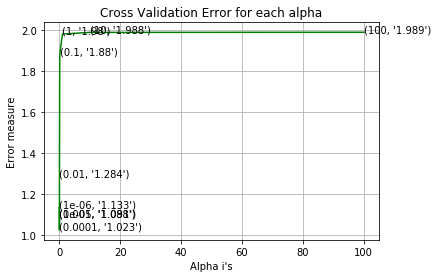

For values of best alpha =  0.0001 The train log loss is: 0.5155866506870806
For values of best alpha =  0.0001 The cross validation log loss is: 1.0193059821761086
For values of best alpha =  0.0001 The test log loss is: 1.0628038879401884


In [72]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l1', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0234010219643115
Number of mis-classified points : 0.32894736842105265
-------------------- Confusion matrix --------------------


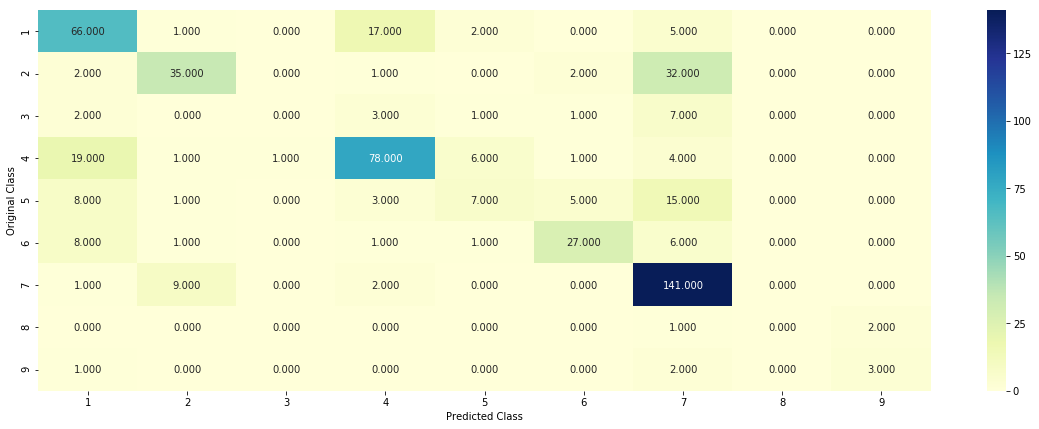

-------------------- Precision matrix (Columm Sum=1) --------------------


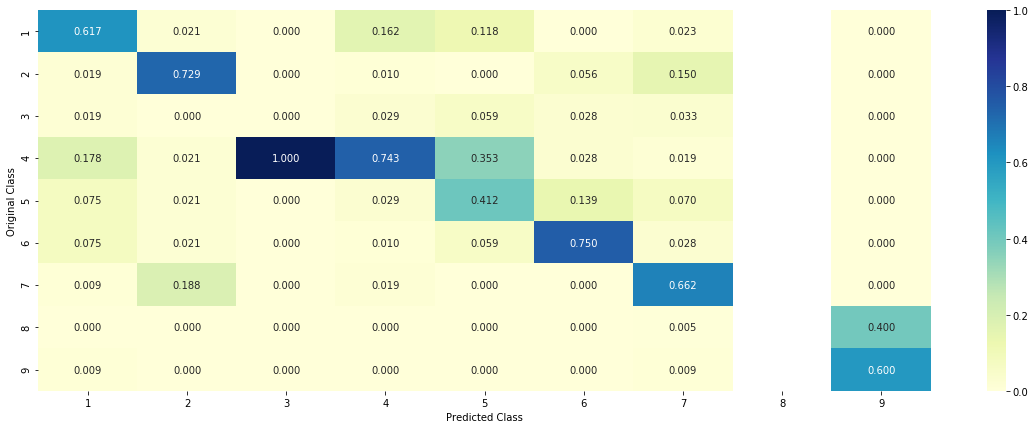

-------------------- Recall matrix (Row sum=1) --------------------


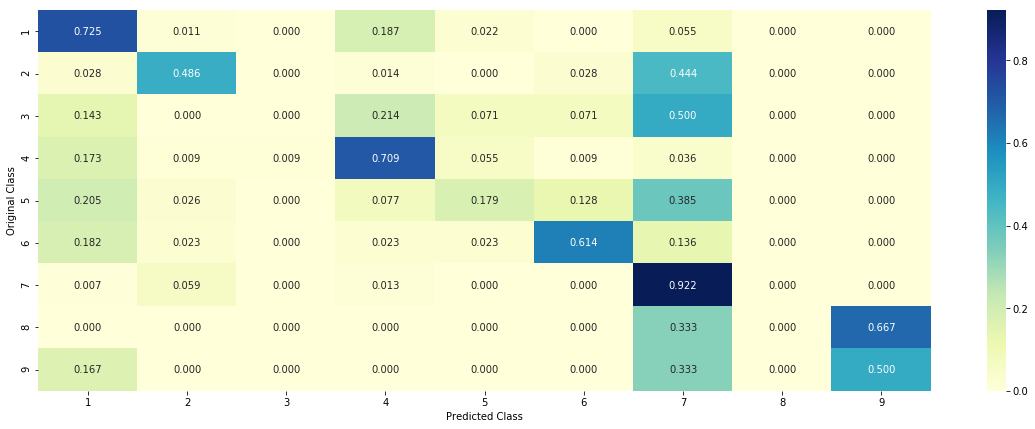

In [73]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

### Logistic Regression with class balaning

for alpha = 1e-06
Log Loss : 1.1557499905053532
for alpha = 1e-05
Log Loss : 1.1324141709044908
for alpha = 0.0001
Log Loss : 1.0593273732865631
for alpha = 0.001
Log Loss : 1.0719732167831357
for alpha = 0.01
Log Loss : 1.1187676167454739
for alpha = 0.1
Log Loss : 1.5002277823037384
for alpha = 1
Log Loss : 1.6822439938958087
for alpha = 10
Log Loss : 1.7011540752856462
for alpha = 100
Log Loss : 1.703296702836982


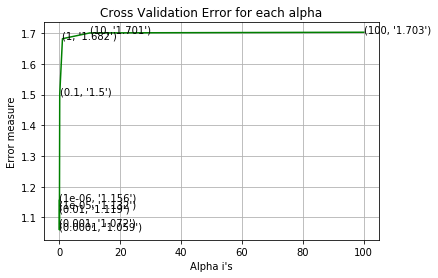

For values of best alpha =  0.0001 The train log loss is: 0.42677021347337263
For values of best alpha =  0.0001 The cross validation log loss is: 1.0593273732865631
For values of best alpha =  0.0001 The test log loss is: 1.0196542424730268


In [103]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 1.0593273732865631
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


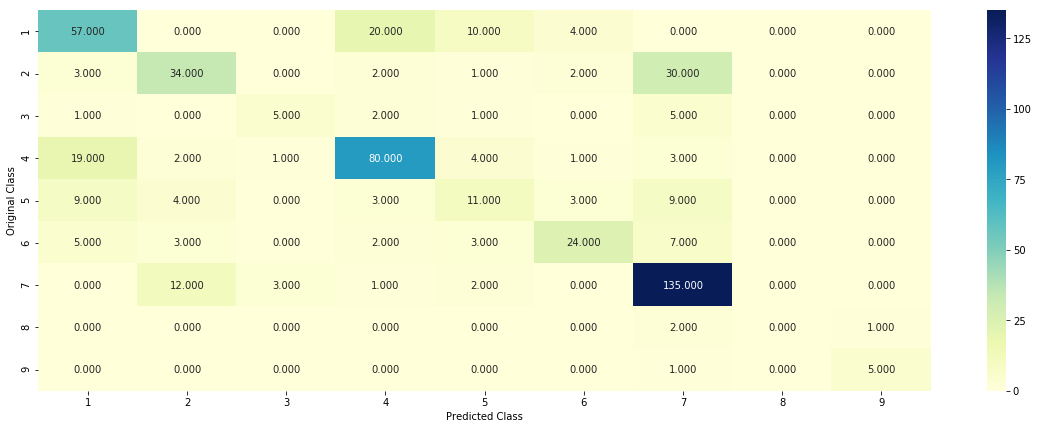

-------------------- Precision matrix (Columm Sum=1) --------------------


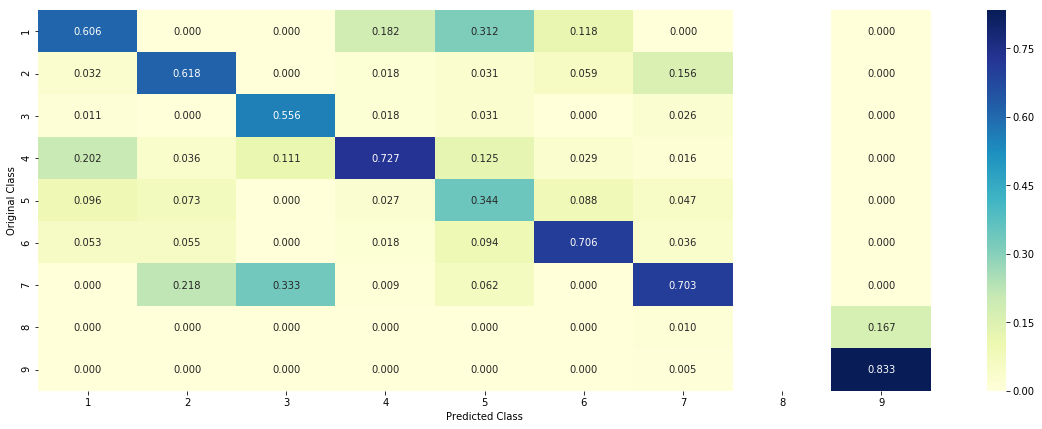

-------------------- Recall matrix (Row sum=1) --------------------


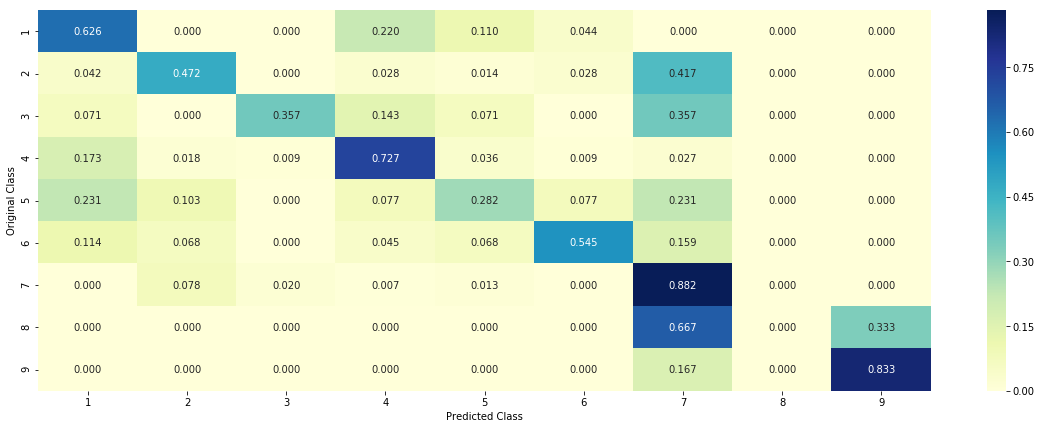

In [104]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [12]:
from prettytable import PrettyTable

pt = PrettyTable()
number   = [1,2]
name     = ["KNN", "SGDClassifier with Log Loss"]
feature  = ['4gram', 'combining gene with variation']
tr_loss  = ["0.6854622250743824", '0.6714468298210302']
te_loss  = ["1.005755249592562", '1.0353218164628526']


#Initialize Prettytable
pt = PrettyTable()
pt.add_column("Index", number)
pt.add_column("Model", name)
pt.add_column("Feature Engineering", feature)
pt.add_column("Train Log Loss", tr_loss)
pt.add_column("Test Log Loss", te_loss)
print(pt)

+-------+-----------------------------+-------------------------------+--------------------+--------------------+
| Index |            Model            |      Feature Engineering      |   Train Log Loss   |   Test Log Loss    |
+-------+-----------------------------+-------------------------------+--------------------+--------------------+
|   1   |             KNN             |             4gram             | 0.6854622250743824 | 1.005755249592562  |
|   2   | SGDClassifier with Log Loss | combining gene with variation | 0.6714468298210302 | 1.0353218164628526 |
+-------+-----------------------------+-------------------------------+--------------------+--------------------+
